# Spotify Machine Learning

In this PIC 16A Final project, our group decided to use the Spotify Datast sourced from [Kaggle](https://www.kaggle.com/datasets/sashankpillai/spotify-top-200-charts-20202021) in order to see if we can accurately predict the characteristics of a song that would make it to the top of the Spotify Top 200 Charts.


# Part 1. Group Contributions Statement

All three of us wrote the data acquisition and preparation. Liyuan wrote the functions used to clean and split the data and Sidney also contributed to the functions and manual recoding. Jia Shing led Figure 1 and the K-Neigbor model and the Random Forest model. LiYuan led Figure 3 and 4 and the SVM model in addition to working on Random Forest. Jia Shing also wrote the functions used to ultimately graph the models. Sidney led Figure 5, Table 1, and the Logistic Regression model. Each person wrote the explanations of their own figures and models. Sidney wrote the conclusion. 

We all checked each other’s work and made revisions to code and writing


# Part 2: Data Import and Cleaning

### Part 2.1: Clean Datapoints for EDA

In this section of the notebook, we wish to achieve the following:
- Explore all the variables available in the dataset
- Clean the dataset
    - Check for NAs/NULL values (Remove columns with empty data)
    - Remove duplicates
    - Check DType and ensure they are correct

We decided to clean our data set **before** splitting into test and train because we are working with a new dataset and wanted to make sure that we could thoroughly explore all of the data well enough to know how to remove outliers. This is because simply splitting the dataset into training and testing sets may result in one or more classes being severely underrepresented in one or both sets, which could negatively impact the model's accuracy. Additionally, due to some of the aspects of our model, we needed to conduct manual inspection/use human judgment, which requires a thorough understanding of all the context of the data.

Our "cleaning" was strictly limited to mapping or dropping non compatible data types, we only did labelEncoding/scaling after splitage, not in this step. Although this step may have sacrificed some accuracy, we believe that it was ultimately more important to have a better visualization of our dataset. 


In [1]:
# Importing some basic libraries
import pandas as pd
import numpy as np

In [2]:
# Importing the dataset
url = "https://raw.githubusercontent.com/jia-shing/pic16a-spotify/main/spotify_dataset.csv"
spotify= pd.read_csv(url)
spotify

Index  Highest Charting Position  Number of Times Charted  \
0         1                          1                        8   
1         2                          2                        3   
2         3                          1                       11   
3         4                          3                        5   
4         5                          5                        1   
...     ...                        ...                      ...   
1551   1552                        195                        1   
1552   1553                        196                        1   
1553   1554                        197                        1   
1554   1555                        198                        1   
1555   1556                        199                        1   

     Week of Highest Charting                           Song Name     Streams  \
0      2021-07-23--2021-07-30                             Beggin'  48,633,449   
1      2021-07-23--2021-07-30           STAY (with Justin Bieber)  47,248,719   
2      2021-06-25--2021-07-02                            good 4 u  40,162,559   
3      2021-07-02--2021-07-09                          Bad Habits  37,799,456   
4      2021-07-23--2021-07-30   INDUSTRY BABY (feat. Jack Harlow)  33,948,454   
...                       ...                                 ...         ...   
1551   2019-12-27--2020-01-03                           New Rules   4,630,675   
1552   2019-12-27--2020-01-03                  Cheirosa - Ao Vivo   4,623,030   
1553   2019-12-27--2020-01-03           Havana (feat. Young Thug)   4,620,876   
1554   2019-12-27--2020-01-03          Surtada - Remix Brega Funk   4,607,385   
1555   2019-12-27--2020-01-03  Lover (Remix) [feat. Shawn Mendes]   4,595,450   

                             Artist  Artist Followers                 Song ID  \
0                          Måneskin         3377762.0  3Wrjm47oTz2sjIgck11l5e   
1                     The Kid LAROI         2230022.0  5HCyWlXZPP0y6Gqq8TgA20   
2                    Olivia Rodrigo         6266514.0  4ZtFanR9U6ndgddUvNcjcG   
3                        Ed Sheeran        83293380.0  6PQ88X9TkUIAUIZJHW2upE   
4                         Lil Nas X         5473565.0  27NovPIUIRrOZoCHxABJwK   
...                             ...               ...                     ...   
1551                       Dua Lipa        27167675.0  2ekn2ttSfGqwhhate0LSR0   
1552                 Jorge & Mateus        15019109.0  2PWjKmjyTZeDpmOUa3a5da   
1553                 Camila Cabello        22698747.0  1rfofaqEpACxVEHIZBJe6W   
1554  Dadá Boladão, Tati Zaqui, OIK          208630.0  5F8ffc8KWKNawllr5WsW0r   
1555                   Taylor Swift        42227614.0  3i9UVldZOE0aD0JnyfAZZ0   

                                                  Genre  ... Danceability  \
0                ['indie rock italiano', 'italian pop']  ...        0.714   
1                                ['australian hip hop']  ...        0.591   
2                                               ['pop']  ...        0.563   
3                                     ['pop', 'uk pop']  ...        0.808   
4                         ['lgbtq+ hip hop', 'pop rap']  ...        0.736   
...                                                 ...  ...          ...   
1551                     ['dance pop', 'pop', 'uk pop']  ...        0.762   
1552           ['sertanejo', 'sertanejo universitario']  ...        0.528   
1553  ['dance pop', 'electropop', 'pop', 'post-teen ...  ...        0.765   
1554                     ['brega funk', 'funk carioca']  ...        0.832   
1555                           ['pop', 'post-teen pop']  ...        0.448   

     Energy  Loudness  Speechiness  Acousticness  Liveness    Tempo  \
0     0.800    -4.808       0.0504       0.12700    0.3590  134.002   
1     0.764    -5.484       0.0483       0.03830    0.1030  169.928   
2     0.664    -5.044       0.1540       0.33500    0.0849  166.928   
3     0.897    -3.712       0.0348       0.046

In [3]:
# Exploring some basic metadata about the dataset
spotify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1556 entries, 0 to 1555
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Index                      1556 non-null   int64  
 1   Highest Charting Position  1556 non-null   int64  
 2   Number of Times Charted    1556 non-null   int64  
 3   Week of Highest Charting   1556 non-null   object 
 4   Song Name                  1556 non-null   object 
 5   Streams                    1556 non-null   object 
 6   Artist                     1556 non-null   object 
 7   Artist Followers           1545 non-null   float64
 8   Song ID                    1545 non-null   object 
 9   Genre                      1545 non-null   object 
 10  Release Date               1545 non-null   object 
 11  Weeks Charted              1556 non-null   object 
 12  Popularity                 1545 non-null   float64
 13  Danceability               1545 non-null   float

From here, we can see that we have 1556 non-null values in certain fields and 1545 in others.
However, we note that the *DType* of certain fields such as "Week of Highest Charting", "Streams", "Song ID" etc are listed as *object* instead of *float* or *int*, which is what we expect from observing the dataset.

Upon closer inspection of the dataset, we see that instead of a NULL value, there were some cells that have a string with just a space. Therefore, all our numeric values are coerced into strings, which makes our *DType* an *object*.

To rectify this, we will use *pandas* to replace these blanks with *NaN* so that we can drop them.

In [4]:
# Replacing the empty values with NaN
spotify = spotify.replace(to_replace=" ", value=np.nan)
spotify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1556 entries, 0 to 1555
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Index                      1556 non-null   int64  
 1   Highest Charting Position  1556 non-null   int64  
 2   Number of Times Charted    1556 non-null   int64  
 3   Week of Highest Charting   1556 non-null   object 
 4   Song Name                  1556 non-null   object 
 5   Streams                    1556 non-null   object 
 6   Artist                     1556 non-null   object 
 7   Artist Followers           1545 non-null   float64
 8   Song ID                    1545 non-null   object 
 9   Genre                      1545 non-null   object 
 10  Release Date               1545 non-null   object 
 11  Weeks Charted              1556 non-null   object 
 12  Popularity                 1545 non-null   float64
 13  Danceability               1545 non-null   float

In [5]:
# Dropping the NaN values
spotify.dropna(inplace=True)

# resetting the index
spotify.reset_index(drop=True, inplace=True)

spotify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1545 entries, 0 to 1544
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Index                      1545 non-null   int64  
 1   Highest Charting Position  1545 non-null   int64  
 2   Number of Times Charted    1545 non-null   int64  
 3   Week of Highest Charting   1545 non-null   object 
 4   Song Name                  1545 non-null   object 
 5   Streams                    1545 non-null   object 
 6   Artist                     1545 non-null   object 
 7   Artist Followers           1545 non-null   float64
 8   Song ID                    1545 non-null   object 
 9   Genre                      1545 non-null   object 
 10  Release Date               1545 non-null   object 
 11  Weeks Charted              1545 non-null   object 
 12  Popularity                 1545 non-null   float64
 13  Danceability               1545 non-null   float

We also noticed that for `streams`, the numbers in the dataframe were represented with commas in it i.e '7,234,437' format and we cannot use it for any numeric operation or plotting. So, the commas were removed and then it's data type was changed.

In [6]:
# Modifying and correcting the data type of the Streams field
spotify['Streams'] = spotify['Streams'].str.replace(',', '').apply(pd.to_numeric)

spotify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1545 entries, 0 to 1544
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Index                      1545 non-null   int64  
 1   Highest Charting Position  1545 non-null   int64  
 2   Number of Times Charted    1545 non-null   int64  
 3   Week of Highest Charting   1545 non-null   object 
 4   Song Name                  1545 non-null   object 
 5   Streams                    1545 non-null   int64  
 6   Artist                     1545 non-null   object 
 7   Artist Followers           1545 non-null   float64
 8   Song ID                    1545 non-null   object 
 9   Genre                      1545 non-null   object 
 10  Release Date               1545 non-null   object 
 11  Weeks Charted              1545 non-null   object 
 12  Popularity                 1545 non-null   float64
 13  Danceability               1545 non-null   float

Lastly, we would like to split up the `Week of Highest Charting` into a `datetime64[ns]` DType so that we can accurately calculate the number of days that a particular song was at its highest charting position.

Further, we would like to split this up into 2 columns, which is its start and end. This allows us to have the option of running some additional analysis and creating some interesting plots to see if a song's popularity is affected by the week of the year.  
**Side note: This is motivated by our observation of a particular genre called `adult standards`, which upon closer inspection of the dataset, was essentially Christmas music.**

In [7]:
# Extracting the start and end week of the highest charting
spotify[['Week of Highest Charting_Start', 'Week of Highest Charting_End']] = spotify['Week of Highest Charting'].str.split('--', expand=True)

# Changing column types to datetime
spotify['Week of Highest Charting_Start'] = pd.to_datetime(spotify['Week of Highest Charting_Start'], yearfirst=True)
spotify['Week of Highest Charting_End'] = pd.to_datetime(spotify['Week of Highest Charting_End'], yearfirst=True)
spotify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1545 entries, 0 to 1544
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Index                           1545 non-null   int64         
 1   Highest Charting Position       1545 non-null   int64         
 2   Number of Times Charted         1545 non-null   int64         
 3   Week of Highest Charting        1545 non-null   object        
 4   Song Name                       1545 non-null   object        
 5   Streams                         1545 non-null   int64         
 6   Artist                          1545 non-null   object        
 7   Artist Followers                1545 non-null   float64       
 8   Song ID                         1545 non-null   object        
 9   Genre                           1545 non-null   object        
 10  Release Date                    1545 non-null   object        
 11  Week

### Part 2.2: Remapping the `Genre` Column

From an initial observation, we can see that under the "Genre" field, we have **strings** that resembles a Python list, which contains the various genres of the particular song.
From the output below, we also observe that the dataset seem to be extremely specific about the song genre. For instance, in `Genre[1551]`, we have `['dance pop', 'pop', 'uk pop']`.

For the purposes of our project, this level of specificity is unneccesary and would be difficult to use such specific genres to make more general analyses and conclusions about the performance of a song. We decided to narrow the genres down to 4 categories: rap, pop, r&b, and rock. Our reasoning behind this is that those are 4 relatively distinct genres of music that songs could be more easily classified into one box as. 

We believe that this generalization will not adversely affect our performance, and would greatly simplify our EDA process; despite more specific subgenres a song may have, it is most likely that it could be associated with one of the following genres as an input to predict its trends

In [8]:
spotify['Genre']

0                  ['indie rock italiano', 'italian pop']
1                                  ['australian hip hop']
2                                                 ['pop']
3                                       ['pop', 'uk pop']
4                           ['lgbtq+ hip hop', 'pop rap']
                              ...                        
1540                       ['dance pop', 'pop', 'uk pop']
1541             ['sertanejo', 'sertanejo universitario']
1542    ['dance pop', 'electropop', 'pop', 'post-teen ...
1543                       ['brega funk', 'funk carioca']
1544                             ['pop', 'post-teen pop']
Name: Genre, Length: 1545, dtype: object



From the given `Genre` Series, we would like to split each string values into a list and combine them into a larger list.
We would then use the `set` function to determine the total number of unique genres we have.

In [9]:
def delister(data):
    """Takes in a single-column dataframe and split the string values in the column into a list
    Args:
        data: Panda Series with values of type `string`

    Returns:
        data: Panda Series with values of type `list`
    """
    
    # Splitting the string values at single quotes "'"
    data = data.apply(lambda x: x.split("'"))
    
    # Appending the element of the list to a new list if the length of the element is greater than 2 (i.e. removing the ",", "['" and "']" from the list)
    data = data.apply(lambda x: list(set([y for y in x if len(y) > 2])))
    
    # Returning the series
    return data

delisted = delister(spotify['Genre'])
delisted

0                [italian pop, indie rock italiano]
1                              [australian hip hop]
2                                             [pop]
3                                     [pop, uk pop]
4                         [lgbtq+ hip hop, pop rap]
                           ...                     
1540                       [pop, uk pop, dance pop]
1541           [sertanejo, sertanejo universitario]
1542    [pop, electropop, dance pop, post-teen pop]
1543                     [funk carioca, brega funk]
1544                           [pop, post-teen pop]
Name: Genre, Length: 1545, dtype: object

In [10]:
# A list comphrehension to combine all the lists into a single list
combined = [i for x in delisted for i in x]

# Removing the duplicates from the list using the set function
unique_genres = list(set(combined))
print(unique_genres)

print("\n")

print(f"Number of unique types of genres: {len(unique_genres)}")

['brostep', 'german techno', 'pop rock', 'oakland hip hop', 'british soul', 'aussietronica', 'southern soul', 'viral pop', 'reggaeton colombiano', 'classic rock', 'hard rock', 'indie poptimism', 'trap latino', 'bedroom pop', 'soul', 'swing', 'grime', 'german trap', 'eau claire indie', 'trap argentino', 'trap boricua', 'torch song', 'dmv rap', 'italian pop rock', 'rap francais', 'uk alternative hip hop', 'alternative r&b', 'mexican hip hop', 'pop nacional', 'francoton', 'rap metal', 'rhode island rap', 'etherpop', 'french hip hop', 'deep house', 'pacific islands pop', 'uk funky', 'electronic trap', 'jazz pop', 'motown', 'ohio hip hop', 'show tunes', 'funk ostentacao', 'irish singer-songwriter', 'old school rap francais', 'lgbtq+ hip hop', 'deep german hip hop', 'hip pop', 'scandipop', 'afroswing', 'ranchera', 'rap', 'canadian trap', 'german alternative rap', 'hardcore hip hop', 'lounge', 'mellow gold', 'nu metal', 'contemporary country', 'uk alternative pop', 'melodic rap', 'puerto rica

Now, we would like to export this list into a .csv file and have each element in the list be written row-wise.

Then our team will use the .csv file to map each of the genres to one of the 4 main genres.

In [11]:
# Importing library
import csv

# opening the csv file in 'w+' mode
file = open('genres.csv', 'w+', newline ='')

# writing the data into the file
with file:
	write = csv.writer(file)
	write.writerows([unique_genres])

In [12]:
count = pd.Series(combined).value_counts()
print(count)
type(count)

pop                  528
rap                  311
dance pop            257
post-teen pop        256
latin                172
                    ... 
icelandic pop          1
sunnlensk tonlist      1
bubblegrunge           1
chicago indie          1
turkish trap           1
Length: 334, dtype: int64


pandas.core.series.Series

In [13]:
count.to_csv('genre_count.csv')

Our team has manually coded the unique genres above one of the 4 following genres: **pop, rap, rock and r&b**.

Now, we want to read the csv file into Python and create a dictionary based on the coded list so that we can map onto our Spotify dataset.

Note that since the DType of our `Genre` column was `object` and not `list`, we will first have to convert them into list before we conduct our mapping.

In [14]:
spotify['Genre'] = delister(spotify['Genre'])
spotify

Index  Highest Charting Position  Number of Times Charted  \
0         1                          1                        8   
1         2                          2                        3   
2         3                          1                       11   
3         4                          3                        5   
4         5                          5                        1   
...     ...                        ...                      ...   
1540   1552                        195                        1   
1541   1553                        196                        1   
1542   1554                        197                        1   
1543   1555                        198                        1   
1544   1556                        199                        1   

     Week of Highest Charting                           Song Name   Streams  \
0      2021-07-23--2021-07-30                             Beggin'  48633449   
1      2021-07-23--2021-07-30           STAY (with Justin Bieber)  47248719   
2      2021-06-25--2021-07-02                            good 4 u  40162559   
3      2021-07-02--2021-07-09                          Bad Habits  37799456   
4      2021-07-23--2021-07-30   INDUSTRY BABY (feat. Jack Harlow)  33948454   
...                       ...                                 ...       ...   
1540   2019-12-27--2020-01-03                           New Rules   4630675   
1541   2019-12-27--2020-01-03                  Cheirosa - Ao Vivo   4623030   
1542   2019-12-27--2020-01-03           Havana (feat. Young Thug)   4620876   
1543   2019-12-27--2020-01-03          Surtada - Remix Brega Funk   4607385   
1544   2019-12-27--2020-01-03  Lover (Remix) [feat. Shawn Mendes]   4595450   

                             Artist  Artist Followers                 Song ID  \
0                          Måneskin         3377762.0  3Wrjm47oTz2sjIgck11l5e   
1                     The Kid LAROI         2230022.0  5HCyWlXZPP0y6Gqq8TgA20   
2                    Olivia Rodrigo         6266514.0  4ZtFanR9U6ndgddUvNcjcG   
3                        Ed Sheeran        83293380.0  6PQ88X9TkUIAUIZJHW2upE   
4                         Lil Nas X         5473565.0  27NovPIUIRrOZoCHxABJwK   
...                             ...               ...                     ...   
1540                       Dua Lipa        27167675.0  2ekn2ttSfGqwhhate0LSR0   
1541                 Jorge & Mateus        15019109.0  2PWjKmjyTZeDpmOUa3a5da   
1542                 Camila Cabello        22698747.0  1rfofaqEpACxVEHIZBJe6W   
1543  Dadá Boladão, Tati Zaqui, OIK          208630.0  5F8ffc8KWKNawllr5WsW0r   
1544                   Taylor Swift        42227614.0  3i9UVldZOE0aD0JnyfAZZ0   

                                            Genre  ... Loudness Speechiness  \
0              [italian pop, indie rock italiano]  ...   -4.808      0.0504   
1                            [australian hip hop]  ...   -5.484      0.0483   
2                                           [pop]  ...   -5.044      0.1540   
3                                   [pop, uk pop]  ...   -3.712      0.0348   
4                       [lgbtq+ hip hop, pop rap]  ...   -7.409      0.0615   
...                                           ...  ...      ...         ...   
1540                     [pop, uk pop, dance pop]  ...   -6.021      0.0694   
1541         [sertanejo, sertanejo universitario]  ...   -3.123      0.0851   
1542  [pop, electropop, dance pop, post-teen pop]  ...   -4.333      0.0300   
1543                   [funk carioca, brega funk]  ...   -7.026      0.0587   
1544                         [pop, post-teen pop]  ...   -7.176      0.0640   

      Acousticness  Liveness    Tempo  Duration (ms)  Valence  Chord  \
0          0.12700    0.3590  134.002       211560.0    0.589      B   
1          0.03830    0.1030  169.928       141806.0    0.478  C#/Db   
2          0.33500    0.0849  166.928       178147.0    0.688      A   
3          0.04690    0.3640  126.026     

In [15]:
# Creating our mapping dictionary
recode = {}
url_gcs = "https://raw.githubusercontent.com/jia-shing/pic16a-spotify/main/genre_count_sorted.csv" # Make sure the url is the raw version of the file on GitHub
gcs = pd.read_csv(url_gcs, header = None)

for index, row in gcs.iterrows():
    key = row[0]
    recode[key] = [[row[1]]]
        
recode

{'pop': [['pop']],
 'rap': [['rap']],
 'dance pop': [['pop']],
 'post-teen pop': [['pop']],
 'pop rap': [['pop']],
 'trap': [['rap']],
 'reggaeton': [['rap']],
 'trap latino': [['rap']],
 'latin': [['latin']],
 'hip hop': [['rap']],
 'melodic rap': [['rap']],
 'canadian pop': [['pop']],
 'electropop': [['pop']],
 'pop dance': [['pop']],
 'atl hip hop': [['rap']],
 'german hip hop': [['rap']],
 'uk pop': [['pop']],
 'edm': [['pop']],
 'chicago rap': [['pop']],
 'k-pop': [['pop']],
 'reggaeton colombiano': [['rap']],
 'tropical house': [['pop']],
 'brooklyn drill': [['rap']],
 'philly rap': [['rap']],
 'rock': [['rock']],
 'canadian hip hop': [['rap']],
 'k-pop boy group': [['pop']],
 'north carolina hip hop': [['rap']],
 'toronto rap': [['rap']],
 'r&b': [['r&b']],
 'southern hip hop': [['rap']],
 'detroit hip hop': [['rap']],
 'canadian contemporary r&b': [['r&b']],
 'modern rock': [['rock']],
 'puerto rican pop': [['pop']],
 'reggaeton flow': [['rap']],
 'alt z': [['rock']],
 'viral p

In [16]:
# Remove extra list enclosing
for key, value in recode.items():
    recode[key] = value[0][0]
    
#Remapping each of the genres to the new genre based on the recode dictionary
for x in spotify['Genre']:
    for y in range(len(x)):
        x[y] = recode[x[y]] 
spotify

Index  Highest Charting Position  Number of Times Charted  \
0         1                          1                        8   
1         2                          2                        3   
2         3                          1                       11   
3         4                          3                        5   
4         5                          5                        1   
...     ...                        ...                      ...   
1540   1552                        195                        1   
1541   1553                        196                        1   
1542   1554                        197                        1   
1543   1555                        198                        1   
1544   1556                        199                        1   

     Week of Highest Charting                           Song Name   Streams  \
0      2021-07-23--2021-07-30                             Beggin'  48633449   
1      2021-07-23--2021-07-30           STAY (with Justin Bieber)  47248719   
2      2021-06-25--2021-07-02                            good 4 u  40162559   
3      2021-07-02--2021-07-09                          Bad Habits  37799456   
4      2021-07-23--2021-07-30   INDUSTRY BABY (feat. Jack Harlow)  33948454   
...                       ...                                 ...       ...   
1540   2019-12-27--2020-01-03                           New Rules   4630675   
1541   2019-12-27--2020-01-03                  Cheirosa - Ao Vivo   4623030   
1542   2019-12-27--2020-01-03           Havana (feat. Young Thug)   4620876   
1543   2019-12-27--2020-01-03          Surtada - Remix Brega Funk   4607385   
1544   2019-12-27--2020-01-03  Lover (Remix) [feat. Shawn Mendes]   4595450   

                             Artist  Artist Followers                 Song ID  \
0                          Måneskin         3377762.0  3Wrjm47oTz2sjIgck11l5e   
1                     The Kid LAROI         2230022.0  5HCyWlXZPP0y6Gqq8TgA20   
2                    Olivia Rodrigo         6266514.0  4ZtFanR9U6ndgddUvNcjcG   
3                        Ed Sheeran        83293380.0  6PQ88X9TkUIAUIZJHW2upE   
4                         Lil Nas X         5473565.0  27NovPIUIRrOZoCHxABJwK   
...                             ...               ...                     ...   
1540                       Dua Lipa        27167675.0  2ekn2ttSfGqwhhate0LSR0   
1541                 Jorge & Mateus        15019109.0  2PWjKmjyTZeDpmOUa3a5da   
1542                 Camila Cabello        22698747.0  1rfofaqEpACxVEHIZBJe6W   
1543  Dadá Boladão, Tati Zaqui, OIK          208630.0  5F8ffc8KWKNawllr5WsW0r   
1544                   Taylor Swift        42227614.0  3i9UVldZOE0aD0JnyfAZZ0   

                     Genre  ... Loudness Speechiness  Acousticness  Liveness  \
0              [pop, rock]  ...   -4.808      0.0504       0.12700    0.3590   
1                    [rap]  ...   -5.484      0.0483       0.03830    0.1030   
2                    [pop]  ...   -5.044      0.1540       0.33500    0.0849   
3               [pop, pop]  ...   -3.712      0.0348       0.04690    0.3640   
4               [rap, pop]  ...   -7.409      0.0615       0.02030    0.0501   
...                    ...  ...      ...         ...           ...       ...   
1540       [pop, pop, pop]  ...   -6.021      0.0694       0.00261    0.1530   
1541          [latin, pop]  ...   -3.123      0.0851       0.24000    0.3330   
1542  [pop, pop, pop, pop]  ...   -4.333      0.0300       0.18400    0.1320   
1543          [rock, rock]  ...   -7.026      0.0587       0.24900    0.1820   
1544            [pop, pop]  ...   -7.176      0.0640       0.43300    0.0862   

        Tempo  Duration (ms)  Valence  Chord  Week of Highest Charting_Start  \
0     134.002       211560.0    0.589      B                      2021-07-23   
1     169.928       141806.0    0.478  C#/Db                      2021-07-23   
2     166.928       178147.0    0.688      A                      2021-06-25  

In [17]:
# Remove duplicates within each song's list of genres
for i, x in enumerate(spotify['Genre']):
    unique_genres = []
    for genre in x:
        if genre not in unique_genres:
            unique_genres.append(genre)
    # Update the 'Genre' column with the unique genres for this song
    spotify.at[i, 'Genre'] = unique_genres

There were multiple genres given in the original data that we felt we could not immediately classify into one of the 4 genres because they instead fell under a more general banner of Latin music, which was one of the most popular genres, but one where we could not immediately categorize entire genres such as "latin" to be mapped to either pop,rap, etc. 

Instead in this step we created a **key** for latin that will allow us to later filter through and drop the key if another genre already exists for that song, and if not, then we would be able to look at the context of song/artist and make a manual decision later on. 

In [18]:
#remove additional category of latin if there is another genre
for i, x in enumerate(spotify['Genre']):
    if "latin" in x and len(x) > 1:
        spotify.at[i, 'Genre'].remove("latin")

url_lr = "https://raw.githubusercontent.com/jia-shing/pic16a-spotify/main/latin_remap.csv"
lr = pd.read_csv(url_lr, header = None)

for i, row in lr.iterrows():
    for j, name in enumerate(spotify['Song Name']):
        if row[0] == name:
            spotify.at[j, "Genre"] = row[1]

In [19]:
#identify which songs are listed under multiple genres to make a manual csv recoding dictionary
for i, x in enumerate(spotify['Genre']):
    if len(x)>1:
        print(spotify.at[i, "Genre"])

['pop', 'rock']
['rap', 'pop']
['rap', 'pop']
['pop', 'rap']
['pop', 'rock']
['r&b', 'pop']
['r&b', 'pop']
['rap', 'pop']
['rap', 'pop']
['rap', 'pop']
['rock', 'pop']
rock
['pop', 'rap']
['pop', 'rock']
['pop', 'rock']
['pop', 'rap']
['rock', 'pop']
['r&b', 'pop']
['pop', 'r&b']
r&b
['pop', 'rock']
['pop', 'rock']
['rap', 'pop']
['pop', 'rap']
['pop', 'rap']
['popo', 'pop']
['rap', 'pop']
['rap', 'pop']
pop
['pop', 'rock']
['pop', 'rock']
rap
['rock', 'pop']
['pop', 'rap']
['rap', 'pop']
['rap', 'pop']
['pop', 'rap']
pop
['pop', 'rap']
['r&b', 'pop']
['pop', 'rock']
['pop', 'rock']
['pop', 'rock']
['pop', 'rock']
rock
['pop', 'rock']
['pop', 'rock', 'r&b']
['rock', 'pop']
['pop', 'rap']
['pop', 'rap']
['pop', 'rap']
rock
['pop', 'rock']
['rock', 'pop']
pop
rock
['rap', 'pop']
['pop', 'rap']
['pop', 'r&b']
['pop', 'rap']
['pop', 'rap']
['pop', 'r&b']
['pop', 'rap']
['r&b', 'pop']
['pop', 'r&b']
['pop', 'rock']
['pop', 'rap']
pop
['pop', 'rock']
['rock', 'pop']
['pop', 'rap']
['rock', '

In this step, we had to manually look through each song that was listed under multiple genres, due to both the original data set including multiple genres, so even after our encoding, it was likely that a song fell under multiple categories. The approach to doing this was tedious but involved listening to the song itself in addition to looking at the artist and the original hyper-specific genres which sometimes gave more clues as to how a song would be categorized

Due to the nature of this task, it was highly subjective, as there was no function or program we could write to pick if a song would be qualified as "Rap" or "R&B". There is a chance that if an individual were to conduct this categorization again that it could influence the way our machine learning model would predict outcomes. 

One method we tried to employ during this process is having the same individual focused on the encoding of genres, so that it stayed relatively consistent throughout the project, rather than varying person by person. 

In [20]:
url_sg = "https://raw.githubusercontent.com/jia-shing/pic16a-spotify/main/single_genre.csv"
sg= pd.read_csv(url_sg, header = None)

for i, row in sg.iterrows():
    for j, name in enumerate(spotify['Song Name']):
        if row[0] == name:
            spotify.at[j, 'Genre']= row[3]
for i, val in enumerate(spotify['Genre']):
    if isinstance(val, list):
        spotify.at[i, 'Genre']=val[0]

After looking more closely at the data, we found a discrepencacy in songs that were released on 8/10/21-8/13/21: their popularity scores only ranged from 0-3 with one that was 15. This is very abnormal when 1), compared to the rest of the data where the lowest popularity score on the entire list was 76, and 2), because the other statistics such as highest charting position, number of times charted, streams, etc were much much higher than average when compared to other songs with lower popularity scores, which is why we believe that this is a glitch. Since we know that popularity could be a factor that we may use later, we wanted to remove these few outliers (total of 45).

Included an example of why we filtered these out below: 

In [21]:
#although 8/13 is just one of the days, you can see examples of songs that by other metrics are very "popular", but strangely have a score of 0
mask = spotify['Release Date'] == '8/13/21'
#print(spotify.loc[mask])

#one obvious example is the song "bad guy" by Billie Eilish 
mask2 = spotify['Song Name'] == 'bad guy'
print(spotify.loc[mask2])

#When looking at the data, this song was charted 83 times, making it the 3rd highest song to be 
#charted out of the entire dataset, yet it has a popularity val of 0, indicating some error in how
#the data was collected from Spotify's end

     Index  Highest Charting Position  Number of Times Charted  \
162    165                         13                       83   

    Week of Highest Charting Song Name  Streams         Artist  \
162   2020-01-24--2020-01-31   bad guy  5436286  Billie Eilish   

     Artist Followers                 Song ID Genre  ... Loudness Speechiness  \
162         1250353.0  1hewNsVmijBqjKvFRQfk4m   pop  ...  -10.965       0.375   

     Acousticness  Liveness    Tempo  Duration (ms)  Valence  Chord  \
162         0.328       0.1  135.128       194088.0    0.562      G   

     Week of Highest Charting_Start  Week of Highest Charting_End  
162                      2020-01-24                    2020-01-31  

[1 rows x 25 columns]


In [22]:
#Drop songs 
mask = spotify['Popularity'] < 16
num_rows_dropped = len(spotify[mask])
spotify.drop(spotify[mask].index, inplace=True)
spotify.drop(columns=['Index'], inplace=True)
print(num_rows_dropped)

45


# Part 3: Exploratory Analysis
In this section, we want to compute some summary statistics and construct visualizations about the relationships between variables.  

We will create 4 figures (with one figure with multiple axes) and 1 display table. They are as follows:
- A (linear) correlation matrix with all quantitative variables
- A display table summarizing quantitative variables that were relatively linearly correlated from the correlation matrix
- A histogram displaying how many songs in the Top 50 were charted on each day of the month
- A histogram and KDE pairplot to test our hypothesis that more upbeat and danceable songs would be more popular
- A line plot with multiple axes (based on Genre) to see how Streams and Popularity (the two quantitative variables that proved significant thus far in our EDA) are correlated.

<figure class="image" style="width:50%">
  <img src="https://github.com/jia-shing/pic16a-spotify/blob/main/Xnip2023-03-08_13-32-20.jpg?raw=true", width = 1500>
</figure>



We will also add a new column to the spotify dataframe called "If top 50" and populates it with values based on the "Highest Charting Position" column. So the end result is that the "If top 50" column will contain `TRUE` for each row where the "Highest Charting Position" is less than or equal to 50, and a `FALSE` otherwise.

In [23]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%config InlineBackend.figure_format = 'retina'


spotifydf = spotify.copy()
spotifydf['If top 50'] = spotifydf['Highest Charting Position'].apply(lambda x: True if x <= 50 else False)

spotifydf

Highest Charting Position  Number of Times Charted  \
0                             1                        8   
1                             2                        3   
2                             1                       11   
3                             3                        5   
4                             5                        1   
...                         ...                      ...   
1540                        195                        1   
1541                        196                        1   
1542                        197                        1   
1543                        198                        1   
1544                        199                        1   

     Week of Highest Charting                           Song Name   Streams  \
0      2021-07-23--2021-07-30                             Beggin'  48633449   
1      2021-07-23--2021-07-30           STAY (with Justin Bieber)  47248719   
2      2021-06-25--2021-07-02                            good 4 u  40162559   
3      2021-07-02--2021-07-09                          Bad Habits  37799456   
4      2021-07-23--2021-07-30   INDUSTRY BABY (feat. Jack Harlow)  33948454   
...                       ...                                 ...       ...   
1540   2019-12-27--2020-01-03                           New Rules   4630675   
1541   2019-12-27--2020-01-03                  Cheirosa - Ao Vivo   4623030   
1542   2019-12-27--2020-01-03           Havana (feat. Young Thug)   4620876   
1543   2019-12-27--2020-01-03          Surtada - Remix Brega Funk   4607385   
1544   2019-12-27--2020-01-03  Lover (Remix) [feat. Shawn Mendes]   4595450   

                             Artist  Artist Followers                 Song ID  \
0                          Måneskin         3377762.0  3Wrjm47oTz2sjIgck11l5e   
1                     The Kid LAROI         2230022.0  5HCyWlXZPP0y6Gqq8TgA20   
2                    Olivia Rodrigo         6266514.0  4ZtFanR9U6ndgddUvNcjcG   
3                        Ed Sheeran        83293380.0  6PQ88X9TkUIAUIZJHW2upE   
4                         Lil Nas X         5473565.0  27NovPIUIRrOZoCHxABJwK   
...                             ...               ...                     ...   
1540                       Dua Lipa        27167675.0  2ekn2ttSfGqwhhate0LSR0   
1541                 Jorge & Mateus        15019109.0  2PWjKmjyTZeDpmOUa3a5da   
1542                 Camila Cabello        22698747.0  1rfofaqEpACxVEHIZBJe6W   
1543  Dadá Boladão, Tati Zaqui, OIK          208630.0  5F8ffc8KWKNawllr5WsW0r   
1544                   Taylor Swift        42227614.0  3i9UVldZOE0aD0JnyfAZZ0   

     Genre Release Date  ... Speechiness  Acousticness  Liveness    Tempo  \
0     rock      12/8/17  ...      0.0504       0.12700    0.3590  134.002   
1      rap       7/9/21  ...      0.0483       0.03830    0.1030  169.928   
2      pop      5/21/21  ...      0.1540       0.33500    0.0849  166.928   
3      pop      6/25/21  ...      0.0348       0.04690    0.3640  126.026   
4      rap      7/23/21  ...      0.0615       0.02030    0.0501  149.995   
...    ...          ...  ...         ...           ...       ...      ...   
1540   pop       6/2/17  ...      0.0694       0.00261    0.1530  116.073   
1541   pop     10/11/19  ...      0.0851       0.24000    0.3330  152.370   
1542   pop      1/12/18  ...      0.0300       0.18400    0.1320  104.988   
1543  rock      9/25/19  ...      0.0587       0.24900    0.1820  154.064   
1544   pop     11/13/19  ...      0.0640       0.43300    0.0862  205.272   

      Duration (ms)  Valence  Chord  Week of Highest Charting_Start  \
0          211560.0    0.589      B                      2021-07-23   
1          141806.0    0.478  C#/Db                      2021-07-23   
2          178147.0    0.688      A                      2021-06-25   
3          231041.0    0.591      B                      2021-07-02   
4          212000.0    0.894  D#/Eb                      2021-07-23   
...         

### Visualization 1: Correlation Matrix

For our first visualization, we will plot a correlation matrix to see if there are any **linear correlation** that can be captured since those are the most direct relationship to establish between quantitative variables

<AxesSubplot:>

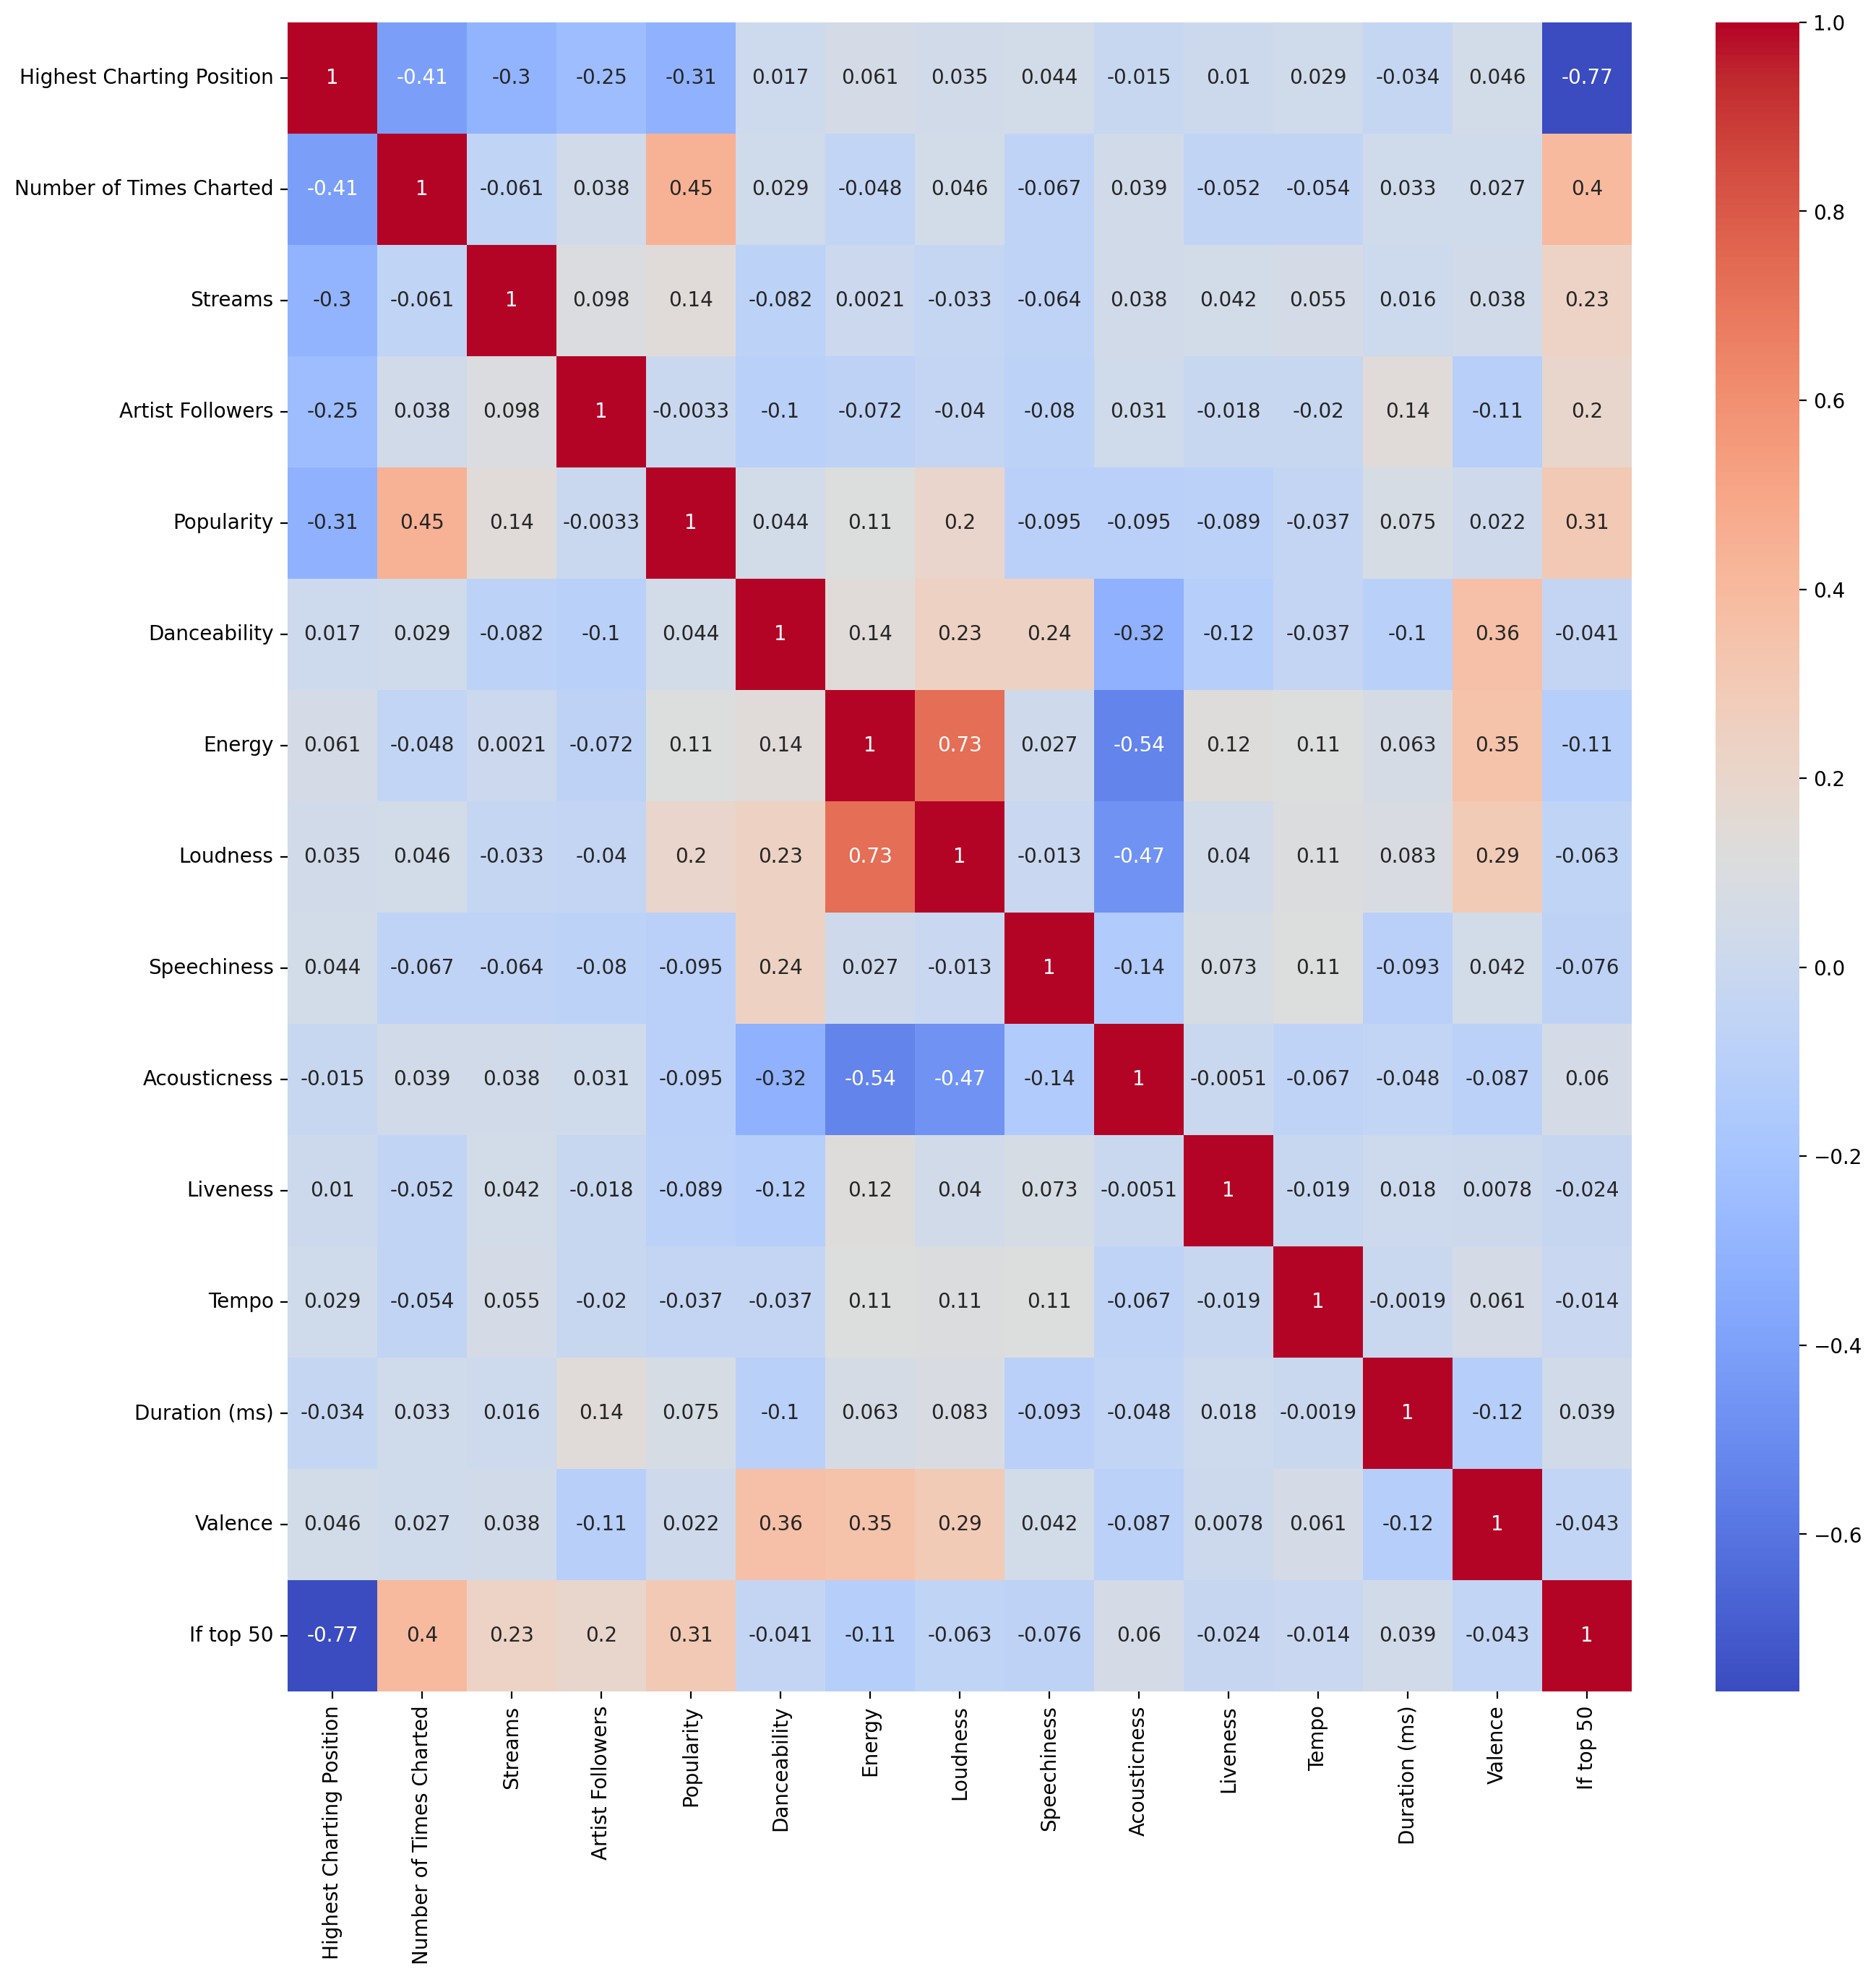

In [24]:
# Computing the correlation for the train set
corr = spotifydf.corr()

# Plotting the correlation matrix
plt.figure(figsize = (15, 15))
sns.heatmap(corr, annot=True, cmap='coolwarm')

**Analysis**

From the matrix, there doesn’t seem to be any very **strong** linear correlations with `If top 50`, but there are specific variables that stand out that show some level of correlation. `Number of Times Charted`, `Streams`, `Artist Followers` and `Popularity` showed higher correlation coefficient values. 

This chart also shows us that there are certain variables that seem to be relatively **linearly uncorrelated**; these were typically qualities of the song itself, like a song's `Acousticness` or `Duration`. This begins to explain that a song making it to the top 50 is not strongly related to inherent aspects of the song

Note that `Highest Charting Position` counter-intuitively has a strong negative correlation because `If top 50` is a boolean variable that is dependent on `Highest Charting Position`.



### Visualization 2: Display Tables

In this section, we will select the variables that have a significant correlation with the `If top 50` variable and summarize the mean, standard deviation as well as size.


In [25]:
spotify_filtered = spotifydf[['Genre', 'If top 50', 'Streams', 'Artist Followers', 'Number of Times Charted', 'Popularity']]
summary = spotify_filtered.groupby(["Genre", "If top 50"]).aggregate([np.mean, np.std, np.size])

summary

Streams                    Artist Followers  \
                         mean           std size             mean   
Genre If top 50                                                     
pop   False      5.805389e+06  1.451026e+06  428     1.549960e+07   
      True       7.768838e+06  5.378253e+06  247     2.398852e+07   
r&b   False      5.824660e+06  1.413711e+06   37     1.071472e+07   
      True       6.167265e+06  1.637651e+06   13     2.067369e+07   
rap   False      5.856299e+06  1.466847e+06  477     1.162166e+07   
      True       6.949243e+06  5.007990e+06  201     1.635432e+07   
rock  False      5.717884e+06  1.251989e+06   81     7.037229e+06   
      True       1.200093e+07  1.113141e+07   16     3.522286e+06   

                                   Number of Times Charted                  \
                          std size                    mean        std size   
Genre If top 50                                                              
pop   False      1.699299e+07  428                6.759346  11.033928  428   
      True       2.092276e+07  247               21.526316  22.730981  247   
r&b   False      1.433124e+07   37                5.621622  13.200066   37   
      True       1.656379e+07   13               10.307692   9.927946   13   
rap   False      1.372974e+07  477                4.794549   8.719950  477   
      True       1.541202e+07  201               19.358209  20.009274  201   
rock  False      9.649465e+06   81               10.370370  15.874070   81   
      True       5.150205e+06   16               11.375000  13.700973   16   

                Popularity                  
                      mean        std size  
Genre If top 50                             
pop   False      70.899533  10.634956  428  
      True       77.080972   9.898752  247  
r&b   False      71.405405   8.411168   37  
      True       74.461538   8.875203   13  
rap   False      68.660377   8.890437  477  
      True       77.492537   7.459973  201  
rock  False      72.493827  13.325843   81  
      True       66.750000  18.142032   16

**Analysis**

We wanted to use this table to explore what some of the influence of genre is on the following variables: `Streams`, `Artist Followers`, `# Times Charted` and `Popularity`; the variables we saw above to be linearly correlated with a song in the top 50 

From the summary table, we can first observe that for all genres **except** `Rock`, that the mean streams, followers, times charted, and popularity were **always** higher if the song charted in the top 50 vs when it did not. 
Looking at `Rock` more closely allows for interesting insights into overall song trends: The mean number of artist followers for rock music that is not in the top 50 is only about half that of pop music that is not in the top 50. This suggests that rock music may have a smaller fan base or may be less popular among streaming music audiences. Additionally, rock music that is not in the top 50 has the lowest mean popularity score out of all the genres, suggesting that it may be harder for rock music to gain mainstream popularity compared to other genres. This is particularly evident when comparing it to pop music, which consistently has the highest mean popularity scores across all categories. Because of these factors, it indicates that it may be more challenging for rock music to gain mainstream popularity and chart on popular music charts.

 
Other notable observations include: 
- Pop music tends to have the largest number of followers, the most frequent charting, and the highest popularity scores, both for music that is in the top 50 and for music that is not in the top 50.
- Rap music that is in the top 50 has the highest mean number of followers, while rap music that is not in the top 50 has the lowest mean number of followers.
- Rock music that is not in the top 50 has the lowest mean popularity score, while rock music that is in the top 50 has the lowest mean number of followers.
- R&B music has relatively consistent means for all three variables, regardless of whether the music is in the top 50 or not.

### Visualization 3: Histogram

In this section, we want to see if day of the month affects charting position. Subset top 50 songs and see how many are charted on a particular day.

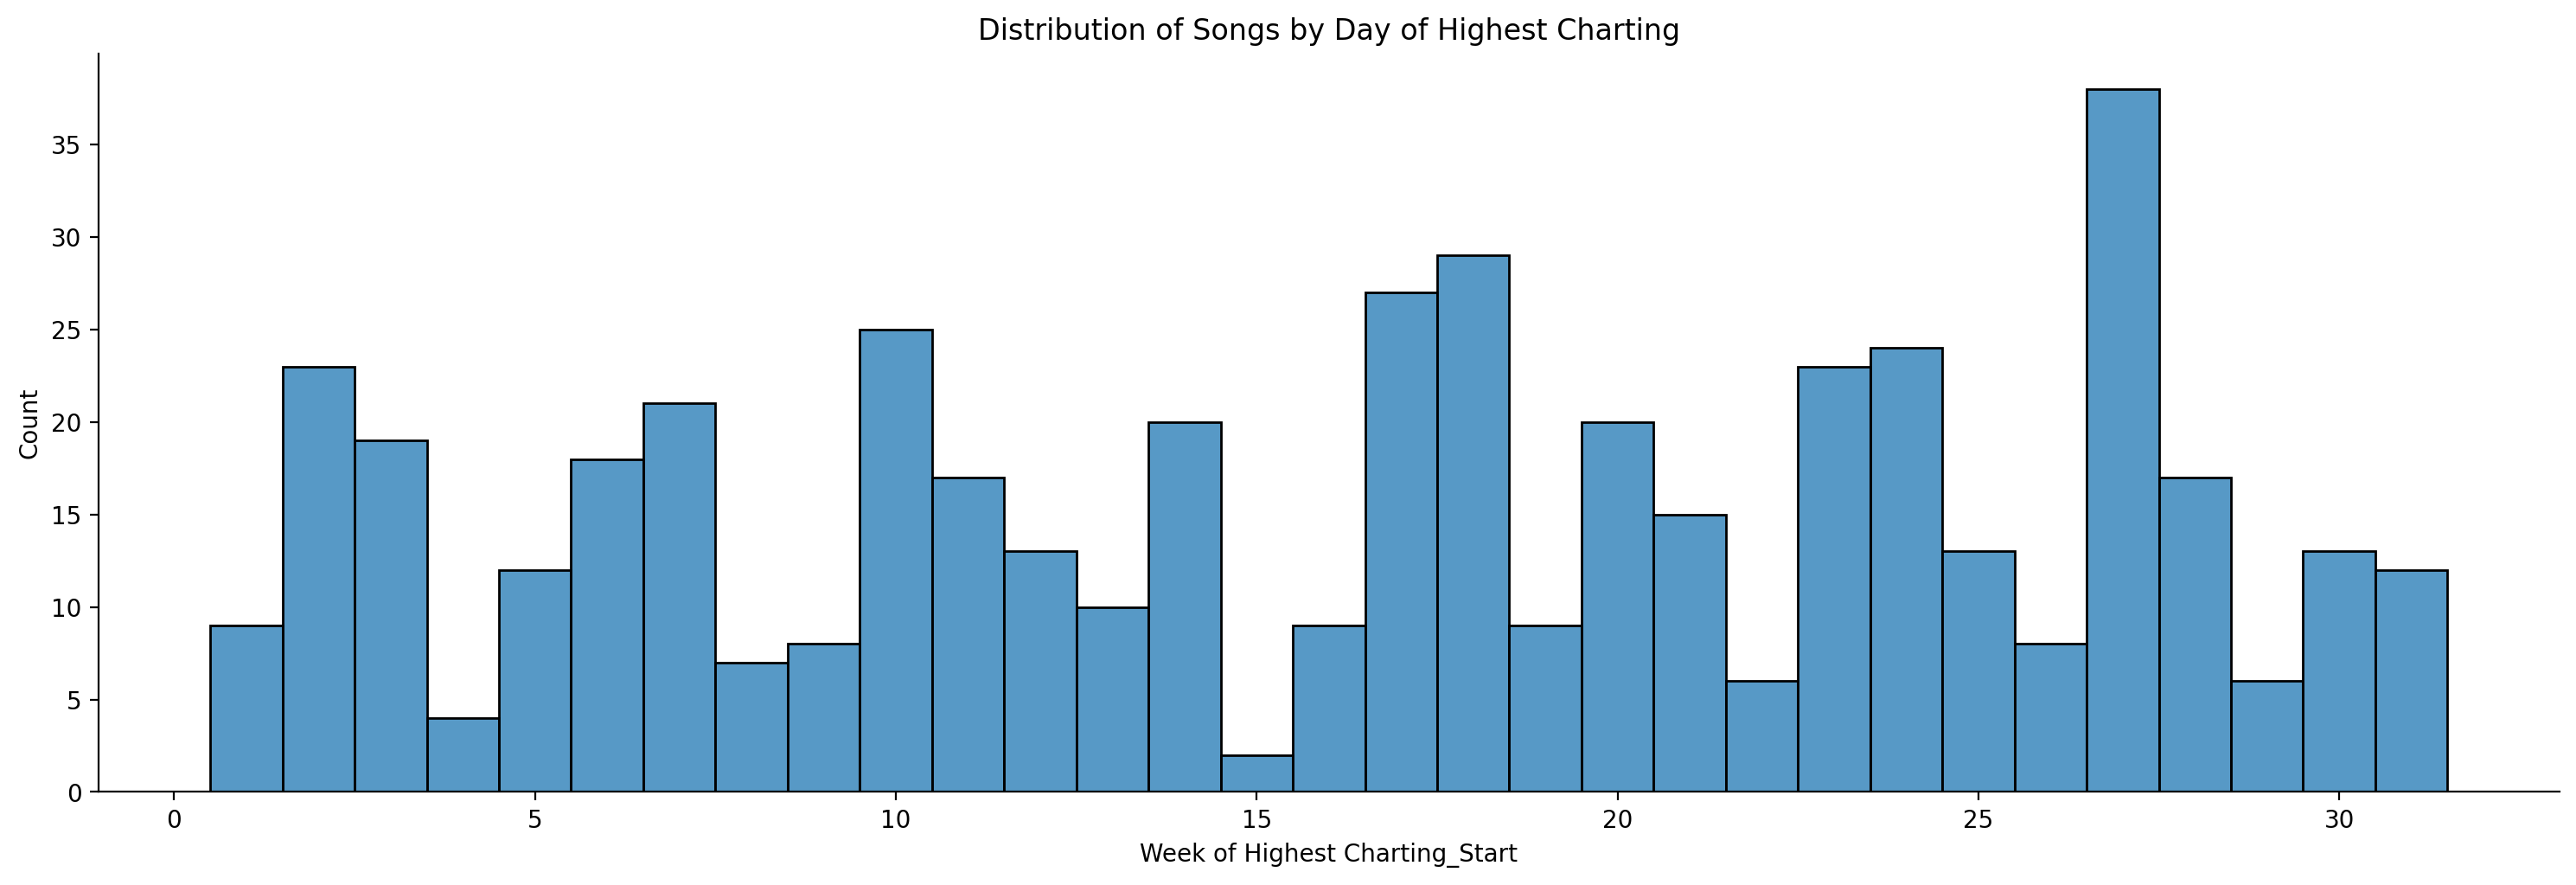

In [26]:
# This works, just run it again. Remove this after you read it.
spotify_top50 = spotifydf[spotifydf['If top 50'] == True]
year = spotify_top50['Week of Highest Charting_Start'].dt.day
sns.displot(year, discrete = True, aspect = 3, height = 5, kind = 'hist').set(title = 'Distribution of Songs by Day of Highest Charting')

The histogram shows the distribution of top 50 songs based on the day of the month that they were charted. The data suggests that there is no clear pattern or relationship between the day of the month and the count of charted songs. Although there are certain days that appear to have higher counts, such as the 1st and the 15th, the data is too variably spread to conclude that a certain day of the month is important in determining a song's success.

This observation is supported by the fact that the histogram shows a relatively uniform distribution of counts across the days of the month, with no clear spikes or dips. This suggests that other factors, such as the song's genre, artist, and marketing strategy, may play a more important role in determining its success than the specific day of the month on which it was charted.



### Visualization 4: Histogram and KDE

Since the Correlation Matrix did not provide us with expected results (e.g. more danceable and upbeat songs get streamed more and are charted higher), we suspect that they may not be linearly correlated but there is some other underlying relationship.

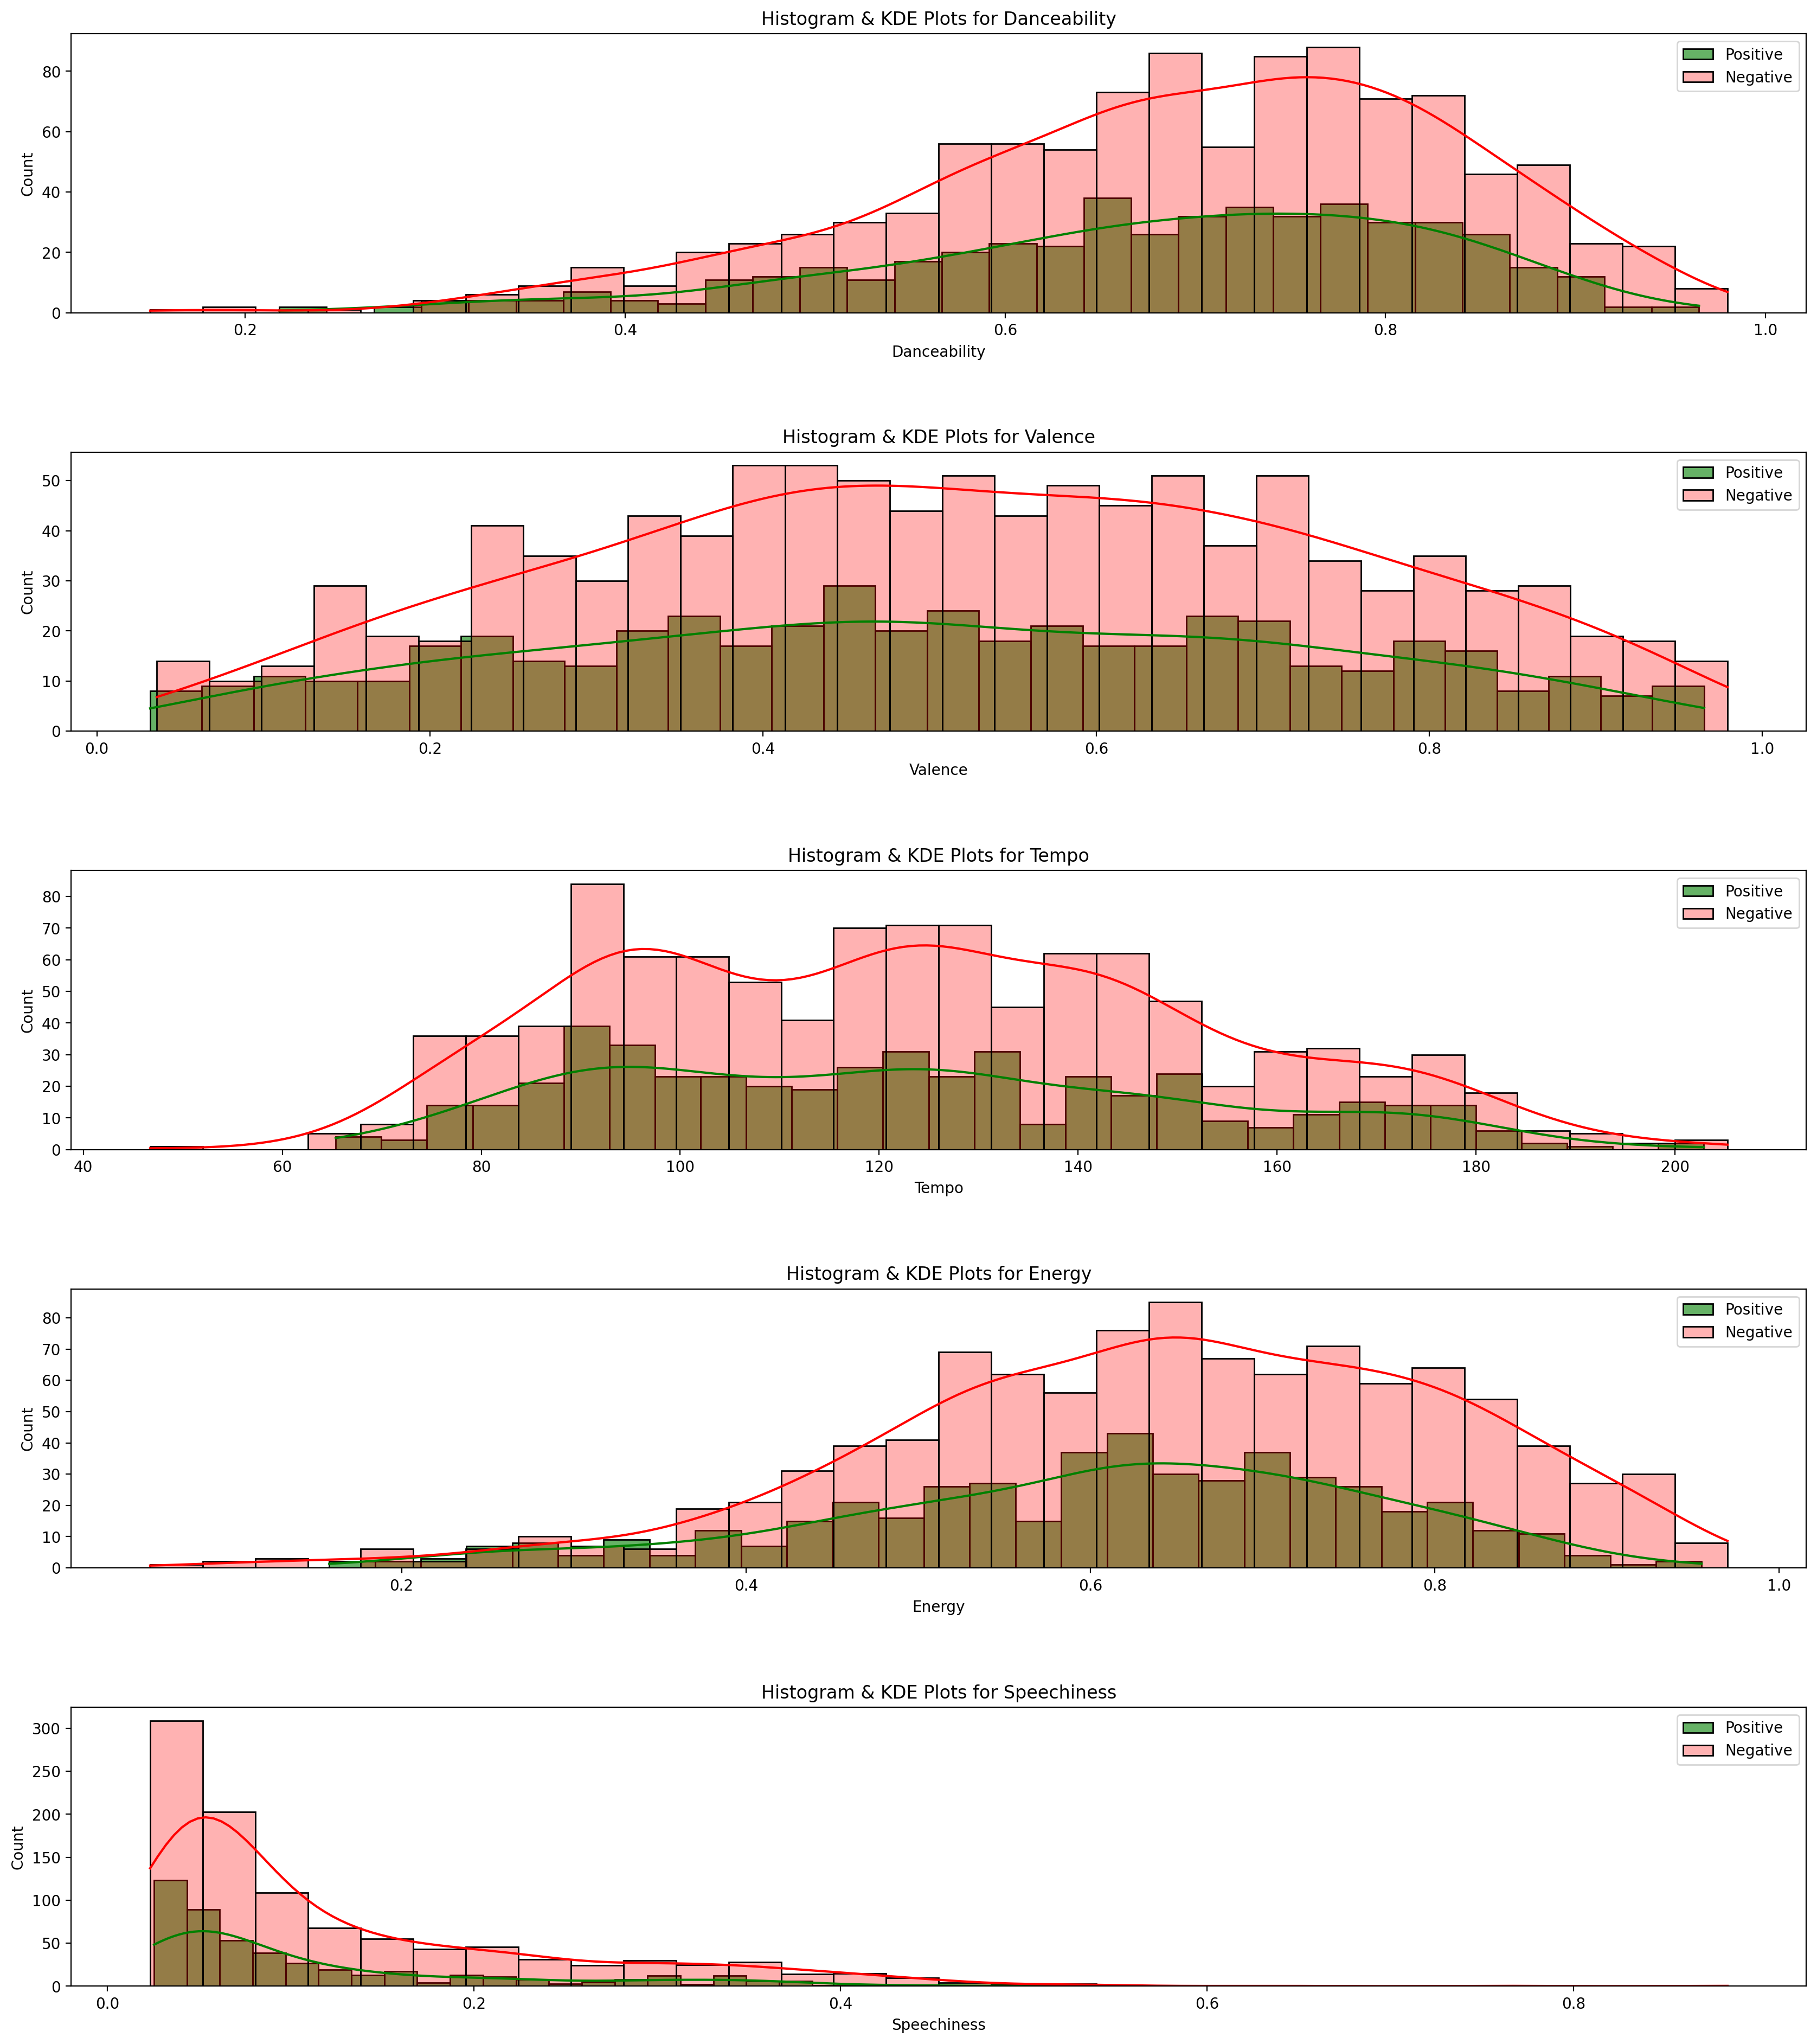

In [27]:
interested_features = ["Danceability", "Valence", "Tempo", "Energy", "Speechiness"]

fig, ax = plt.subplots(nrows=5, ncols=1, figsize=(20, 20))

for i in range(len(interested_features)):
    feature = interested_features[i]
    positive = spotifydf[spotifydf["If top 50"] == 1][feature]
    negative = spotifydf[spotifydf["If top 50"] == 0][feature]
    
    sns.histplot(positive, bins=30, label="Positive", color="green", kde=True, ax=ax[i], alpha=0.6)
    sns.histplot(negative, bins=30, label="Negative", color="red", kde=True, ax=ax[i], alpha=0.3)
    
    ax[i].legend(loc='upper right')
    ax[i].set_title(f"Histogram & KDE Plots for {feature}")
    
plt.subplots_adjust(left=0.1, right=0.9, top=0.95, bottom=0.05, hspace=0.5)
    
plt.show()


The histograms for energy, speechiness, danceability, and valence show that the positive and negative values look nearly identical in shape, with the main difference being scale. Which suggests that these traits are not **just** specific to successful songs that make it in the top 50. Rather, these traits are more general and make a song more palatable to a wider audience. For example, the histograms for energy, speechiness, and danceability show a symmetrical shape with one main peak, suggesting a normal distribution; this indicates that there are specific values of these traits that act as a sweet spot for the success of a song, as a songs with 100% energy are not likely popular. Nevertheless, the width of the curves suggests that the data is moderately spread out, meaning that there is some variability in the values of these traits among popular songs. 

The striking similarities between the positive and negative histograms suggest that these traits are not helpful in differentiating the success of a song, which further reinforces the low correlation values seen in the earlier matrix analysis.

### Visualization 5: Lineplot 

Since Streams and Popularity both seemed to be variables that we positively correlated with the overall success of a song, we want to more closely look at how it compared between songs that made it into the top 50 vs those that didn't, and also split up the data by genre once again so we can visualize these differences in more specific context


Text(0.5, 0.98, 'Relationship between Popularity and Streams of Top 50 and Non-Top 50 Songs by Genre on Spotify')

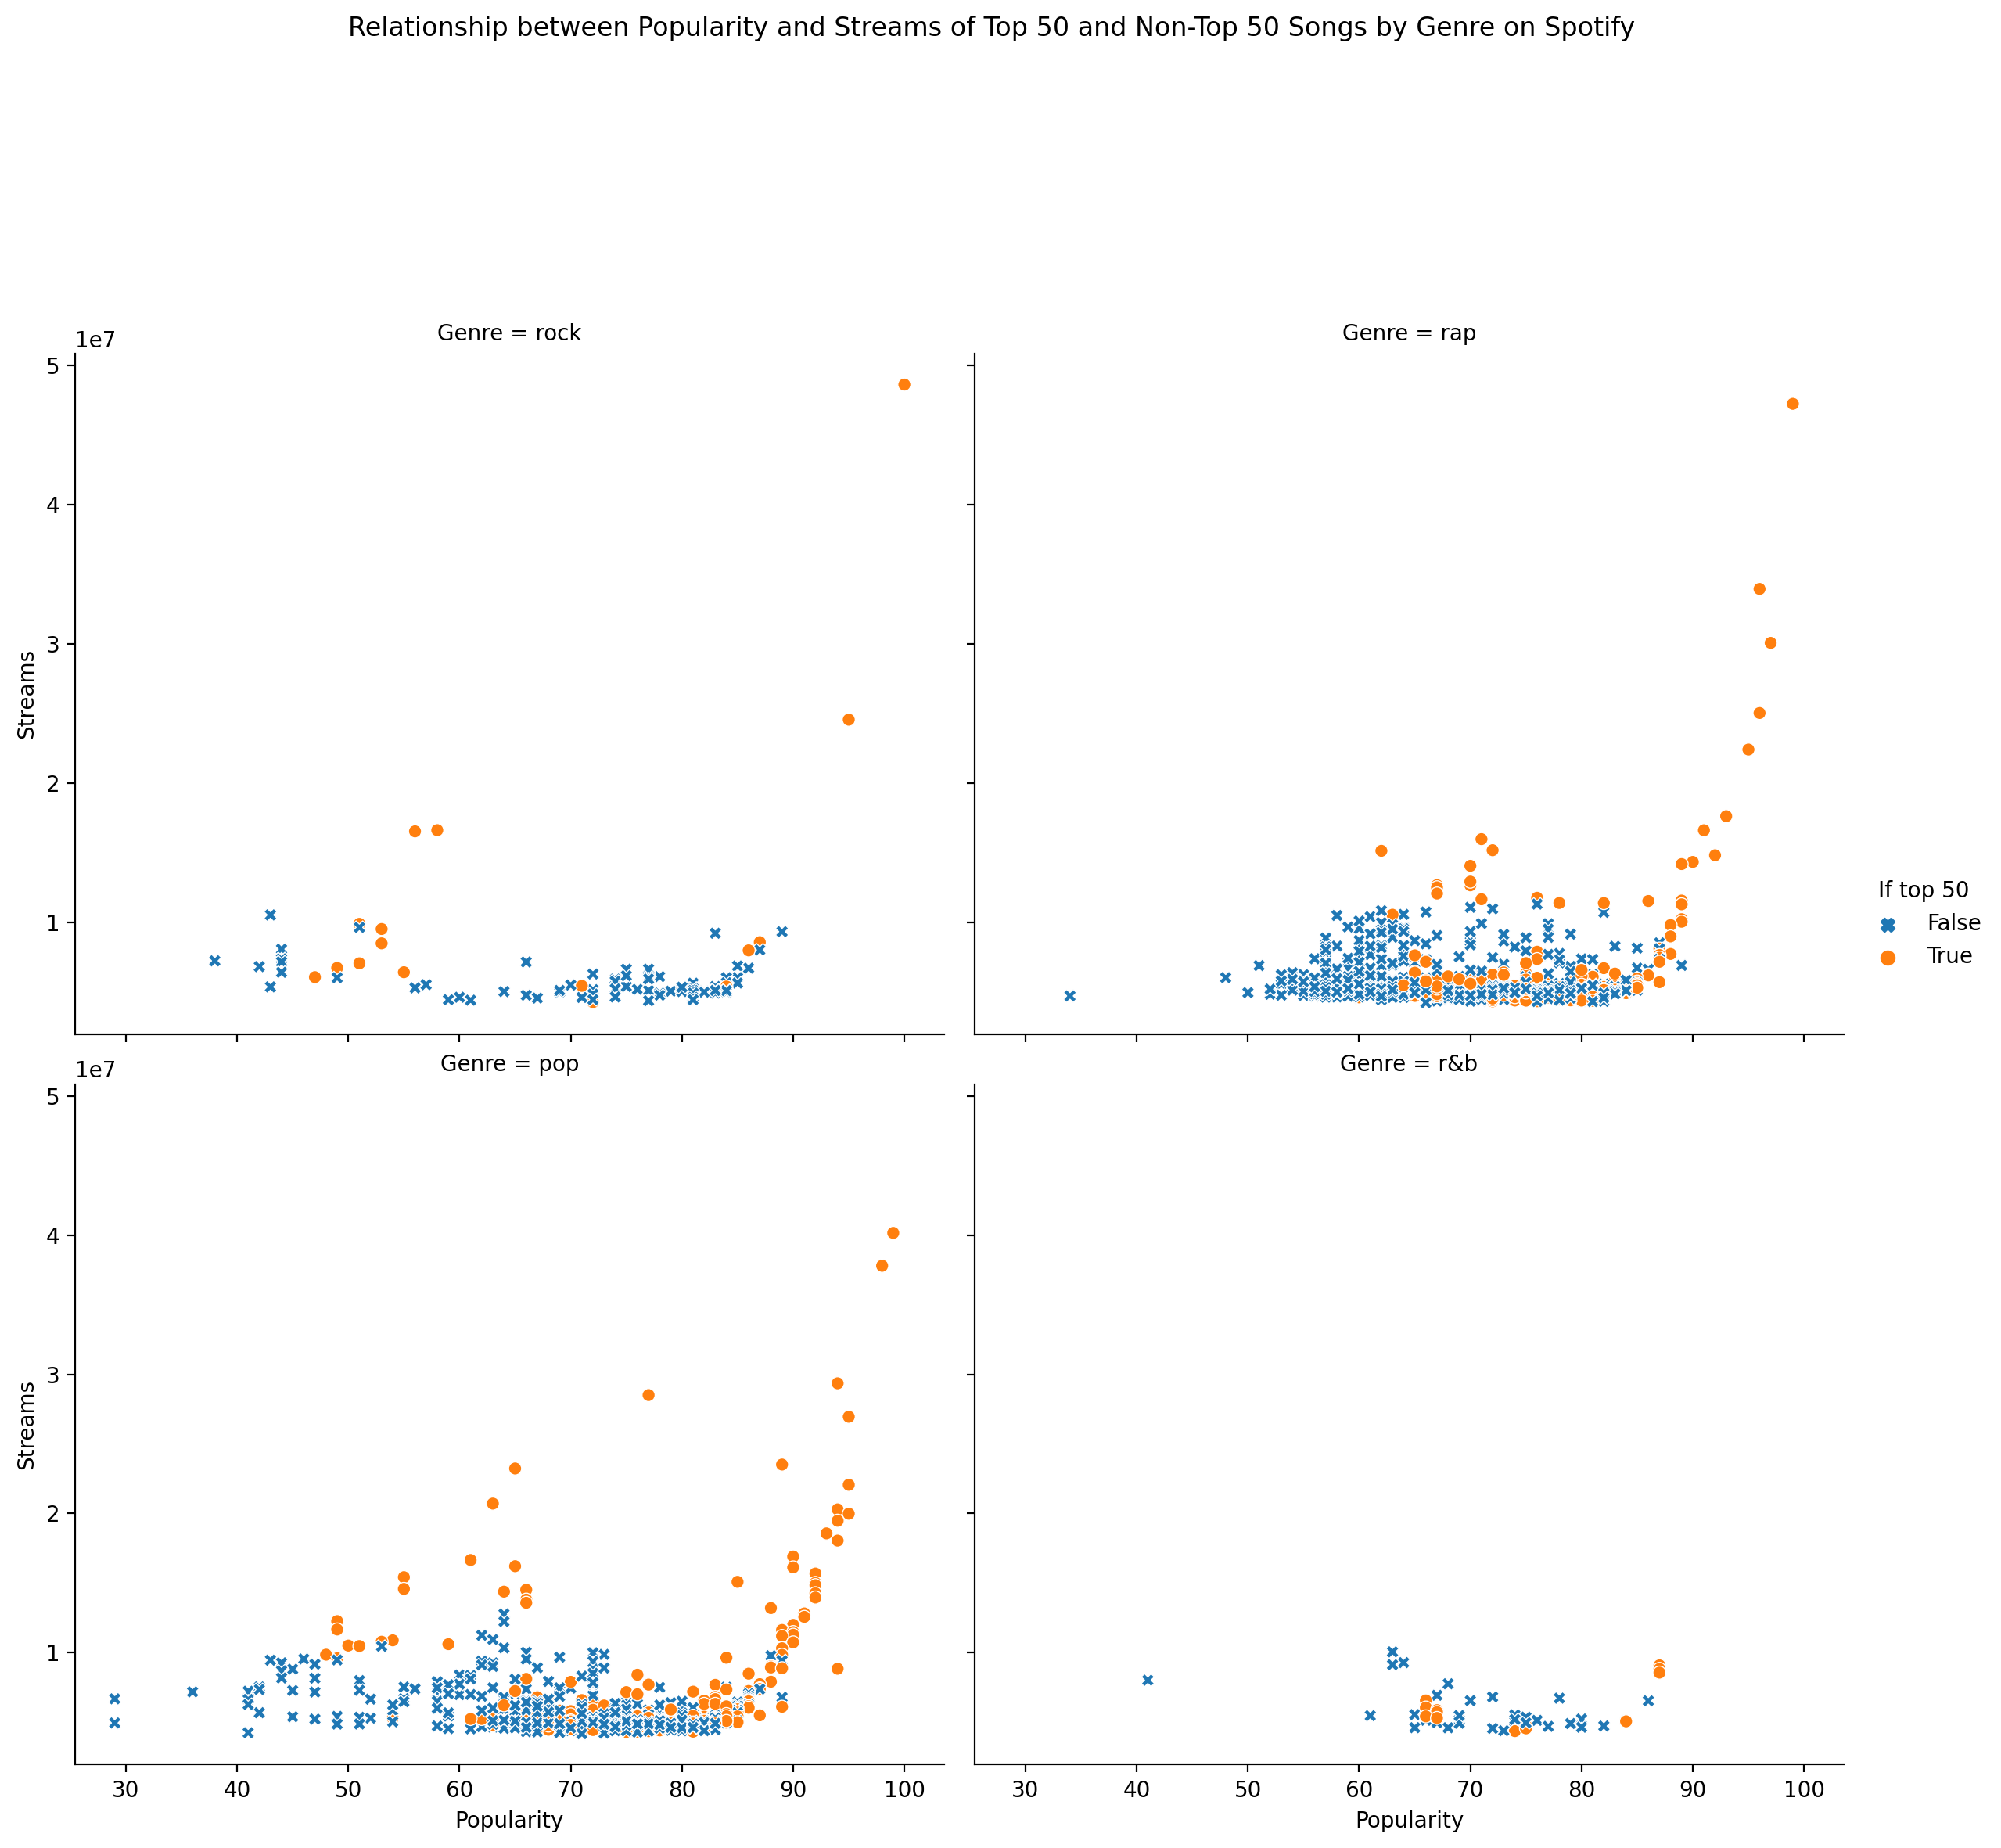

In [28]:
fig3 = sns.relplot(data = spotifydf, x = "Popularity", 
                   y = "Streams", 
                   col = "Genre", 
                   style = "If top 50", 
                   hue = "If top 50", 
                   kind = "scatter", 
                   height = 6, 
                   aspect = 1, 
                   col_wrap = 2, 
                   style_order = [True, False]
                   )
fig3.fig.subplots_adjust(top = 0.8)
fig3.fig.suptitle("Relationship between Popularity and Streams of Top 50 and Non-Top 50 Songs by Genre on Spotify")


   This collection of lineplots show us data that is mostly as we would have expected, but the separation into genres help to visualize the relationships we observed earlier in the `data table` to provide a more detailed breakdown of the correlations shown in the `correlation matrix`, but now adding in the additional key of genres. 
   
Both `pop` and `rap` show very similar overall trends in how the relationship between popularity and streams is almost exponential, and almost exclusively followed by songs that made it in the top 50. While this seems intuitive, it is an important metric to observe because we do not necessarily know how the score for popularity is collected/calculated, so visualizing how strongly it is related to streams and if a song made it into the top 50 is helpful for us moving forward that it can be a variable we utilize. 

The categories of `rock` and `R&B` do not provide such a clear pattern. Both categories never reached near the maximal scores of popularity and we can visually see that number of songs in these genres is far less than the size of the other two. This makes the analysis of certain trends within these categories slightly more difficult because we are working with a much smaller sample size. In addition, the proportion of songs from these genres that made it into the top 50 is not as large as the pop and rap categories, so the spread of data from rock and R&B make it more difficult to identify outliers or what the general trend between popularity and streams are

# Part 4: Feature Selection Preparation

In this section, we will use one qualitative feature and two quantitative features to choose the best data columns for our models. We will justify our choices and explain our approach, which we will repeat for each of the three models that we will build. We will use automated feature selection to estimate which combinations of three features work best for our models in the next section.

In order to do this, we had to drop the following columns from our dataframe: "Artist", "Song Name","Release Date","Song ID", "Weeks Charted","Week of Highest Charting_Start","Week of Highest Charting_End","Week of Highest Charting","Highest Charting Position". 

These are categories we decided are not relevant in deciding the success of a song because categories like Artist, Song Name, Song ID are aspects that will likely distract the success of our model. Artist name is not relevant since we know how famous they are from `Artist Followers`. 
We don’t want the model to learn whether someone with the first name “Ariana” or “Bruno” will definitely come up with popular songs since we have better measures. Song name and Song ID are both not important based on the same reasoning above. 


The metric for Weeks charted we decided was too similar and not as clear or important a statistic as `Number of Times Charted`, so we dropped that as well. 

In `Visualization 3`, we showed that the variable Week of highest Charting is not important, so we decided on not using that as a variable in our model. 

The Highest Charting Position was dropped because we replaced it with the `If top 50` boolean column

In [29]:
#Delete columns that are not related to the characteristics of the song.   
spotify_selection = spotifydf.drop(["Artist", 
                                  "Song Name", 
                                  "Release Date",
                                  "Song ID",
                                  "Weeks Charted",
                                  "Week of Highest Charting_Start",
                                  "Week of Highest Charting_End",
                                  "Week of Highest Charting",
                                  "Highest Charting Position"], axis=1)
#display data set
spotify_selection.head()

Number of Times Charted   Streams  Artist Followers Genre  Popularity  \
0                        8  48633449         3377762.0  rock       100.0   
1                        3  47248719         2230022.0   rap        99.0   
2                       11  40162559         6266514.0   pop        99.0   
3                        5  37799456        83293380.0   pop        98.0   
4                        1  33948454         5473565.0   rap        96.0   

   Danceability  Energy  Loudness  Speechiness  Acousticness  Liveness  \
0         0.714   0.800    -4.808       0.0504        0.1270    0.3590   
1         0.591   0.764    -5.484       0.0483        0.0383    0.1030   
2         0.563   0.664    -5.044       0.1540        0.3350    0.0849   
3         0.808   0.897    -3.712       0.0348        0.0469    0.3640   
4         0.736   0.704    -7.409       0.0615        0.0203    0.0501   

     Tempo  Duration (ms)  Valence  Chord  If top 50  
0  134.002       211560.0    0.589      B       True  
1  169.928       141806.0    0.478  C#/Db       True  
2  166.928       178147.0    0.688      A       True  
3  126.026       231041.0    0.591      B       True  
4  149.995       212000.0    0.894  D#/Eb       True

To prepare the data set prior to inputting it into our machine learning models, we have to split it into training and test sets and clean the data. This is to ensure that the information from the data cleaning process does not unintentionally pollute the test set.

To split the data set into training and test sets, we used the train_test_split() function with a 20/80 split, such that 80% of the data set will be used for training and 20% will be used for testing. The training set will be used to develop a trained model, while the test set will be used to determine the accuracy of the model in predicting whether a song is in the Top 50.

In [30]:
from sklearn.model_selection import train_test_split

# Spliting the data into test set and train set.
# Using proportion of 80% of the data as train set, and 20% of the data as test set.
train, test = train_test_split(spotify_selection, test_size = 0.2, random_state = 20)

# Display the shape of train and test sets.
train.shape, test.shape

((1200, 16), (300, 16))

In the code below, We tranfrom `Genre` and `Chord` into number, so that we can use it in feature selection and modeling.

<br>Corresponding reference table for `Genre`：
- 0 = pop
- 1 = r&b
- 2 = rap
- 3 = rock

<br>Corresponding reference table for `Chord`：
- 0 = A
- 1 = A#/Bb
- 2 = B
- 3 = C
- 4 = C#/Db
- 5 = D
- 6 = D#/Eb
- 7 = E
- 8 = F
- 9 = F#/Gb
- 10 = G
- 11 = G#/Ab

Here, we want to clean the dataset by integer encoding the qualitative variables (`Chord` and `Genre`) and split the data into `X` and `y` which contains the predictor and target variable(s) dataframe respectively.

We will write a function called `spotify_prep` to avoid repeating code.

In [31]:
from sklearn.preprocessing import LabelEncoder

def spotify_prep(data, target):
    """Prepare the data for modeling.
    Step 1: Make a copy of the data
    Step 2: Turn genre and chord into number
    Step 3: Split the data into X and y

    Args:
        data: train or test set
        target: target variable

    Returns:
        X: Predictor dataframe - cleaned df without target variable (i.e. If top 50)
        y: Target variable - If top 50 column only from cleaned df
    """
    
    # Makes a copy of data
    df = data.copy()
    
    # Turning genre and chord into number
    le = LabelEncoder()
    df['Genre'] = le.fit_transform(df['Genre'])
    df['Chord'] = le.fit_transform(df['Chord'])
    
    # Split the data into X and y
    X = df.drop([target], axis = 1)
    y = df[target]
    return (X,y)
    

# Getting train and test sets ready for modeling
X_train, y_train = spotify_prep(train, target = "If top 50")
X_test, y_test = spotify_prep(test, target = "If top 50")

# Display the shape of train and test sets.
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1200, 15) (1200,)
(300, 15) (300,)


In [32]:
# import necessary functions from sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVC

In [33]:
# ignore warnings
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)
from sklearn.exceptions import FitFailedWarning
warnings.filterwarnings('ignore', category=FitFailedWarning)
warnings.filterwarnings("ignore", category=UserWarning)
from warnings import simplefilter
warnings.simplefilter(action='ignore', category=FutureWarning)

In [34]:
# define "spotify_quantitative" for all possiable quantitative values
spotify_quantitative = spotify_selection.drop(["Genre","Chord","If top 50"], axis=1)
spotify_qualitative = spotify_selection[["Genre","Chord"]]
all_qualitative = list(spotify_qualitative.columns)
all_quantitative = list(spotify_quantitative.columns)

In [35]:
all_qualitative

['Genre', 'Chord']

In [36]:
all_quantitative

['Number of Times Charted',
 'Streams',
 'Artist Followers',
 'Popularity',
 'Danceability',
 'Energy',
 'Loudness',
 'Speechiness',
 'Acousticness',
 'Liveness',
 'Tempo',
 'Duration (ms)',
 'Valence']

Right now, we have clean training data ready to train with different models. In order to determine which model can highly predict if a song is in top 50 before, we must select the best three features for each model. For the qualitative feature, we can only use `Genre` and `chord`, as it is the only qualitative datas in our dataset. For the two quantitative features, we will loops through all available quantitative values to determine which two of them work best with `Genre` and `chord`.

We are going to create some functions that are useful for our features section.
They are:
- get_cv_score(model)
- display_best_cols(results)

In [37]:
def get_cv_score(model):
    """
    Calculate the scores for models using different pairs of quantitative features.
    
    Args:
        model: a function that takes a list of column names as input and 
        returns the score of the model using the given columns.
    
    Returns:
        A dictionary containing the scores for models using different pairs of quantitative features.
    """
    # create a dictionary to store the results
    results = {}
    # loop through all possible pairs of quantitative features
    for i in range(len(all_quantitative)):
        for j in range(i + 1, len(all_quantitative)):
            for k in all_qualitative:
                cols = [k, all_quantitative[i], all_quantitative[j]]
                # score = np.round(model(cols),3)
                score = np.round(model(cols), 3)
                results[str(cols)] = score
                # print the results for the current set of columns
                print(f"Training with columns {cols} \nThe cv score is {score}\n")
                print(type(score))
    return results

In [38]:
def display_best_cols(results):
    """
    This function takes in the results dictionary of a model's scores and returns the combination of columns that resulted in the highest score along with the score itself.

    Args:
        results: A dictionary with column combinations as keys and their corresponding scores as values.

    Returns:
        None. The function simply prints out the combination with the highest score and its corresponding score.
    """
    # Get the highest cols combination.
    best_cols = max(results, key=results.get)
    best_score = results[best_cols]
    print(f"The combination with the highest score is {best_cols} with a cv score of {best_score}.")

# Part 5: Modelling

### 5.0: Plotting Decision Regions

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

def plot_decision_regions(model, X_test, y_test, colx, coly, qualitative_feature):
    """
    Plots the decision regions of a classifier along with the data points.

    Args:
    - model: a scikit-learn classifier that has a `fit` and `predict` method
    - X_test: a numpy array of shape (n_samples, n_features) representing the test data
    - Y_test: a numpy array of shape (n_samples,) representing the labels of the test data
    - colx: a string representing the column name for the x-axis of the plot
    - coly: a string representing the column name for the y-axis of the plot
    - qualitative_feature: a string representing the column name for the qualitative feature used to plot decision regions
    
    Returns:
    - None
    """
    # create dictionary for labels based on qualitative feature
    if qualitative_feature == "Genre":
        key = {0: "pop", 1: "r&b", 2: "rap", 3: "rock"}
        #iterate = X_test[qualitative_feature].max()
    elif qualitative_feature == "Chord":
        key = {0: "A", 1: "A#/Bb", 2: "B", 3: "C", 4: "C#/Db", 5: "D", 6: "D#/Eb", 7: "E", 8: "F", 9: "F#/Gb", 10: "G", 11: "G#/Ab"}
        #iterate = X_test[qualitative_feature].max()+1
    # create dictionary for legend labels
    top_50_key = {0: "Not Top 50", 1: "Top 50"}
    
    
    for i in range(X_test[qualitative_feature].max()+1):
        # extract data for current qualitative feature value
        XX = X_test[[colx, coly]][X_test[qualitative_feature] == i]
        index = X_test.index[X_test[qualitative_feature] == i].tolist()
        YY = y_test[index]

        # fit model to current data
        model.fit(XX, YY)

        # create meshgrid for plotting decision boundary
        x0, x1 = XX[colx], XX[coly]
        linspace_x = np.linspace(x0.min(), x0.max(), 501)
        linspace_y = np.linspace(x1.min(), x1.max(), 501)
        xx, yy = np.meshgrid(linspace_x, linspace_y)

        # make predictions on meshgrid and reshape for plotting
        XY = np.c_[xx.ravel(), yy.ravel()]
        p = model.predict(XY).reshape(xx.shape)

        # plot decision boundary and data points
        fig, ax = plt.subplots(1)
        ax.contourf(xx, yy, p, cmap="Set1", alpha=0.2)
        scatter = ax.scatter(x0, x1, c=YY, cmap="Set1")
        ax.set(xlabel=colx, ylabel=coly)

        # set title and legend label for current plot
        ax.set(title=f"{qualitative_feature} = {key[i]} ")
        L = ax.legend(*scatter.legend_elements())

        # update legend labels to use top 50 dictionary
        for i in range(len(L.get_texts())):
            text = str(L.get_texts()[i])
            new_label = top_50_key[int(text[27])]
            L.get_texts()[i].set_text(new_label)


###  5.1 : Logistic Regression model

###  5.1.1 : Feature selection

In [40]:
# define a function to compute the score for Logistic Regression model
def cv_score_LRM(cols):
    """
    The funtion compute the score for Logistic Regression model.
    
    Args:
        cols: a list of column names to use as features in the logistic regression model.
    
    Returns:
        A float representing the accuracy score of the logistic regression model.
    """
    LR = LogisticRegression(max_iter=150, C = 1.0)
    return cross_val_score(LR, X_train[cols], y_train, cv = 5).mean()

In [41]:
# observe Logistic Regression model socre
LRM_cv_score = get_cv_score(cv_score_LRM)

Training with columns ['Genre', 'Number of Times Charted', 'Streams'] 
The cv score is 0.678

<class 'numpy.float64'>
Training with columns ['Chord', 'Number of Times Charted', 'Streams'] 
The cv score is 0.678

<class 'numpy.float64'>
Training with columns ['Genre', 'Number of Times Charted', 'Artist Followers'] 
The cv score is 0.678

<class 'numpy.float64'>
Training with columns ['Chord', 'Number of Times Charted', 'Artist Followers'] 
The cv score is 0.678

<class 'numpy.float64'>
Training with columns ['Genre', 'Number of Times Charted', 'Popularity'] 
The cv score is 0.758

<class 'numpy.float64'>
Training with columns ['Chord', 'Number of Times Charted', 'Popularity'] 
The cv score is 0.762

<class 'numpy.float64'>
Training with columns ['Genre', 'Number of Times Charted', 'Danceability'] 
The cv score is 0.749

<class 'numpy.float64'>
Training with columns ['Chord', 'Number of Times Charted', 'Danceability'] 
The cv score is 0.743

<class 'numpy.float64'>
Training with columns 

In [42]:
# obsevre the best score
display_best_cols(LRM_cv_score)

The combination with the highest score is ['Chord', 'Number of Times Charted', 'Popularity'] with a cv score of 0.762.


Based on the analysis and comparison of different feature combinations, the three features ['Chord', 'Number of Times Charted', 'Popularity'] were selected as the best combination for the Logistic Regression model. This combination achieved the highest score, indicating a better predictive performance of the model of around 0.762. In this method we ran our combinations using different pairs of quantitative features and a single qualitative feature 'Chord'at the minimum max iterations that would allow them all to very converge to see what combination would give us the best performance. 
The combination of ['Chord', 'Number of Times Charted', 'Popularity'] had the highest regression score and so based on these results in addition to the exploratory data analysis, they were chosen as the three features for Logistic Regression model.

In [43]:
# Define the hyperparameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2', 'elasticnet', None]
}

# Instantiate a logistic regression model with the desired settings
LR = LogisticRegression(max_iter=1000, solver='saga')

# Instantiate the GridSearchCV object with the logistic regression model and hyperparameter grid
grid = GridSearchCV(LR, param_grid)

# Fit the GridSearchCV object to the training data, optimizing for the specified metrics
grid.fit(X_train[['Chord', 'Number of Times Charted', 'Popularity']], y_train)

# Print the best hyperparameters found by GridSearchCV
print(grid.best_params_)

{'C': 0.1, 'penalty': 'l1'}


To have the best number of parameters that can give us the best cv score with the best combinations. We are using GridSearchCV to find it out. The best hyperparameters found by GridSearchCV are printed out using 'grid.best_params_'. The input features for the model are 'Chord', 'Number of Times Charted', and 'Popularity', and the corresponding target variable is 'Y_train'.
The best parameters for logistic regression model :{'C': 0.1, 'penalty': 'l1'}

Scaling the data before putting it into a k-NN (k-Nearest Neighbors) machine learning model is important because k-NN is a distance-based algorithm, meaning that it measures the distance between data points to make predictions.
If the features in the data are not scaled properly, then the distance between data points may not accurately reflect their true differences. For example, if one feature has a large scale compared to another feature, then the distance between data points will be dominated by the variation in the large-scale feature, which may not be reflective of the actual differences between data points.
Scaling the data ensures that all features are on the same scale, so that the distances between data points reflect their true differences in all dimensions. This can improve the accuracy of the k-NN model.
Additionally, scaling the data can help to speed up the computation of the k-NN algorithm, since it reduces the range of possible distance values and can make the algorithm more efficient.
In our case, our `Number of Times Charted` could be significantly higher than the `Popularity` score, which only ranges from 0 to 1.0. Therefore, scaling is necessary

In [44]:
best_combinations_LR = ['Chord', 'Number of Times Charted', 'Popularity']
# create logistic regression model with best parameters for our data sets

LR = LogisticRegression(max_iter=1000, C = grid.best_params_['C'], solver = 'saga', penalty = grid.best_params_['penalty'])
best_score_LR = cross_val_score(LR, X_train[best_combinations_LR], y_train, cv = 5).mean()

print(f"The cv score of parameters {grid.best_params_} and combinations {best_combinations_LR} is {best_score_LR}.")

The cv score of parameters {'C': 0.1, 'penalty': 'l1'} and combinations ['Chord', 'Number of Times Charted', 'Popularity'] is 0.7466666666666667.


### Apply combination to the model with test set

In [45]:
# # create logistic regression model with best parameters for our data sets
# LR = LogisticRegression(max_iter=1000, C = 10,solver = 'saga', penalty = 'l1')

# fit the model
LR.fit(X_train[best_combinations_LR], y_train)

lr_train_score =  LR.score(X_train[best_combinations_LR], y_train)

#display the model score 
lr_test_score = LR.score(X_test[best_combinations_LR], y_test)

print(f"LR CV Score: = {best_score_LR}")
print(f"LR Train Score: = {lr_train_score}")
print(f"LR Test Score: = {lr_test_score}")


LR CV Score: = 0.7466666666666667
LR Train Score: = 0.7475
LR Test Score: = 0.75


              precision    recall  f1-score   support

       False       0.76      0.95      0.84       209
        True       0.71      0.30      0.42        91

    accuracy                           0.75       300
   macro avg       0.73      0.62      0.63       300
weighted avg       0.74      0.75      0.71       300



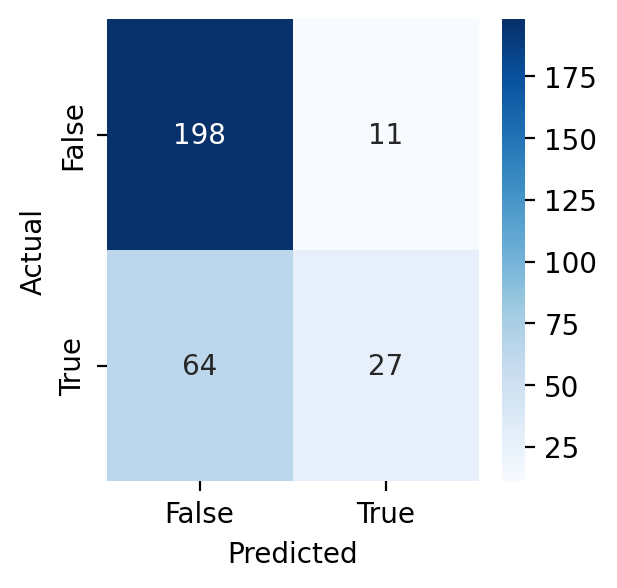

In [46]:
from sklearn.metrics import classification_report
y_pred = LR.predict (X_test[['Chord', 'Number of Times Charted', 'Popularity']])


report = classification_report(y_test, y_pred)
print(report)
confusion_mat = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames= ['Predicted'])
plt.figure (figsize=(3, 3), dpi=100)
sns.heatmap(confusion_mat, annot=True, cmap='Blues', fmt='g')
plt.show()

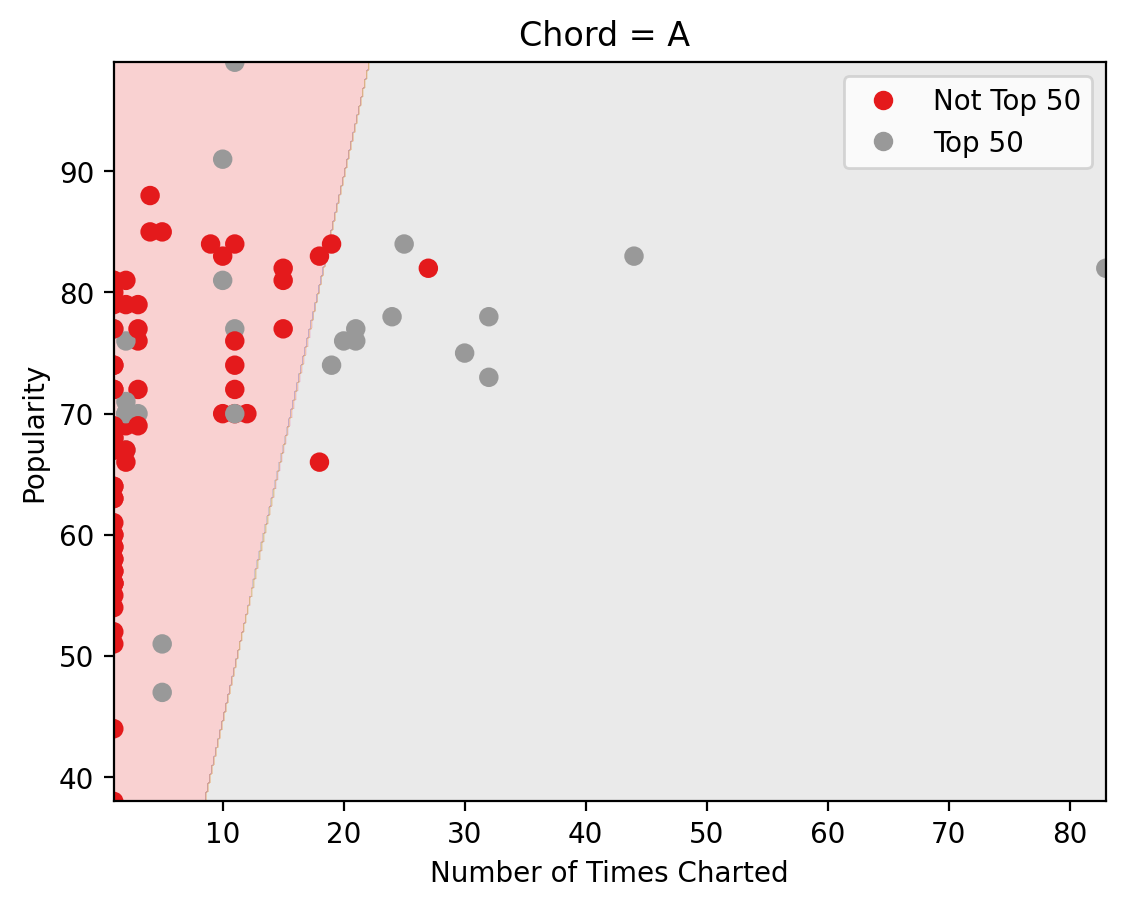

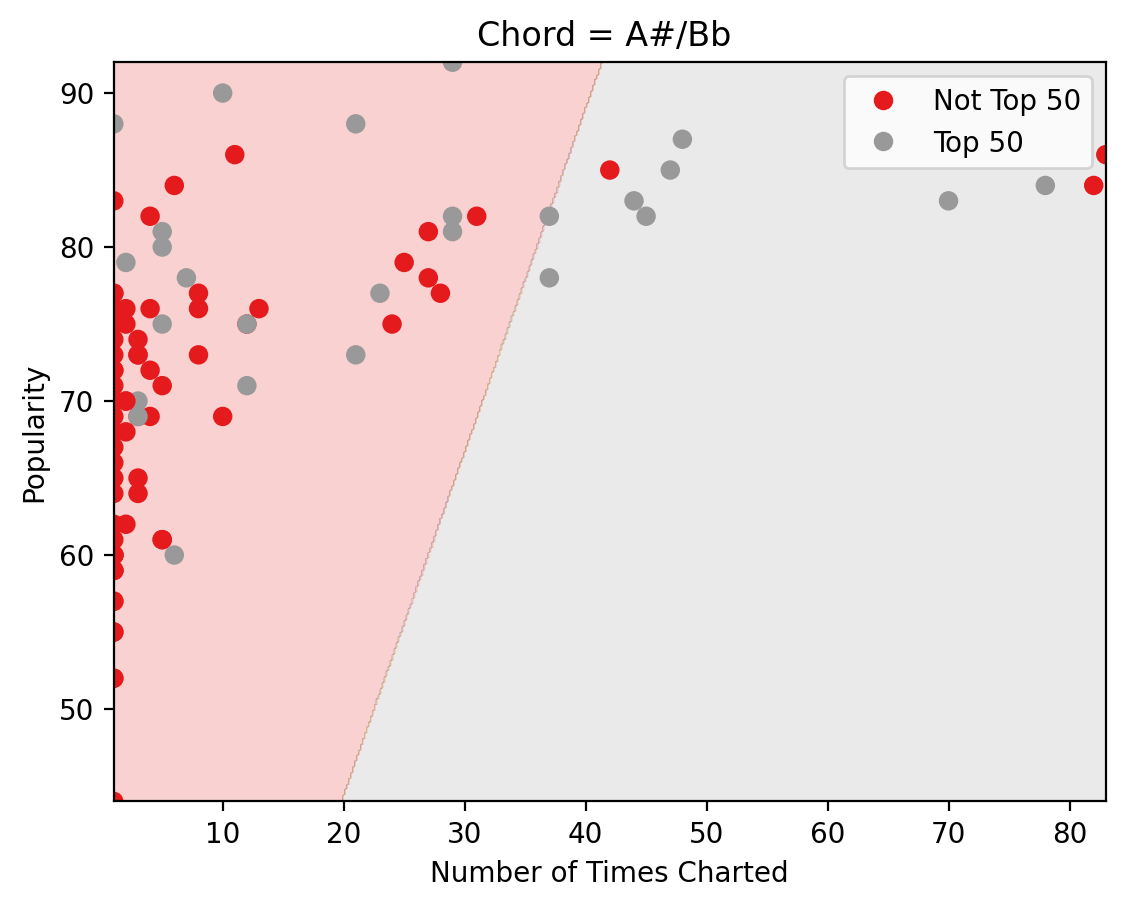

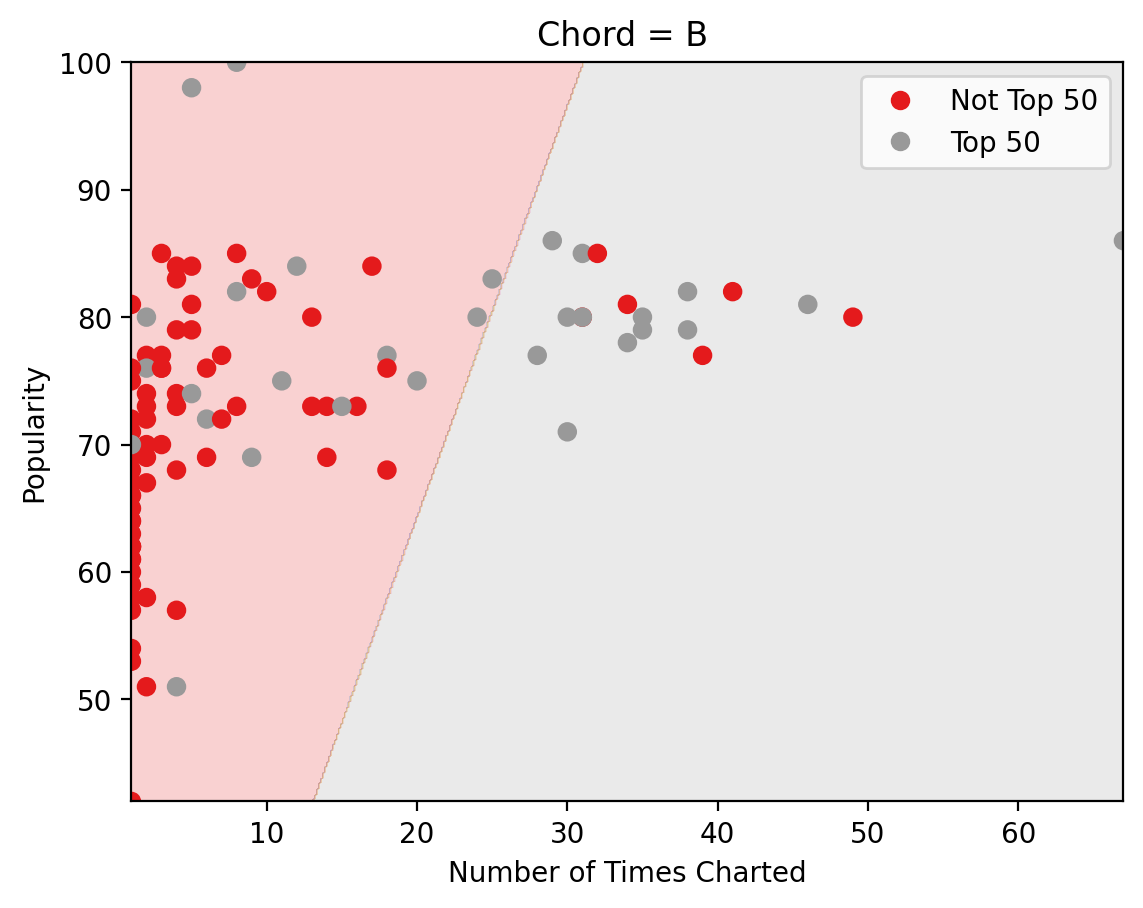

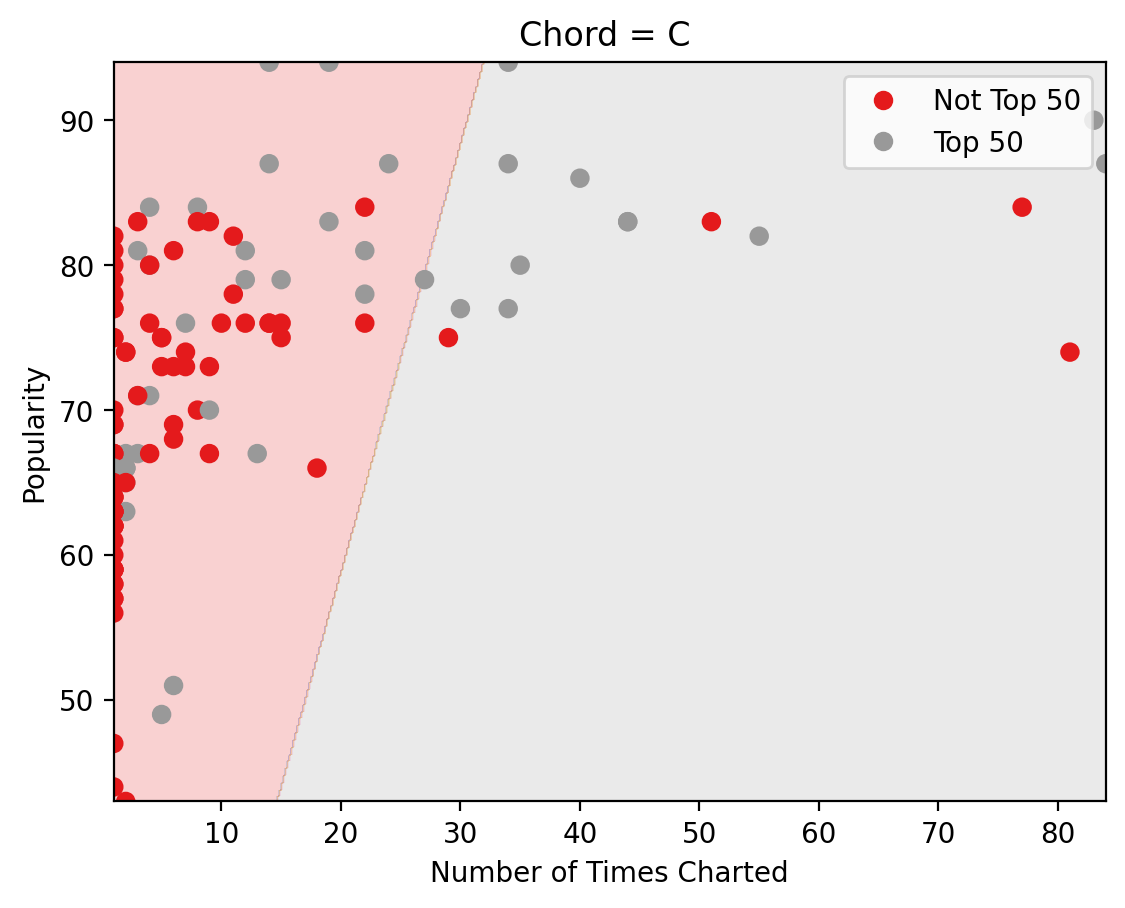

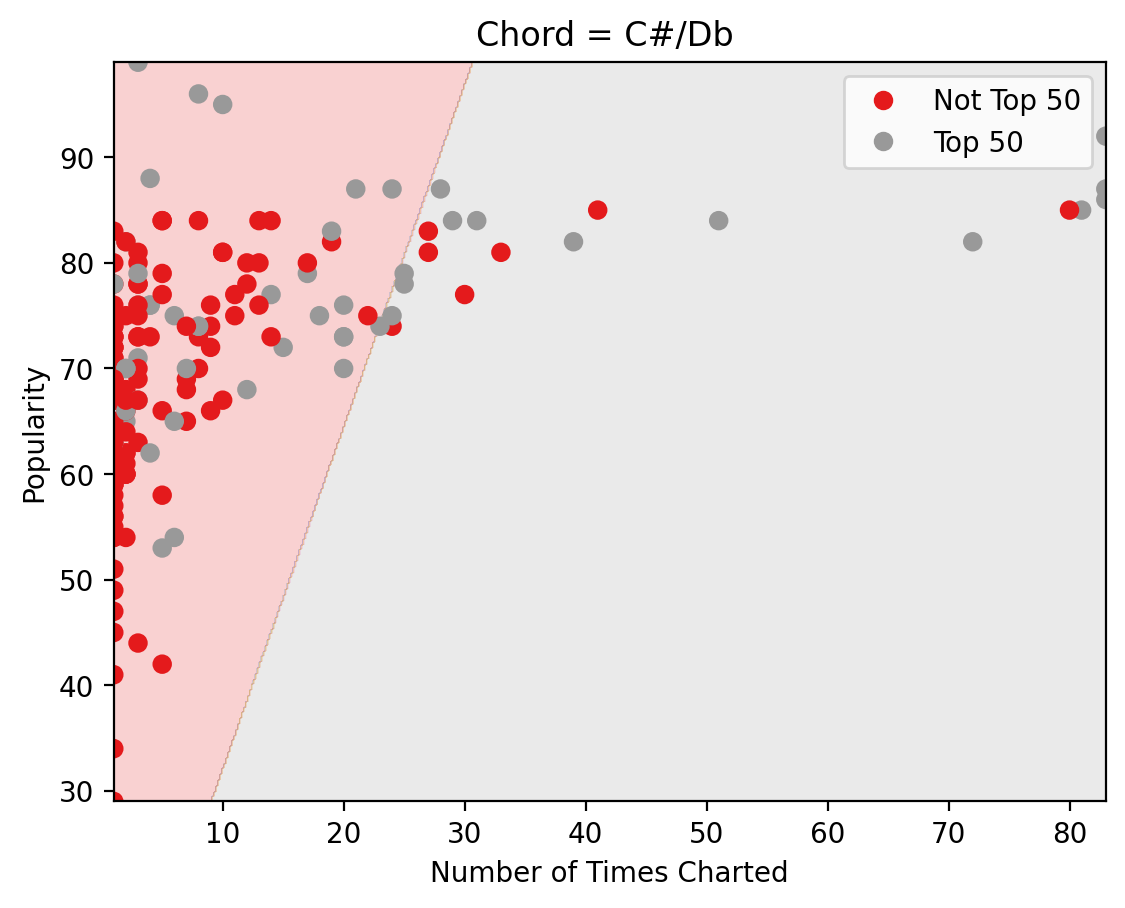

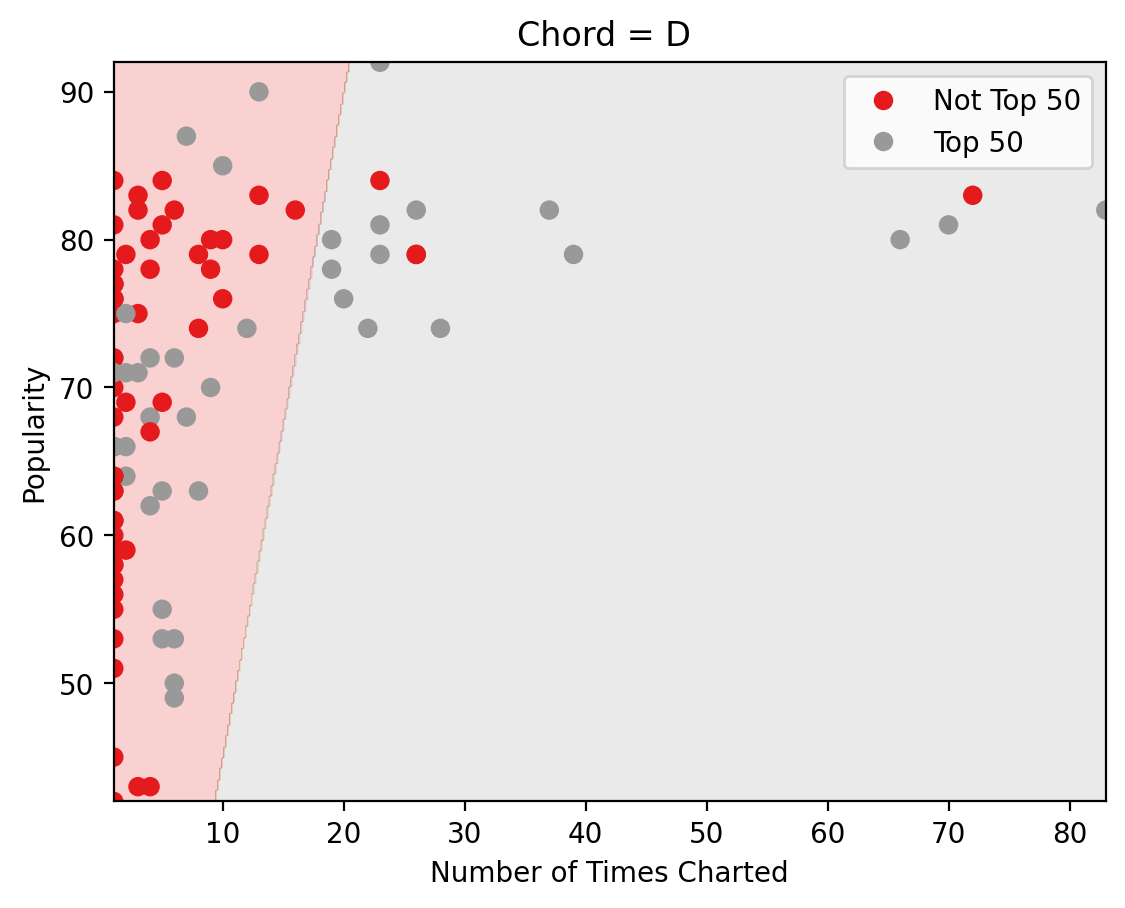

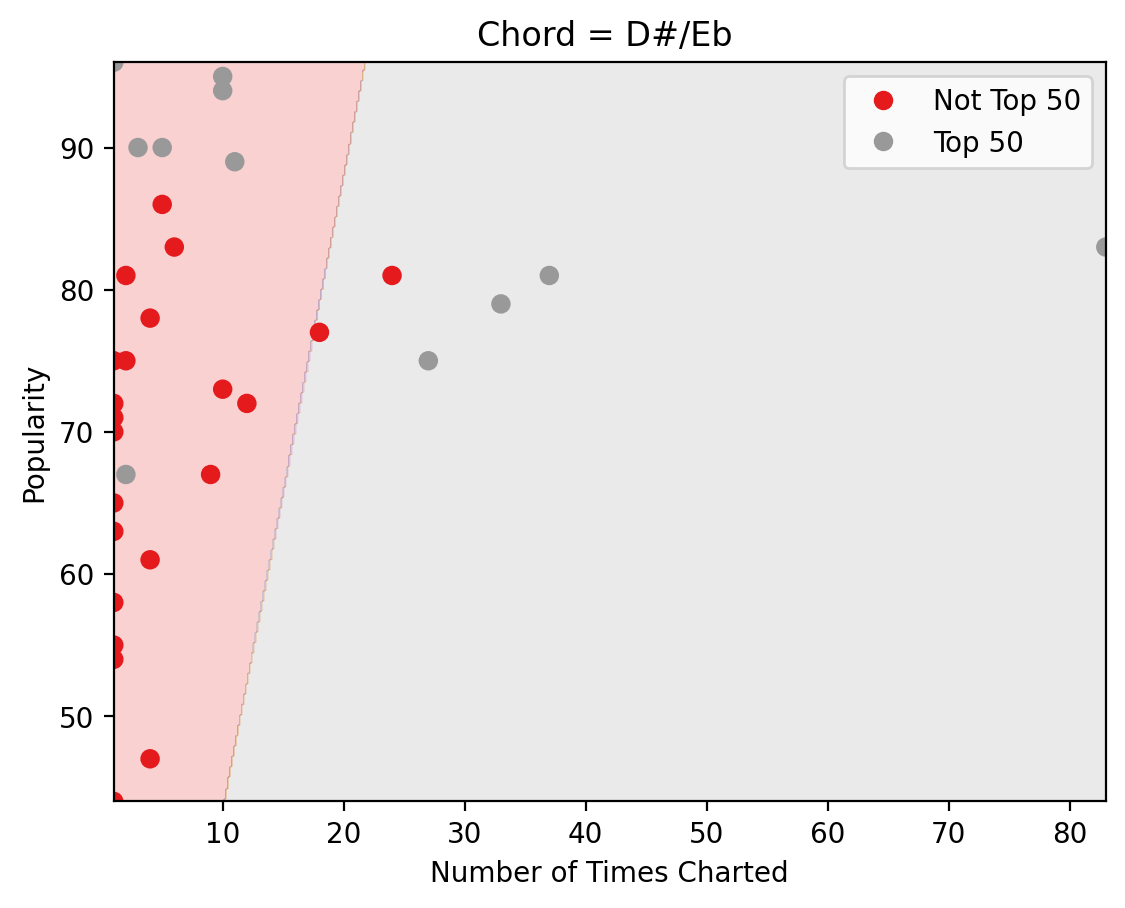

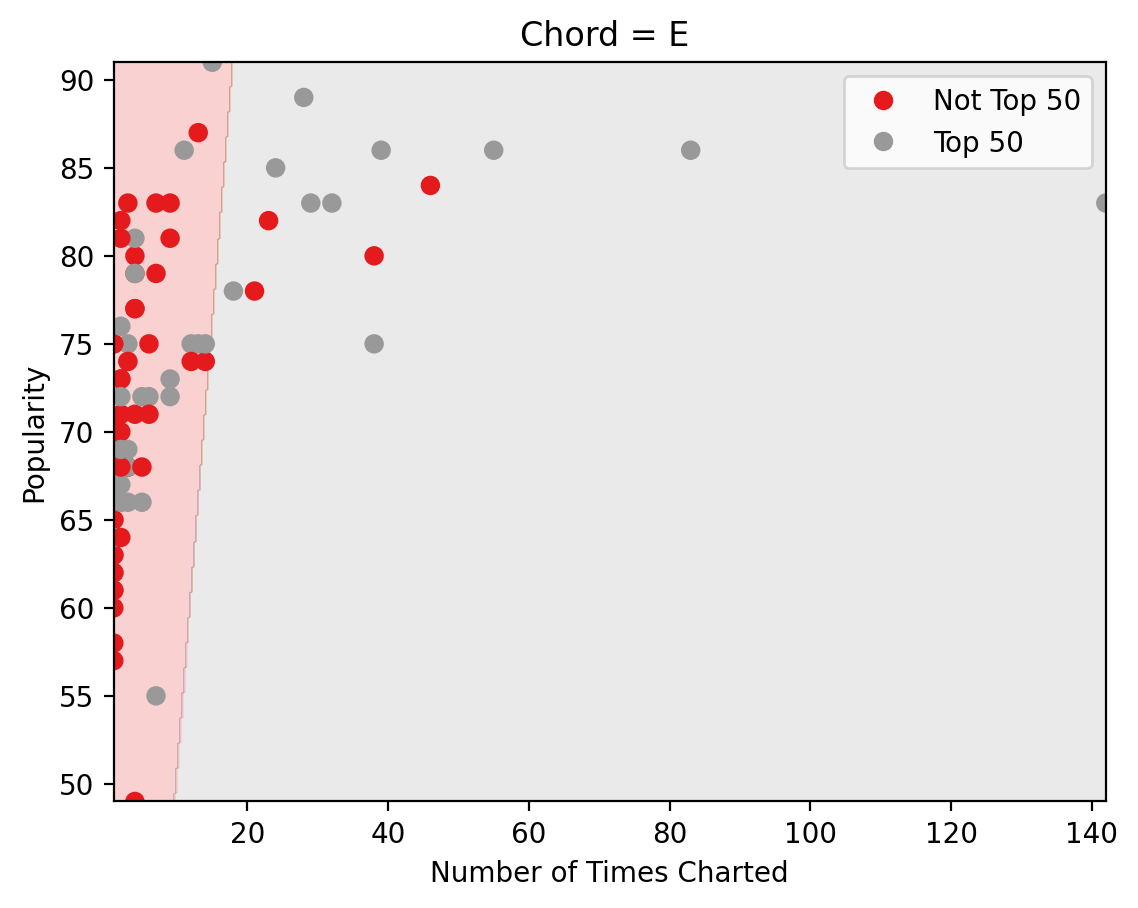

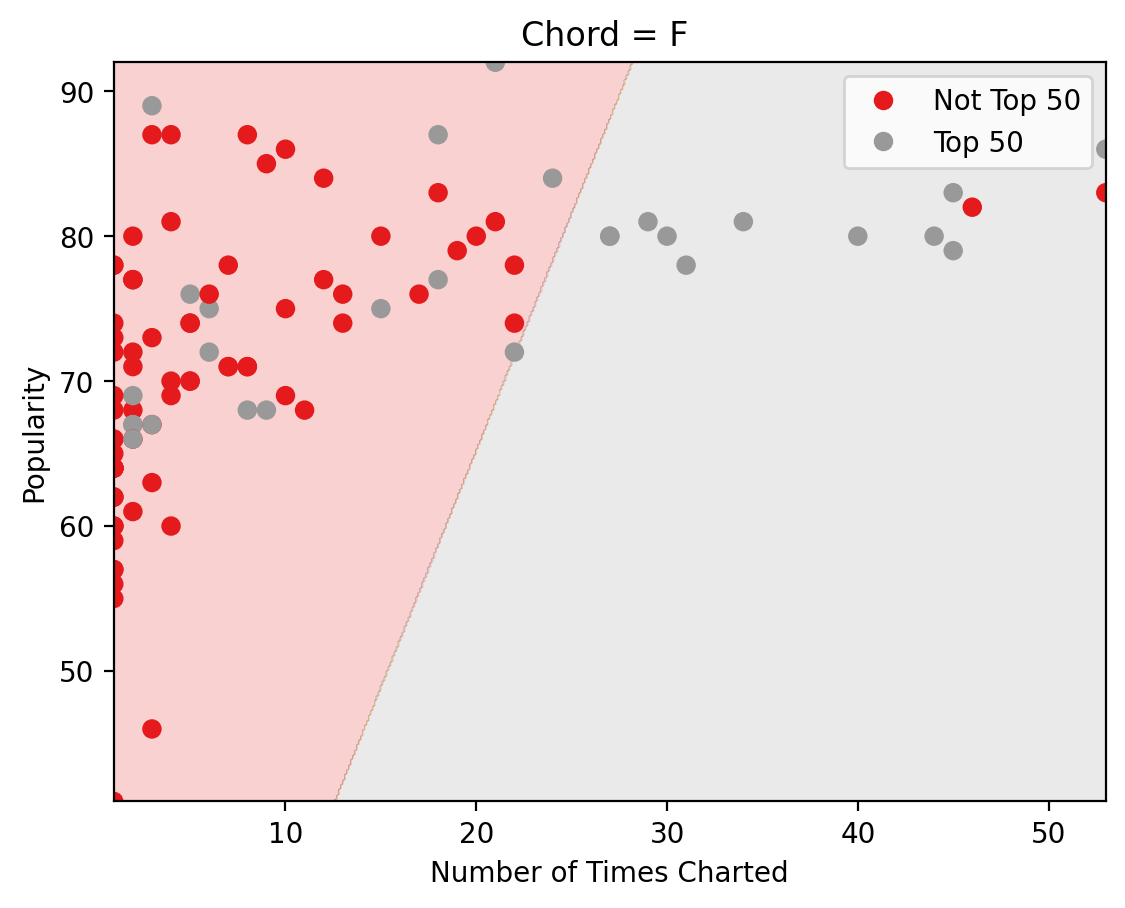

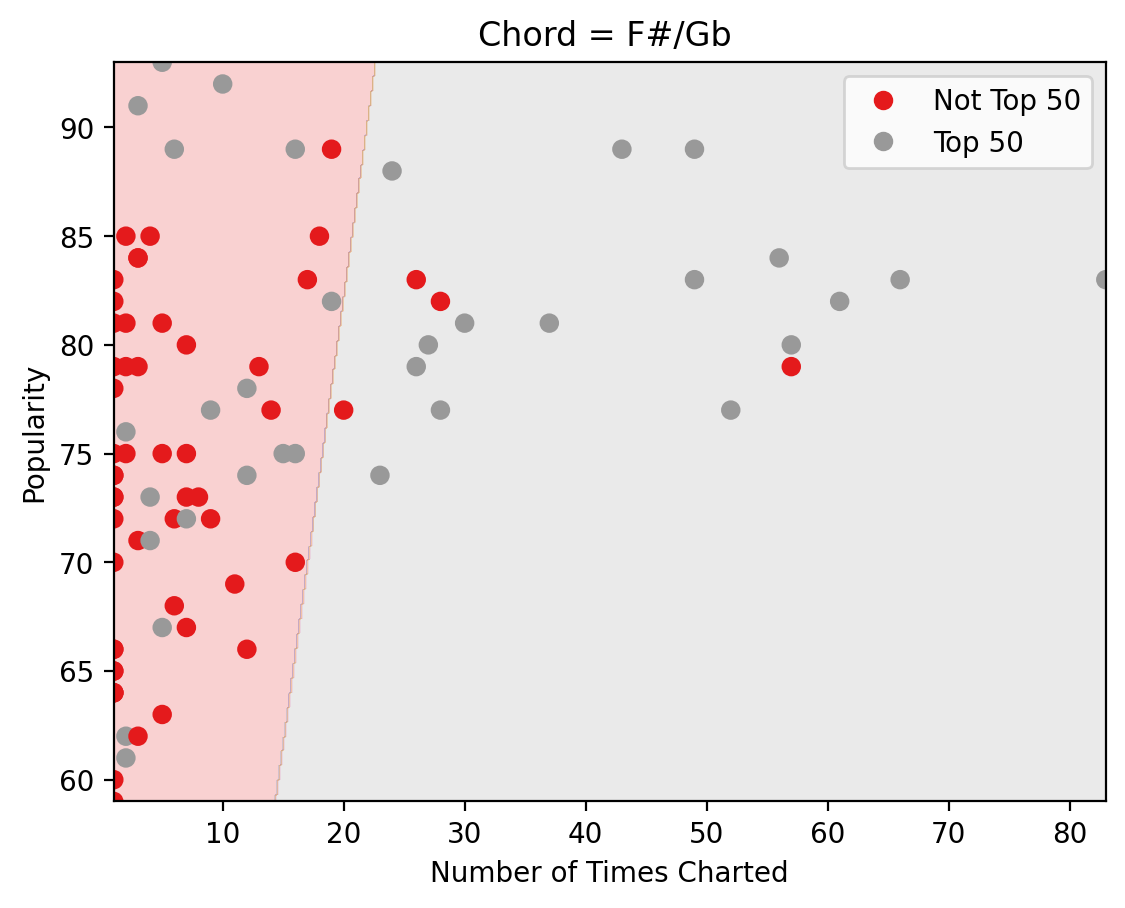

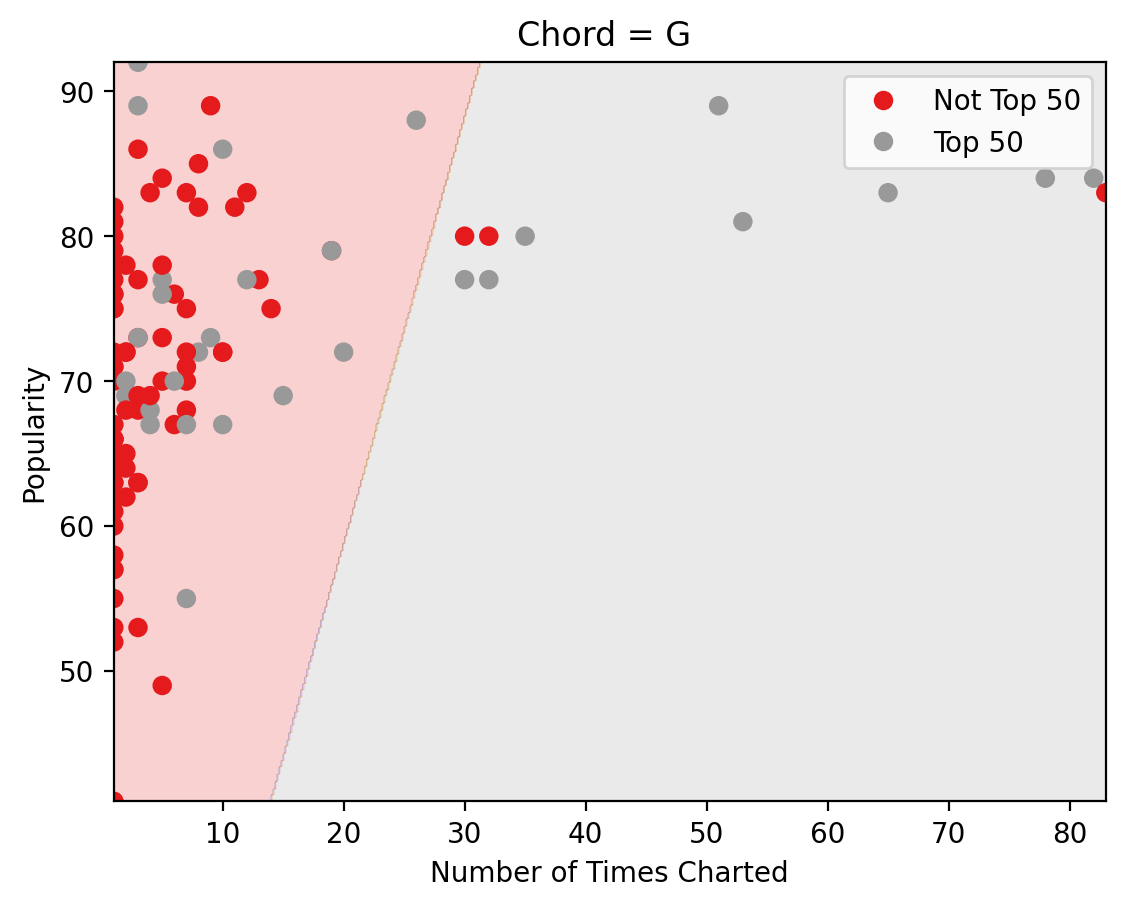

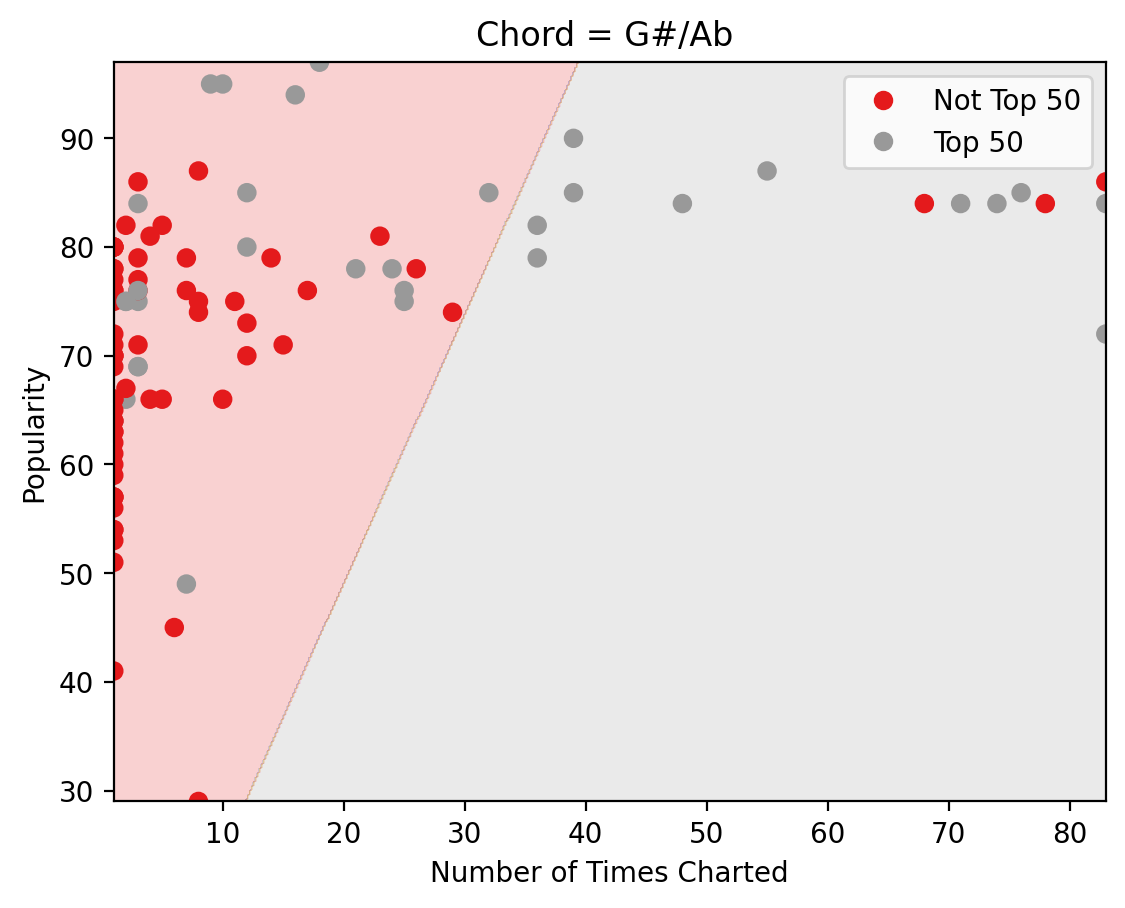

In [47]:
plot_decision_regions(LR, X_train, y_train, 'Number of Times Charted', 'Popularity','Chord')

The logistic regression model achieved an accuracy score of 0.75 on the test data, which means it was able to correctly predict the class label for 75% of the samples in the test set. However, the confusion matrix shows that the model struggled to predict the True class label, as evidenced by a recall score of only 0.27. This indicates that the model is biased towards predicting the False class label and has difficulty identifying samples that belong to the True class.

When we examine the decision regions plotted, it becomes apparent that the model might be overgeneralizing the negative class, leading to the lower recall score for the positive class. This issue is particularly noticeable in the graphs for chords G#, F, and C#. In these graphs, we see that the logistic model calculated the positive class region to be quite small and predominantly restricted to the upper end of the feature space. However, a higher concentration of positive examples actually exists at the lower end.

This example highlights some of the errors in the logistic regression model. Based on our prior data analysis, we know that the 'Number of Times Charted' variable was relatively positively correlated with whether a song was in the top 50. However, in these decision regions, the boundary line not only lacks logical sense (such as with G# where the area for Top 50 is nearly invisible in the right bottom corner) but also fails to accurately predict the boolean.

In summary, the logistic regression model is not well-suited for capturing the complex relationships between the features and the target variable in this dataset. As a result, it should not be used to determine if a sample belongs to the Top 50 category, as it is biased towards predicting negative outcomes.

### Random Forests Model

In [48]:
# define a function to compute the score for Random Forests Model
def score_RFM(cols):
    """
    The funtion compute the score for Random Forests Model.
    
    Args:
        cols: a list of column names to use as features in the Random Forests Model.
    
    Returns:
        A float representing the accuracy score of the Random Forests Model.    
    """
    RF = RandomForestClassifier(n_estimators=100)
    return cross_val_score(RF, X_train[cols], y_train, cv = 5).mean()

In [49]:
# observe Random Forests Model socre
RFM_score = get_cv_score(score_RFM)


Training with columns ['Genre', 'Number of Times Charted', 'Streams'] 
The cv score is 0.775

<class 'numpy.float64'>
Training with columns ['Chord', 'Number of Times Charted', 'Streams'] 
The cv score is 0.774

<class 'numpy.float64'>
Training with columns ['Genre', 'Number of Times Charted', 'Artist Followers'] 
The cv score is 0.795

<class 'numpy.float64'>
Training with columns ['Chord', 'Number of Times Charted', 'Artist Followers'] 
The cv score is 0.757

<class 'numpy.float64'>
Training with columns ['Genre', 'Number of Times Charted', 'Popularity'] 
The cv score is 0.753

<class 'numpy.float64'>
Training with columns ['Chord', 'Number of Times Charted', 'Popularity'] 
The cv score is 0.735

<class 'numpy.float64'>
Training with columns ['Genre', 'Number of Times Charted', 'Danceability'] 
The cv score is 0.737

<class 'numpy.float64'>
Training with columns ['Chord', 'Number of Times Charted', 'Danceability'] 
The cv score is 0.694

<class 'numpy.float64'>
Training with columns 

In [50]:
# obsevre the best score for Forests Model socre
display_best_cols(RFM_score)

The combination with the highest score is ['Genre', 'Number of Times Charted', 'Artist Followers'] with a cv score of 0.795.


Based on the results of the feature selection process using the Random Forests Model, the combination of ['Genre', 'Number of Times Charted', 'Artist Followers'] was found to have the highest score of around 0.79.

The selection of these features was based on the exploratory data analysis performed on the dataset, which showed that these features have a relatively strong correlation with the target variable (Hit or Flop).

Therefore, based on the results of the feature selection process and the exploratory data analysis, the combination of ['Genre', 'Number of Times Charted', 'Artist Followers'] was chosen as the most promising set of features to use for the Random Forests Model.

### Cross-validation to choose complexity parameters (max_depth, n_estimators)


##### Part 1: max_depth Selection

Best max depth is 6 with a cv of 0.8066666666666666


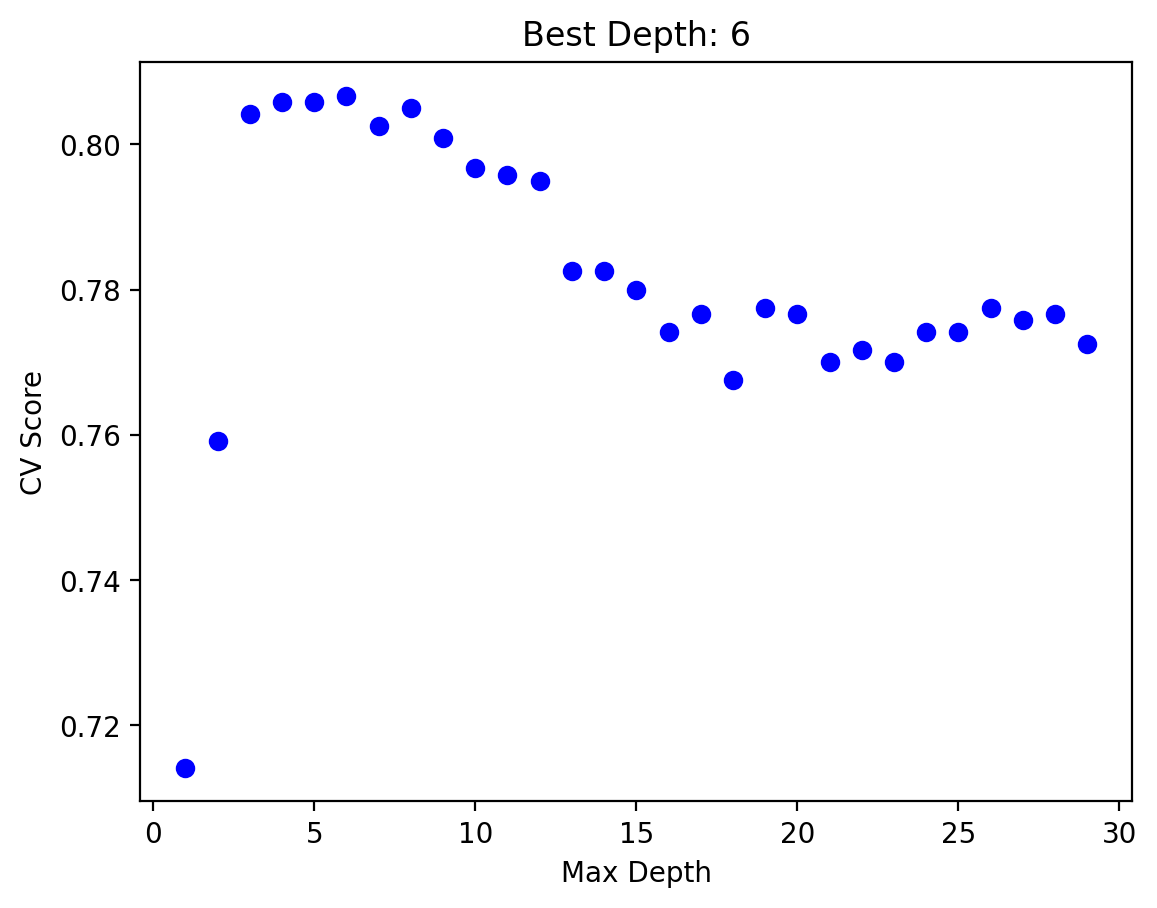

In [51]:
# Create figure and axes
fig, ax = plt.subplots(1)

# Create "best" variables
best_max_depth = 0
best_max_depth_cv = 0
best_combinations_RF = ['Genre', 'Number of Times Charted', 'Streams']

# Run cv function for max_depth selection from 1 to 30
for i in range(1,30):
    RF = RandomForestClassifier(n_estimators = 100 , max_depth = i)
    cv = cross_val_score(RF, X_train[best_combinations_RF], y_train, cv = 5).mean()
    
    # Create scatter plot to visualize results
    ax.scatter(i, cv, color = 'blue')
    
    # Determine best max_depth and its corresponding cv
    if cv > best_max_depth_cv:
        best_max_depth_cv = cv
        best_max_depth = i

# Printing best max_depth and its corresponding cv
print(f"Best max depth is {best_max_depth} with a cv of {best_max_depth_cv}")

# Label scatterplot
l = ax.set(title = "Best Depth: " + str(best_max_depth), xlabel = "Max Depth", ylabel = "CV Score")
    

##### Part 2: n_estimator Selection

Best n_estimator is 61 with a cv of 0.7808333333333334


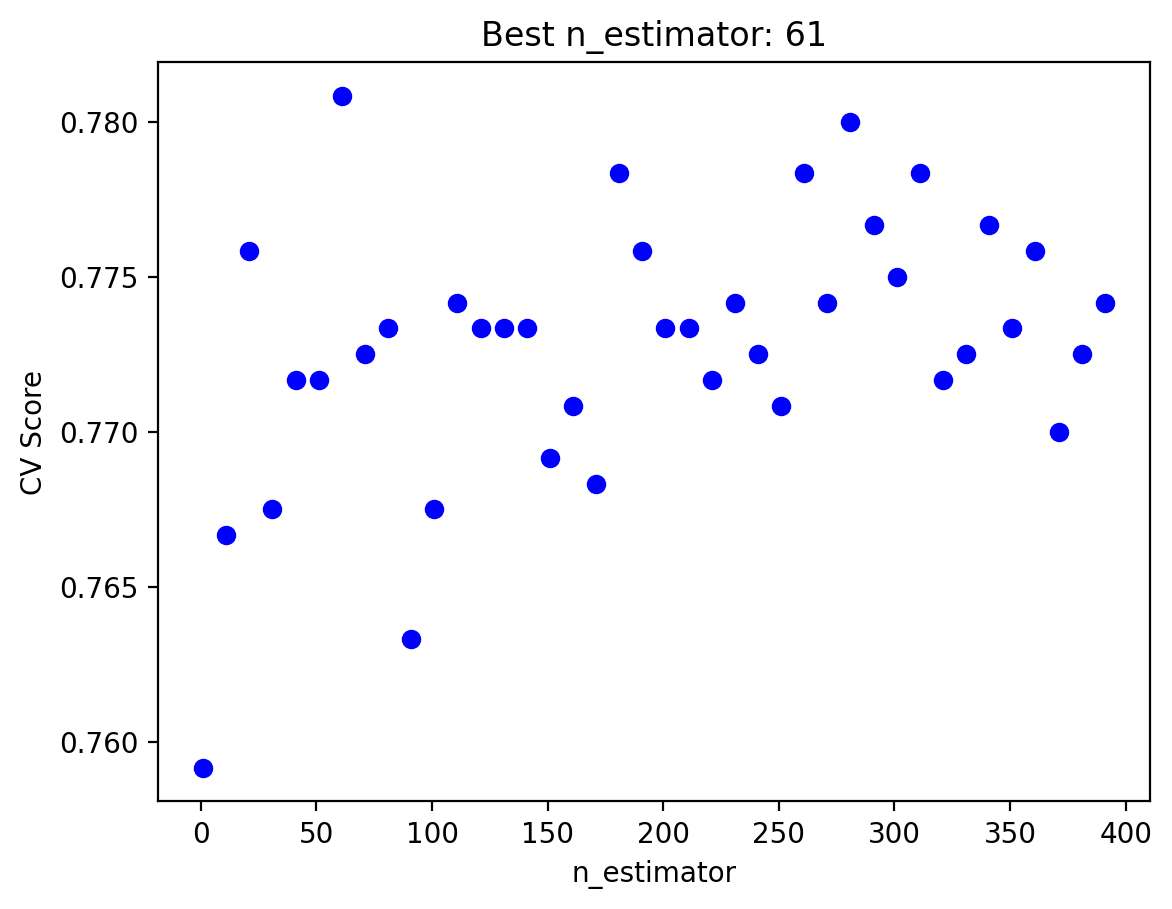

In [52]:
# Create figure and axes
fig, ax = plt.subplots(1)

# Create "best" variables
best_n_estimators = 0
best_n_estimators_cv = 0
best_combinations_RF = ['Genre', 'Number of Times Charted', 'Streams']

for i in range(1,400,10):
    RF = RandomForestClassifier(n_estimators = i)
    cv = cross_val_score(RF, X_train[best_combinations_RF], y_train, cv = 5).mean()
    
    # Create scatter plot to visualize results
    ax.scatter(i, cv, color = 'blue')
    
    # Determine best max_depth and its corresponding cv
    if cv > best_n_estimators_cv:
        best_n_estimators_cv = cv
        best_n_estimators = i

# Printing best max_depth and its corresponding cv
print(f"Best n_estimator is {best_n_estimators} with a cv of {best_n_estimators_cv}")

# Label scatterplot
l = ax.set(title = "Best n_estimator: " + str(best_n_estimators), xlabel = "n_estimator", ylabel = "CV Score")
    

However, we observed that if we recalculated n_estimator, based on the max_depth score that we calculated in the previous step, we can get a n_estimator score that ultimately results in a higher cv that we can use for our random forest, which is why we decided that we should not tune max_depth and n_estimators separately because they result in a lower score (i.e. we evaluate max_depth and then hold it constant to evaluate n_estimators as shown instead below)

Best n_estimator is 281 with a cv of 0.8099999999999999


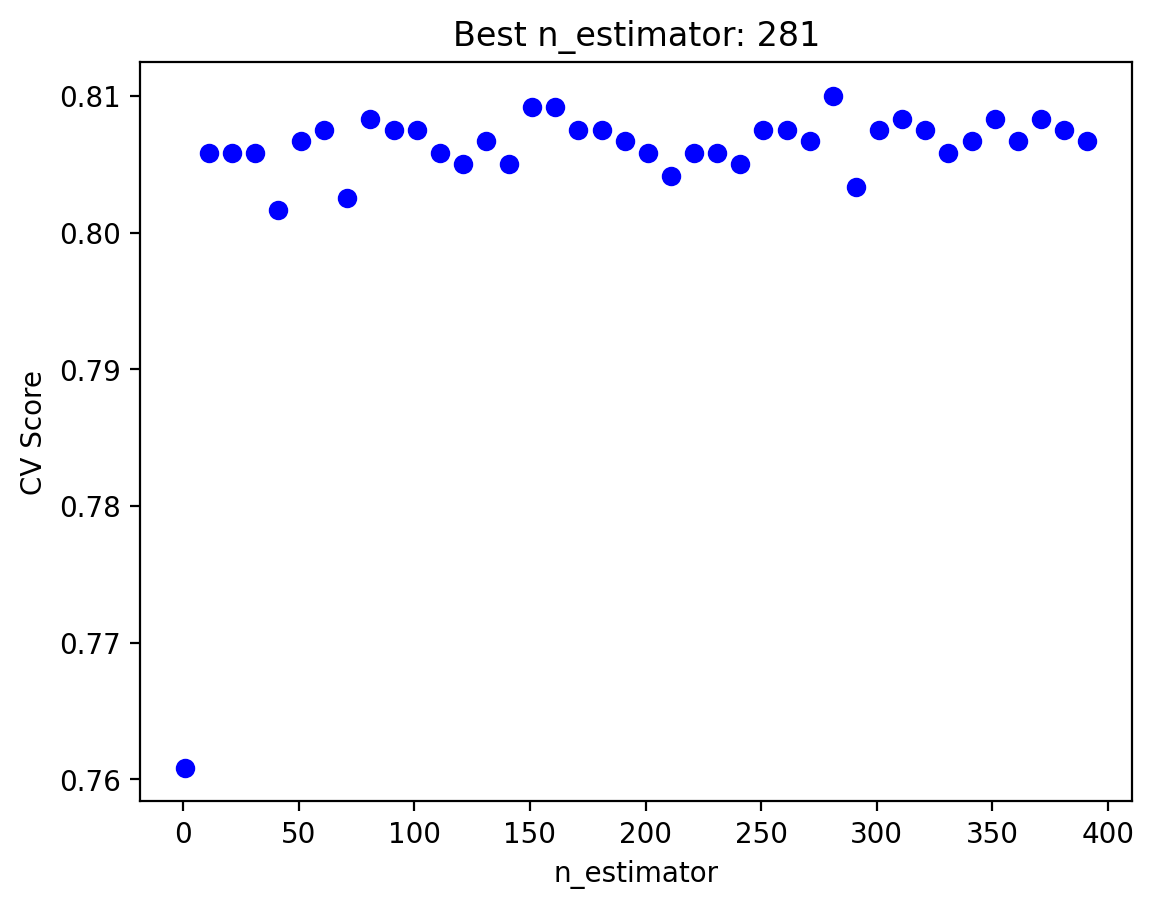

In [53]:
# Create figure and axes
fig, ax = plt.subplots(1)

# Create "best" variables
best_n_estimators = 0
best_n_estimators_cv = 0
best_combinations_RF = ['Genre', 'Number of Times Charted', 'Streams']

for i in range(1,400,10):
    RF = RandomForestClassifier(n_estimators = i, max_depth = best_max_depth)
    cv = cross_val_score(RF, X_train[best_combinations_RF], y_train, cv = 5).mean()
    
    # Create scatter plot to visualize results
    ax.scatter(i, cv, color = 'blue')
    
    # Determine best max_depth and its corresponding cv
    if cv > best_n_estimators_cv:
        best_n_estimators_cv = cv
        best_n_estimators = i

# Printing best max_depth and its corresponding cv
print(f"Best n_estimator is {best_n_estimators} with a cv of {best_n_estimators_cv}")

# Label scatterplot
l = ax.set(title = "Best n_estimator: " + str(best_n_estimators), xlabel = "n_estimator", ylabel = "CV Score")
    

In [54]:
# create Random Forest model with best parameters for our data sets
RF = RandomForestClassifier(n_estimators = best_n_estimators, max_depth = best_max_depth)

# fit the model
RF.fit(X_train[best_combinations_RF], y_train)

#display the model score 
rf_train_score = RF.score(X_train[best_combinations_RF], y_train)

rf_test_score = RF.score(X_test[best_combinations_RF], y_test)

print(f"RF CV Score: = {best_n_estimators_cv}")
print(f"RF Train Score: = {rf_train_score}")
print(f"RF Test Score: = {rf_test_score}")


RF CV Score: = 0.8099999999999999
RF Train Score: = 0.8325
RF Test Score: = 0.8433333333333334


In [55]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

# Define the hyperparameter grid
param_dist = {
    'n_estimators': np.arange(1, 1001, 10),
    'max_depth': np.arange(1, 101, 10)
}

# Instantiate a Random Forests Model with the desired settings
RF = RandomForestClassifier()

# Instantiate the RandomizedSearchCV object with the Random Forest model, hyperparameter grid, and number of iterations
random_search = RandomizedSearchCV(RF, param_distributions=param_dist, n_iter=50, cv=5, random_state=42)

# Fit the RandomizedSearchCV object to the training data, optimizing for the specified metrics
random_search.fit(X_train[['Genre', 'Number of Times Charted', 'Streams']], y_train)

# Print the best hyperparameters found by RandomizedSearchCV
print(random_search.best_params_)


{'n_estimators': 361, 'max_depth': 11}


In [56]:
best_combinations_RF = ['Genre', 'Number of Times Charted', 'Streams']
RF = RandomForestClassifier(n_estimators = random_search.best_params_['n_estimators'] , max_depth = random_search.best_params_['max_depth'])
best_score_RF = cross_val_score(RF, X_train[best_combinations_RF], y_train, cv = 5).mean()

print(f"The cv score of parameters {random_search.best_params_} and combinations {best_combinations_RF} is {best_score_RF}.")

The cv score of parameters {'n_estimators': 361, 'max_depth': 11} and combinations ['Genre', 'Number of Times Charted', 'Streams'] is 0.7949999999999999.


### Apply the best combination into test set of Random Forest model

In [57]:
# create Random Forest model with best parameters for our data sets
RF = RandomForestClassifier(n_estimators = random_search.best_params_['n_estimators'], max_depth = random_search.best_params_['max_depth'])

# fit the model
RF.fit(X_train[best_combinations_RF], y_train)

#display the model score 
rf_train_score = RF.score(X_train[best_combinations_RF], y_train)

rf_test_score = RF.score(X_test[best_combinations_RF], y_test)

print(f"RF CV Score: = {best_score_RF}")
print(f"RF Train Score: = {rf_train_score}")
print(f"RF Test Score: = {rf_test_score}")

RF CV Score: = 0.7949999999999999
RF Train Score: = 0.9325
RF Test Score: = 0.8366666666666667


              precision    recall  f1-score   support

       False       0.85      0.93      0.89       209
        True       0.80      0.62      0.70        91

    accuracy                           0.84       300
   macro avg       0.82      0.77      0.79       300
weighted avg       0.83      0.84      0.83       300



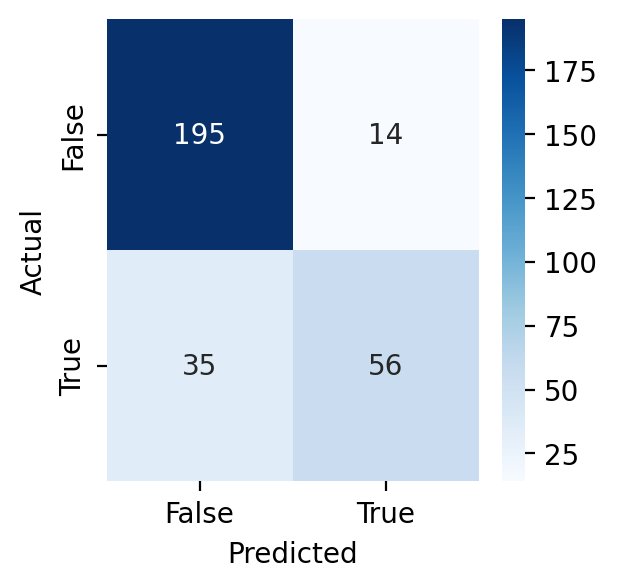

In [58]:
from sklearn.metrics import classification_report
y_pred = RF.predict (X_test[best_combinations_RF])

report = classification_report(y_test, y_pred)
print(report)
confusion_mat = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames= ['Predicted'])
plt.figure (figsize=(3, 3), dpi=100)
sns.heatmap(confusion_mat, annot=True, cmap='Blues', fmt='g')
plt.show()

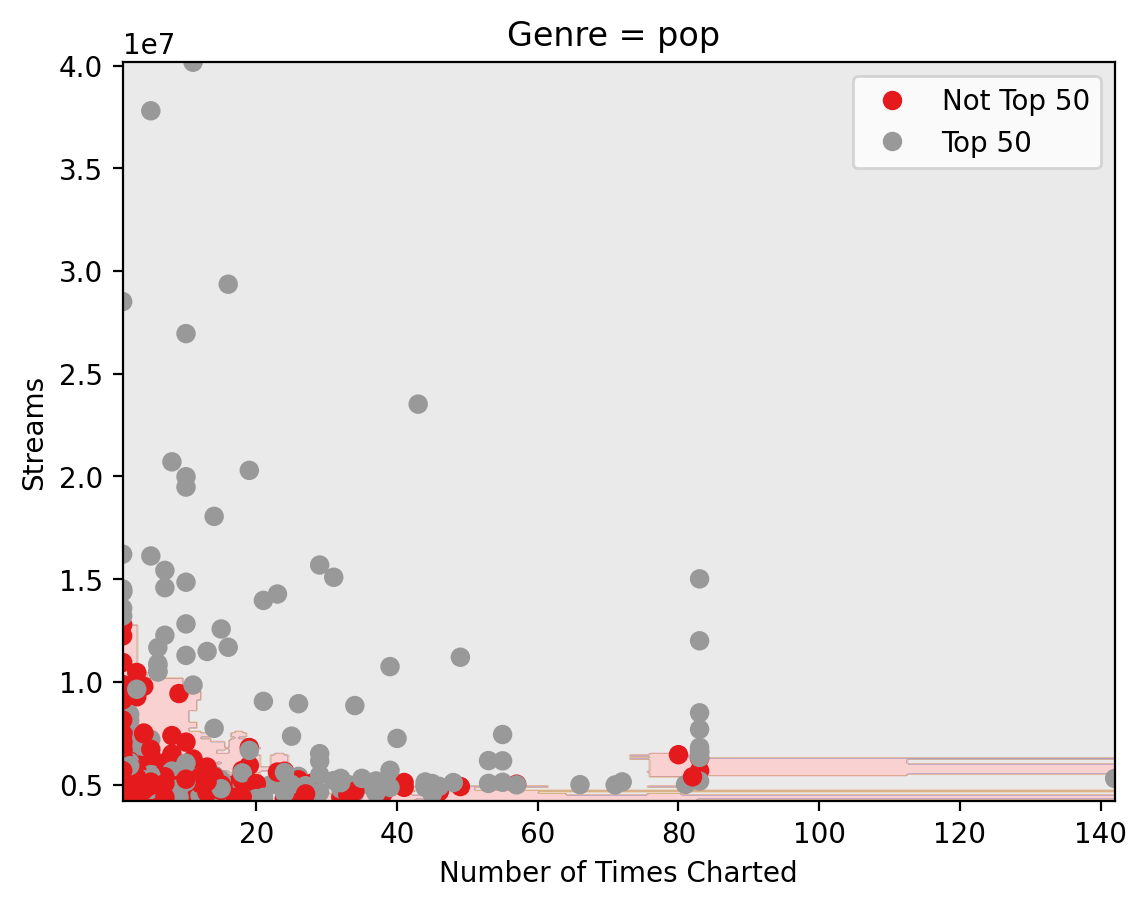

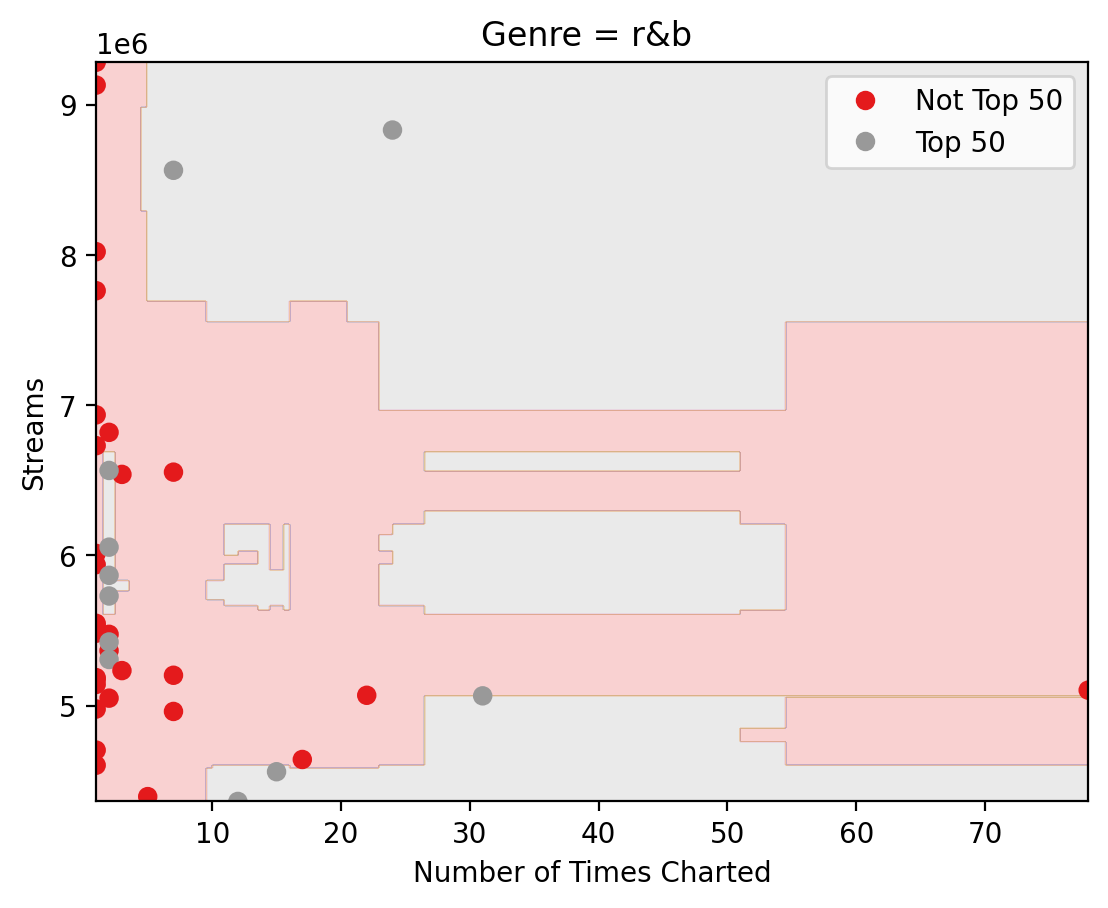

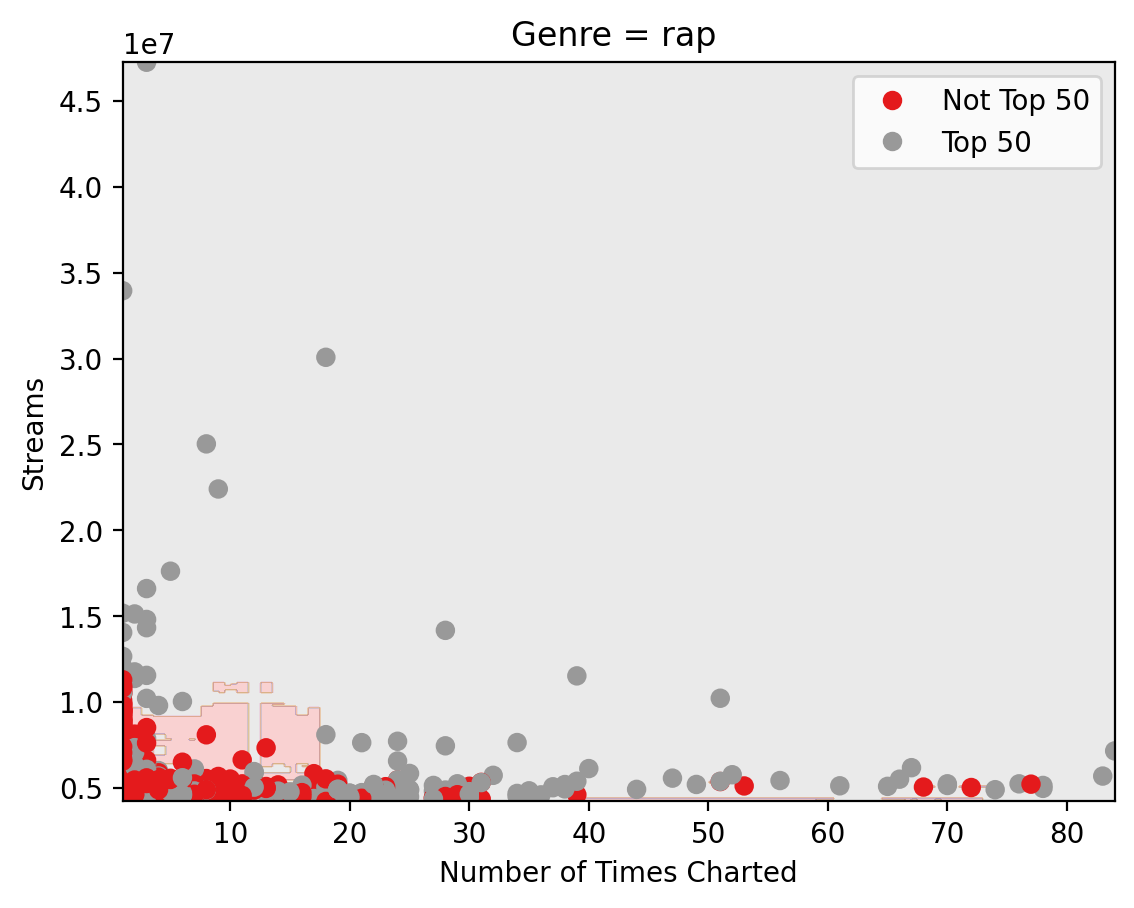

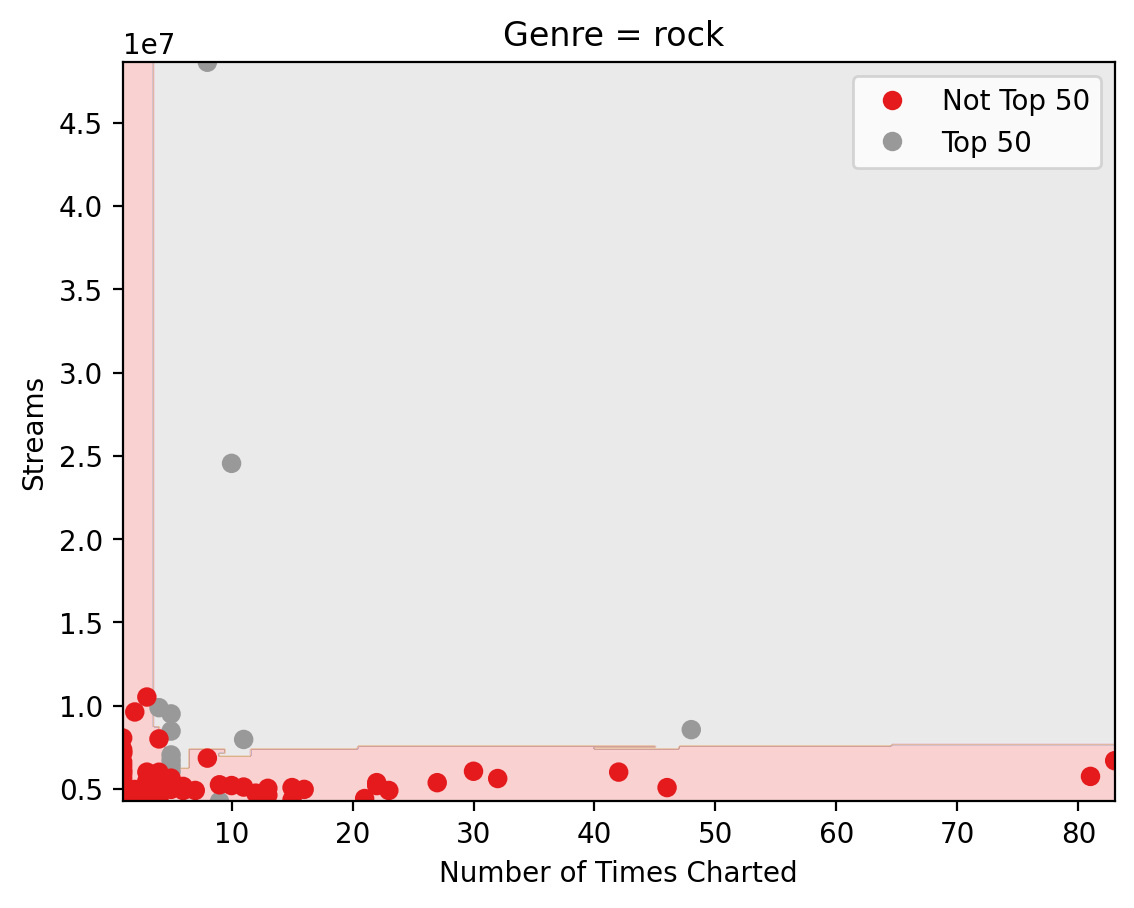

In [59]:
plot_decision_regions(RF, X_train, y_train, 'Number of Times Charted', 'Streams', 'Genre')

**Analysis**

The Random Forest (RF) model exhibits high accuracy on the training data with a score of 0.9308, which means it correctly classified 93.08% of the samples. However, the model's performance on the test data is slightly lower, with an accuracy of 0.8267 (82.67%). The difference between the train and test scores may suggest overfitting, where the model captures noise in the data instead of the true underlying patterns.
The decision regions, particularly for rap and pop genres, appear to be very rigid and specific, which further indicates overfitting. In contrast, the decision regions for rock and R&B genres, which have fewer positive data points, are less specific and more flexible.
The hyper-specific and rigidly defined regions of the decision plot might lead to poor performance on larger datasets, as the model could struggle to generalize patterns beyond the specific values it was trained on. For example, while the features of streams and times charted may be good indicators of whether a song is in the Top 50, relying on the exact combination of stream and chart count as a reliable indicator of a song's success may be overly simplistic. Additionally, the boundaries in the decision plot may not be applicable outside of this specific dataset, especially in cases where the model has captured noise in the data rather than true patterns.
In conclusion, while the RF model performed exceptionally well on the training data, it is important to be cautious when applying it to larger and more diverse datasets. The model's hyper-specific decision regions and potential overfitting could limit its ability to generalize patterns beyond the specific values it was trained on.

### K-Nearest Neighbours (KNN) Models

In [60]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

              precision    recall  f1-score   support

       False       0.77      0.78      0.77       209
        True       0.48      0.47      0.48        91

    accuracy                           0.68       300
   macro avg       0.62      0.62      0.62       300
weighted avg       0.68      0.68      0.68       300



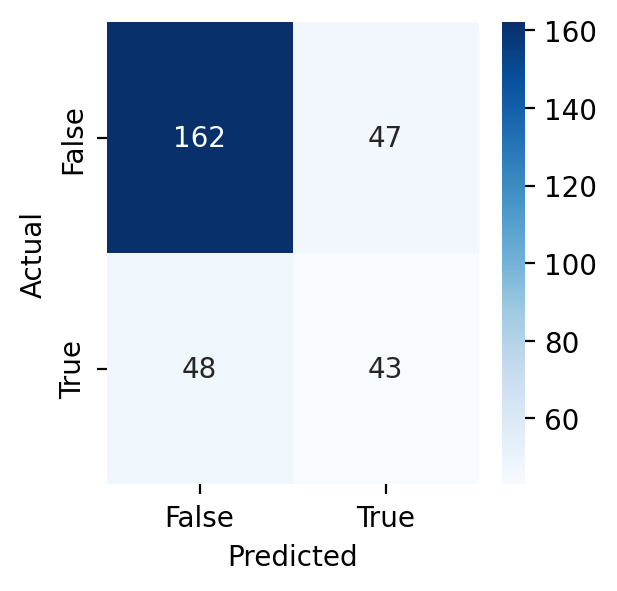

In [61]:
from sklearn.metrics import classification_report
y_pred = knn.predict(X_test)
report = classification_report(y_test, y_pred)
print(report)

confusion_mat = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
plt.figure(figsize=(3, 3), dpi=100)
sns.heatmap(confusion_mat, annot=True, cmap='Blues', fmt='g')
plt.show()

Text(0.5, 1.0, 'Best K Value: 16')

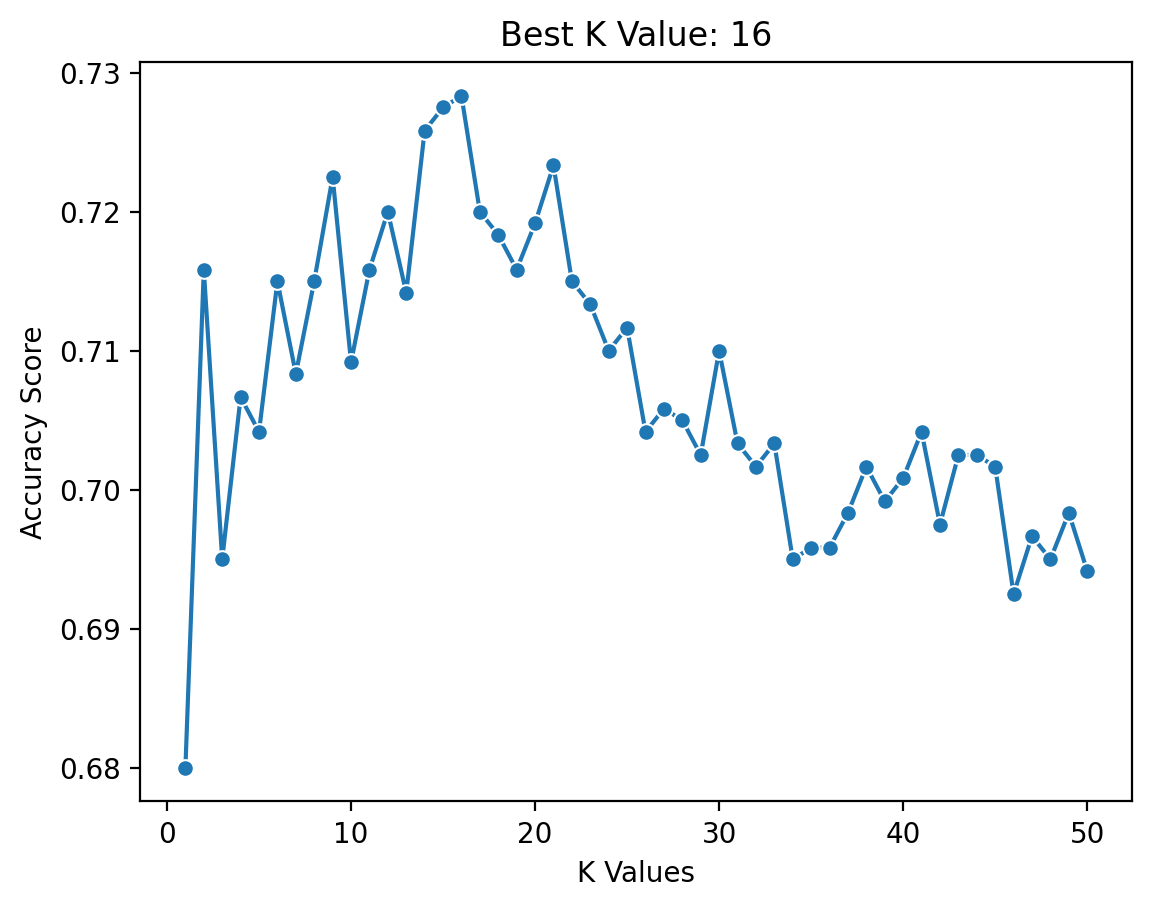

In [62]:
k_values = [i for i in range (1,51)]
scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X_train, y_train, cv=5)
    scores.append(np.mean(score))
    
best_k = k_values[np.argmax(scores)]
best_k
    
sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")
plt.title(f"Best K Value: {best_k}")


In [63]:
# define a function to compute the score for KNN
def score_KNN(cols):
    """
    The funtion compute the score for Random Forests Model.
    
    Args:
        cols: a list of column names to use as features in the Random Forests Model.
    
    Returns:
        A float representing the accuracy score of the Random Forests Model.    
    """
    knn = KNeighborsClassifier(n_neighbors = best_k)

    return cross_val_score(knn, X_train[cols], y_train, cv=5).mean()

In [64]:
KNN_score = get_cv_score(score_KNN)

Training with columns ['Genre', 'Number of Times Charted', 'Streams'] 
The cv score is 0.709

<class 'numpy.float64'>
Training with columns ['Chord', 'Number of Times Charted', 'Streams'] 
The cv score is 0.709

<class 'numpy.float64'>
Training with columns ['Genre', 'Number of Times Charted', 'Artist Followers'] 
The cv score is 0.707

<class 'numpy.float64'>
Training with columns ['Chord', 'Number of Times Charted', 'Artist Followers'] 
The cv score is 0.7

<class 'numpy.float64'>
Training with columns ['Genre', 'Number of Times Charted', 'Popularity'] 
The cv score is 0.784

<class 'numpy.float64'>
Training with columns ['Chord', 'Number of Times Charted', 'Popularity'] 
The cv score is 0.783

<class 'numpy.float64'>
Training with columns ['Genre', 'Number of Times Charted', 'Danceability'] 
The cv score is 0.753

<class 'numpy.float64'>
Training with columns ['Chord', 'Number of Times Charted', 'Danceability'] 
The cv score is 0.757

<class 'numpy.float64'>
Training with columns ['

In [65]:
display_best_cols(KNN_score)

The combination with the highest score is ['Genre', 'Number of Times Charted', 'Popularity'] with a cv score of 0.784.


In [66]:
best_combinations_KNN = ['Genre', 'Number of Times Charted', 'Popularity']

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = X_train.copy()[best_combinations_KNN]

X_test_scaled = X_test.copy()[best_combinations_KNN]

In [67]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 16)
knn.fit(X_train_scaled, y_train)

#display the model score 
knn_train_score = knn.score(X_train_scaled, y_train)
knn_test_score = knn.score(X_test_scaled, y_test)

print(f"KNN Train Score: = {knn_train_score}")
print(f"KNN Test Score: = {knn_test_score}")


KNN Train Score: = 0.8008333333333333
KNN Test Score: = 0.7833333333333333


              precision    recall  f1-score   support

       False       0.81      0.91      0.85       209
        True       0.70      0.49      0.58        91

    accuracy                           0.78       300
   macro avg       0.75      0.70      0.72       300
weighted avg       0.77      0.78      0.77       300



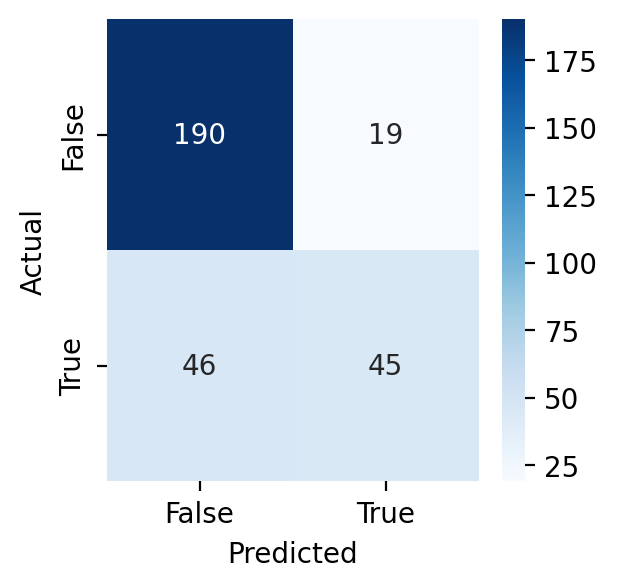

In [68]:
from sklearn.metrics import classification_report
y_pred = knn.predict(X_test_scaled)
report = classification_report(y_test, y_pred)
print(report)

confusion_mat = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
plt.figure(figsize=(3, 3), dpi=100)
sns.heatmap(confusion_mat, annot=True, cmap='Blues', fmt='g')
plt.show()

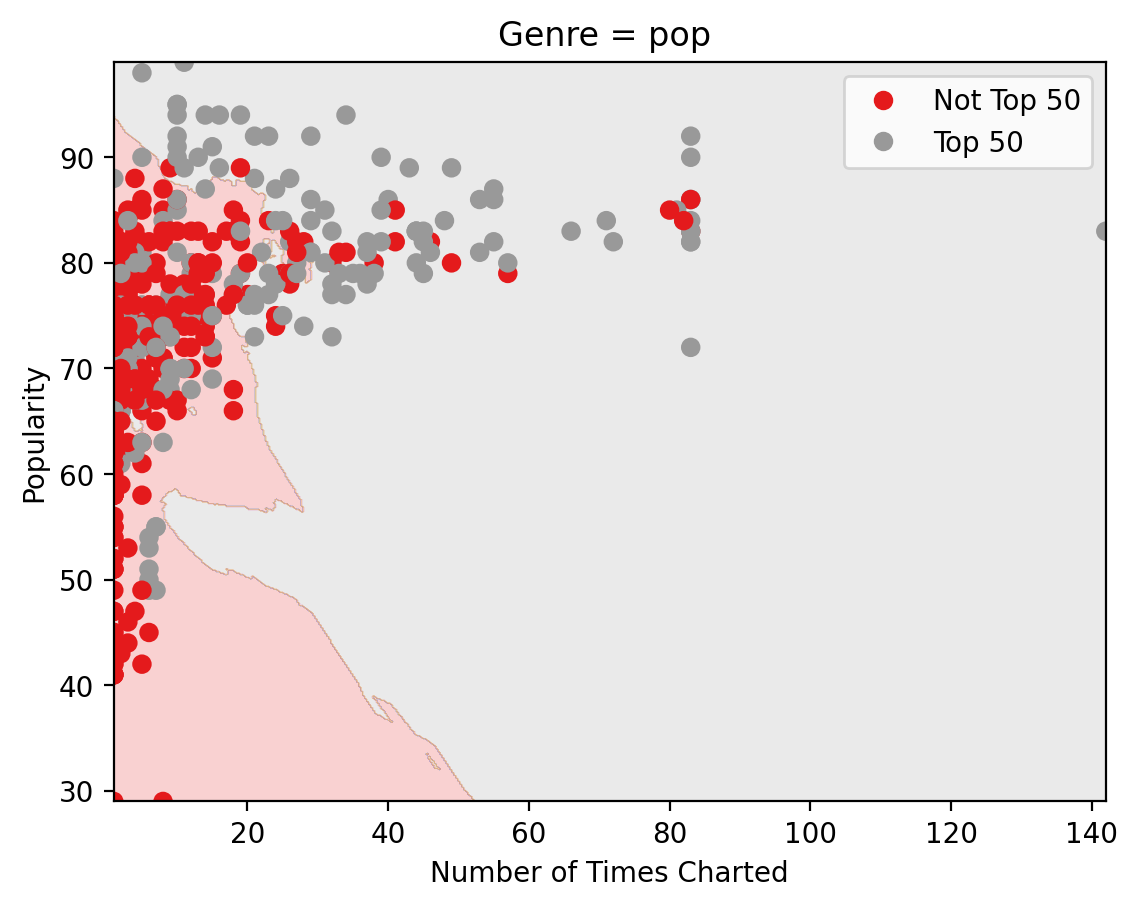

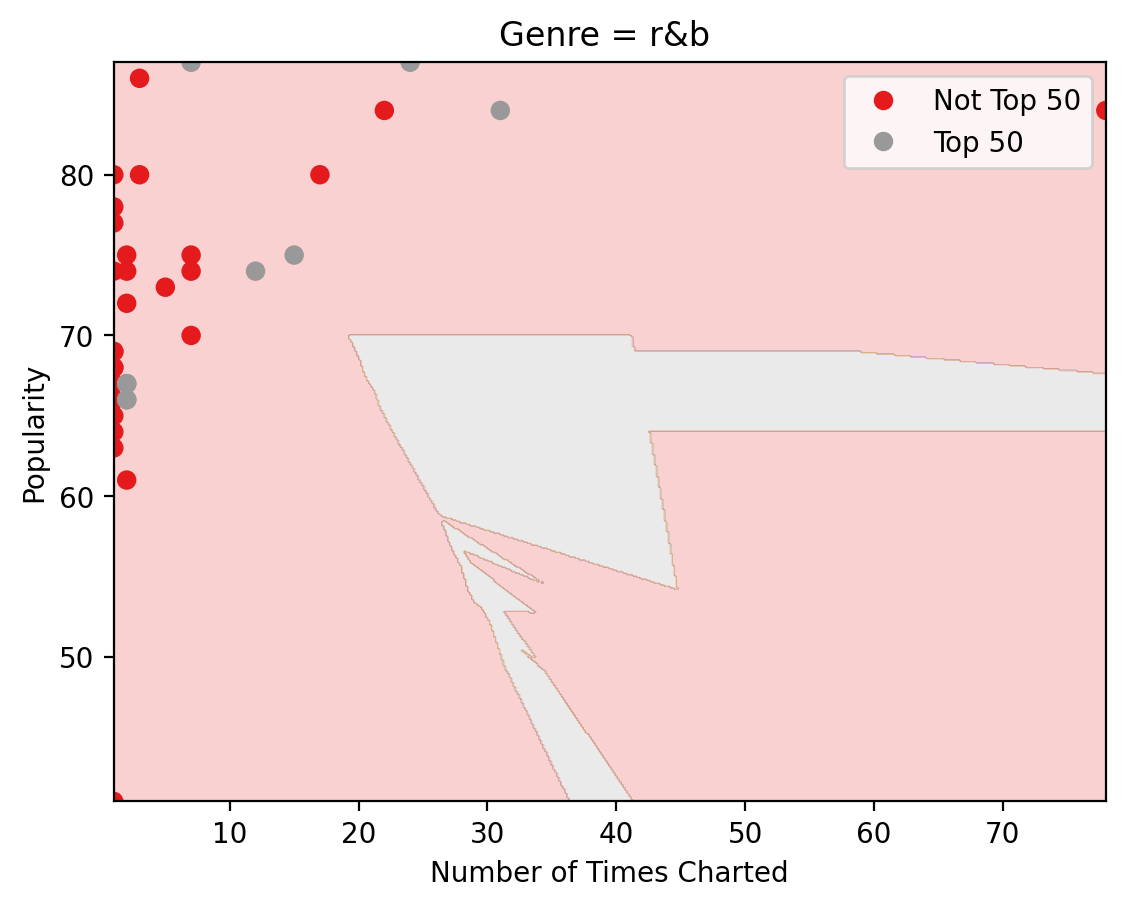

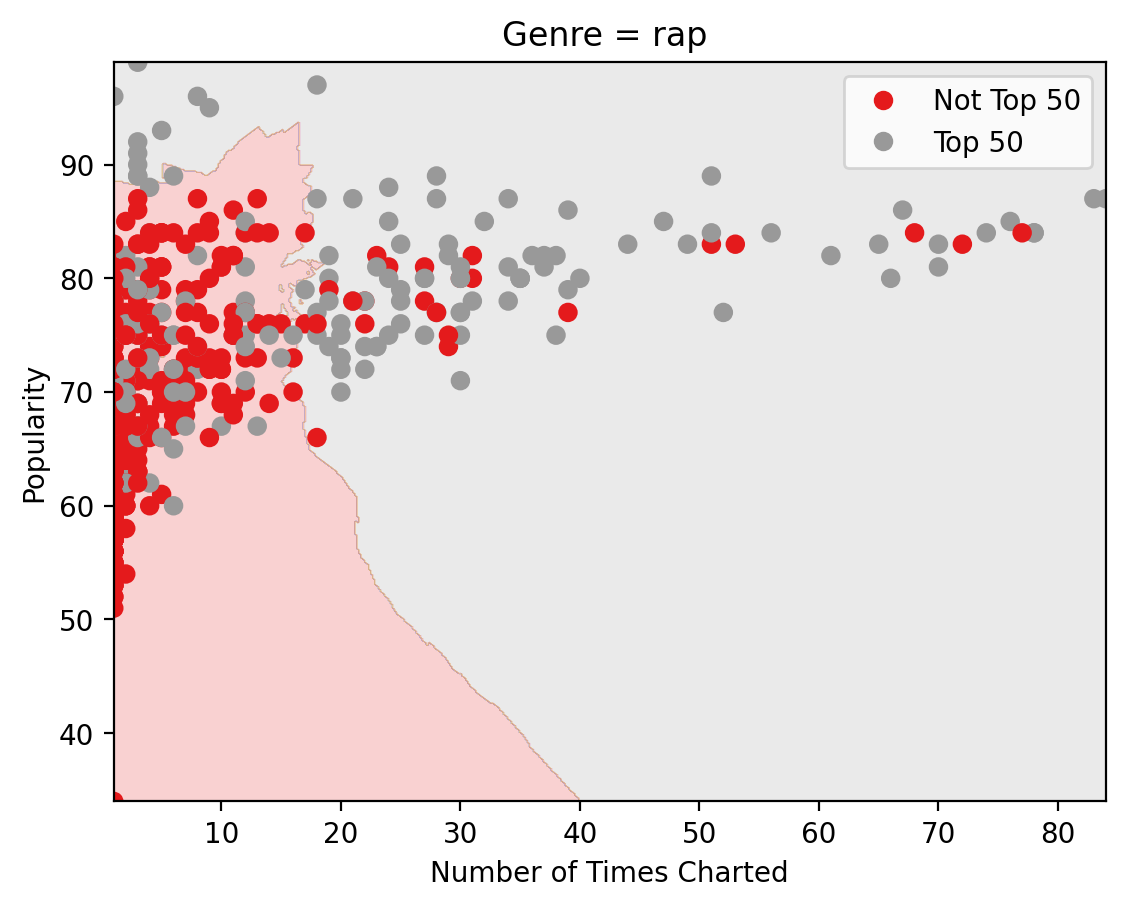

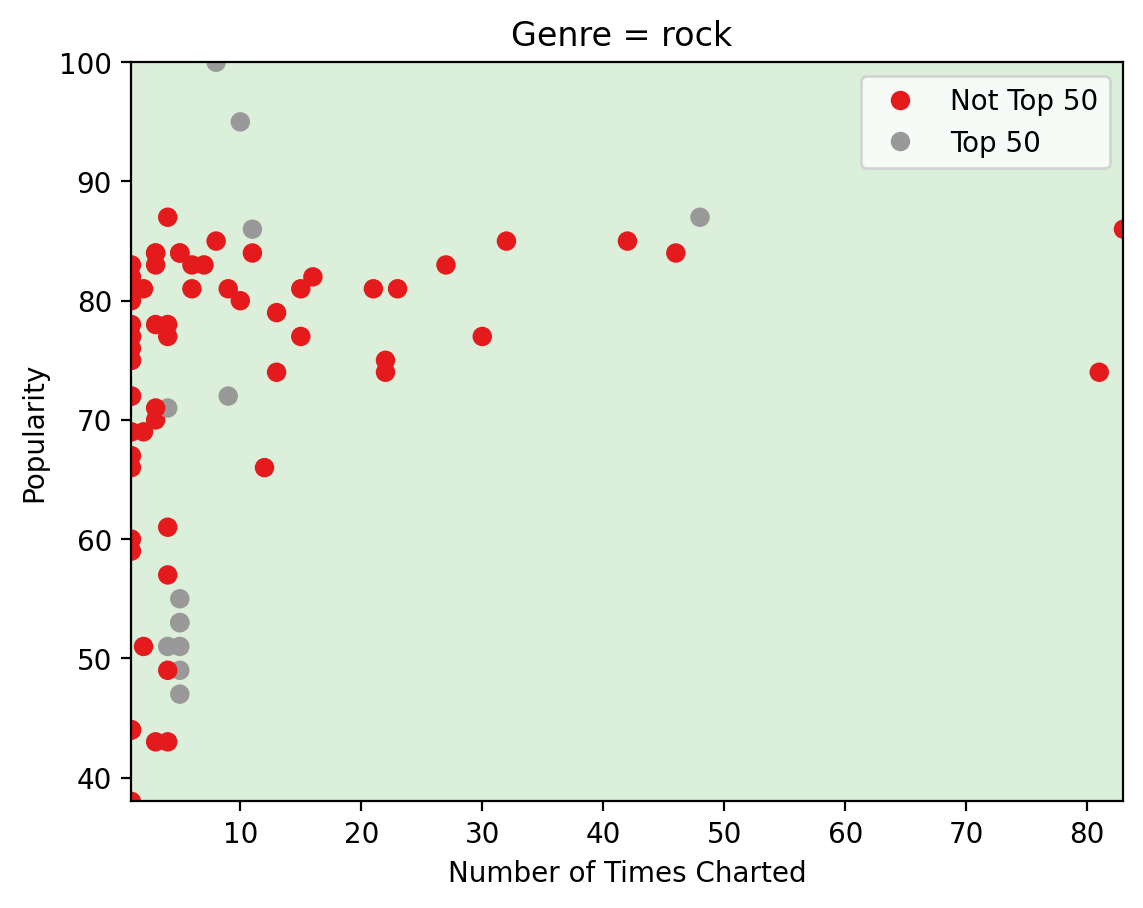

In [69]:
plot_decision_regions(knn, X_train_scaled, y_train, 'Number of Times Charted', 'Popularity', 'Genre')

**Analysis**

The K-Nearest Neighbors (KNN) model achieved a moderate accuracy of 78% on the testing data. The confusion matrix shows that the model had a precision of 81% and recall of 91% for the False category, indicating that it correctly classified the majority of the non-Top 50 songs. However, the model had a precision of only 70% and recall of 49% for the True category, which represents the Top 50 songs. This indicates that the model still struggled to correctly classify the positive cases. 

Looking at the decision regions for the KNN model in the rock and R&B genres, we can observe that the regions are either oddly shaped or do not create any boundaries at all. 
Specifically look at the sample sizes, although R&B has a lower sample size, it has a higher proportion of True for If Top 50 (13/37). In comparison to rock which only had 16/81 in the Top 50, this is seen in the data from Table 1, Visualization 2. The very few positive data points in these genres, makes it difficult for the model to generalize patterns beyond the specific values it was trained on. As a result, the model may have struggled to define specific decision boundaries in these genres, leading to odd shapes or the absence of boundaries altogether. 

The Not Top 50 regions in rap and pop have diagonal lines that differ from the linear regression. However, these decision boundaries make sense in the context of how the categories work together to predict if a song made it into the Top 50. As previously mentioned, we know that a high number of streams and times charted make it more likely that a song will be in the Top 50.

In the case of rap and pop, we can see that there is a diagonal line that divides the Not Top 50 region, which is likely capturing an interaction between streams and number of times charted. Specifically, it appears that when a song has a high number of streams, it is more likely to be in the Top 50, regardless of the number of times it has been charted. However, when a song has a lower number of streams, it becomes increasingly important to have been charted more frequently to be in the Top 50.

### C-Support Vector Classification（SVM)

In [70]:
# define a function to compute the score for Support Vector Classification model(svm model)
from sklearn import svm

def score_SVM(cols):
    """
    The funtion compute the score for svm model.
    
    Args:
        cols: a list of column names to use as features in the svm model.
    
    Returns:
        A float representing the accuracy score of the svm model.
    """
    svc = svm.SVC()
#     svc.fit(X_train[cols],y_train)
    return cross_val_score(svc, X_train[cols], y_train, cv = 10).mean()

In [71]:
# observe svm model socre
SVM_score = get_cv_score(score_SVM)

Training with columns ['Genre', 'Number of Times Charted', 'Streams'] 
The cv score is 0.719

<class 'numpy.float64'>
Training with columns ['Chord', 'Number of Times Charted', 'Streams'] 
The cv score is 0.719

<class 'numpy.float64'>
Training with columns ['Genre', 'Number of Times Charted', 'Artist Followers'] 
The cv score is 0.676

<class 'numpy.float64'>
Training with columns ['Chord', 'Number of Times Charted', 'Artist Followers'] 
The cv score is 0.675

<class 'numpy.float64'>
Training with columns ['Genre', 'Number of Times Charted', 'Popularity'] 
The cv score is 0.754

<class 'numpy.float64'>
Training with columns ['Chord', 'Number of Times Charted', 'Popularity'] 
The cv score is 0.754

<class 'numpy.float64'>
Training with columns ['Genre', 'Number of Times Charted', 'Danceability'] 
The cv score is 0.76

<class 'numpy.float64'>
Training with columns ['Chord', 'Number of Times Charted', 'Danceability'] 
The cv score is 0.759

<class 'numpy.float64'>
Training with columns [

In [72]:
display_best_cols(SVM_score)

The combination with the highest score is ['Genre', 'Number of Times Charted', 'Loudness'] with a cv score of 0.762.


After conducting a thorough analysis, the combination of features that yielded the highest cross-validation score around of 0.719 includes ['Chord', 'Number of Times Charted', and 'Loudness']. This selection of features aligns with the requirements of utilizing one qualitative feature and two quantitative features for our models.

We can create models that accurately represent the interaction between qualitative and quantitative aspects that influence a song's success by using this feature selection technique. This then makes it possible to make predictions and gain insights into the underlying causes of trends in the music industry that are more precise.

In [73]:
# Define the hyperparameter grid
param_grid = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'C': [0.1] + [i for i in range(1, 100, 10)]
}

# Instantiate a svm model with the desired settings
svc_gridS = svm.SVC()

# Instantiate the RandomizedSearchCV object with the svm model and hyperparameter grid
random_search = RandomizedSearchCV(svc_gridS, param_grid, n_iter=20, cv=5, random_state=42)

# Fit the RandomizedSearchCV object to the training data, optimizing for the specified metrics
random_search.fit(X_train[['Chord', 'Number of Times Charted', 'Loudness']], y_train)

# Print the best hyperparameters found by RandomizedSearchCV
print(random_search.best_params_)

{'kernel': 'rbf', 'C': 71}


In [74]:
best_combinations_svm = ['Genre', 'Number of Times Charted', 'Loudness']
svc = svm.SVC(kernel='rbf', C = 71)
svc.fit(X_train[best_combinations_svm], y_train)
best_score_svm = cross_val_score(svc, X_train[best_combinations_svm], y_train, cv = 5).mean()

print(f"The cv score of parameters {random_search.best_params_} and combinations {best_combinations_svm} is {best_score_svm}.")

The cv score of parameters {'kernel': 'rbf', 'C': 71} and combinations ['Genre', 'Number of Times Charted', 'Loudness'] is 0.7666666666666667.


### Apply the best combination into test set of SVM model

In [75]:
# create Random Forest model with best parameters for our data sets
svc = svm.SVC(kernel='rbf', C = 71)

# fit the model
svc.fit(X_train[best_combinations_svm], y_train)

#display the model score 
svm_train_score = svc.score(X_train[best_combinations_svm], y_train)

svm_test_score = svc.score(X_test[best_combinations_svm], y_test)

print(f"SVM CV Score: = {best_score_svm}")
print(f"SVM Train Score: = {svm_train_score}")
print(f"SVM Test Score: = {svm_test_score}")

SVM CV Score: = 0.7666666666666667
SVM Train Score: = 0.7691666666666667
SVM Test Score: = 0.7766666666666666


              precision    recall  f1-score   support

       False       0.79      0.93      0.85       209
        True       0.72      0.43      0.54        91

    accuracy                           0.78       300
   macro avg       0.76      0.68      0.70       300
weighted avg       0.77      0.78      0.76       300



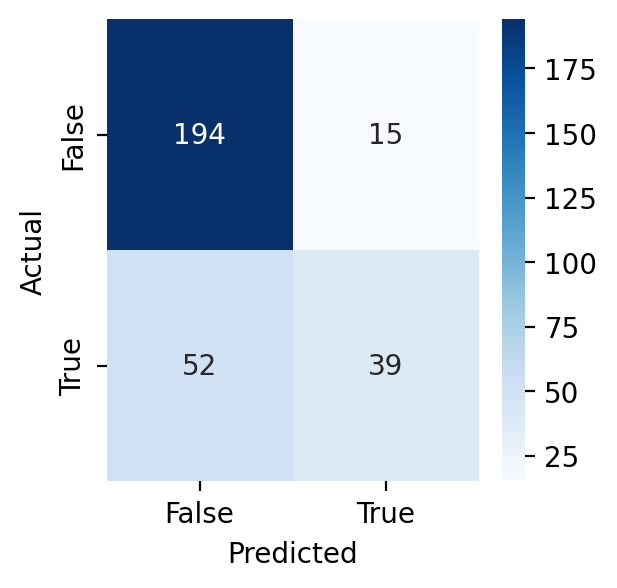

In [76]:
y_pred = svc.predict (X_test[best_combinations_svm])

report = classification_report(y_test, y_pred)
print(report)
confusion_mat = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames= ['Predicted'])
plt.figure (figsize=(3, 3), dpi=100)
sns.heatmap(confusion_mat, annot=True, cmap='Blues', fmt='g')
plt.show()

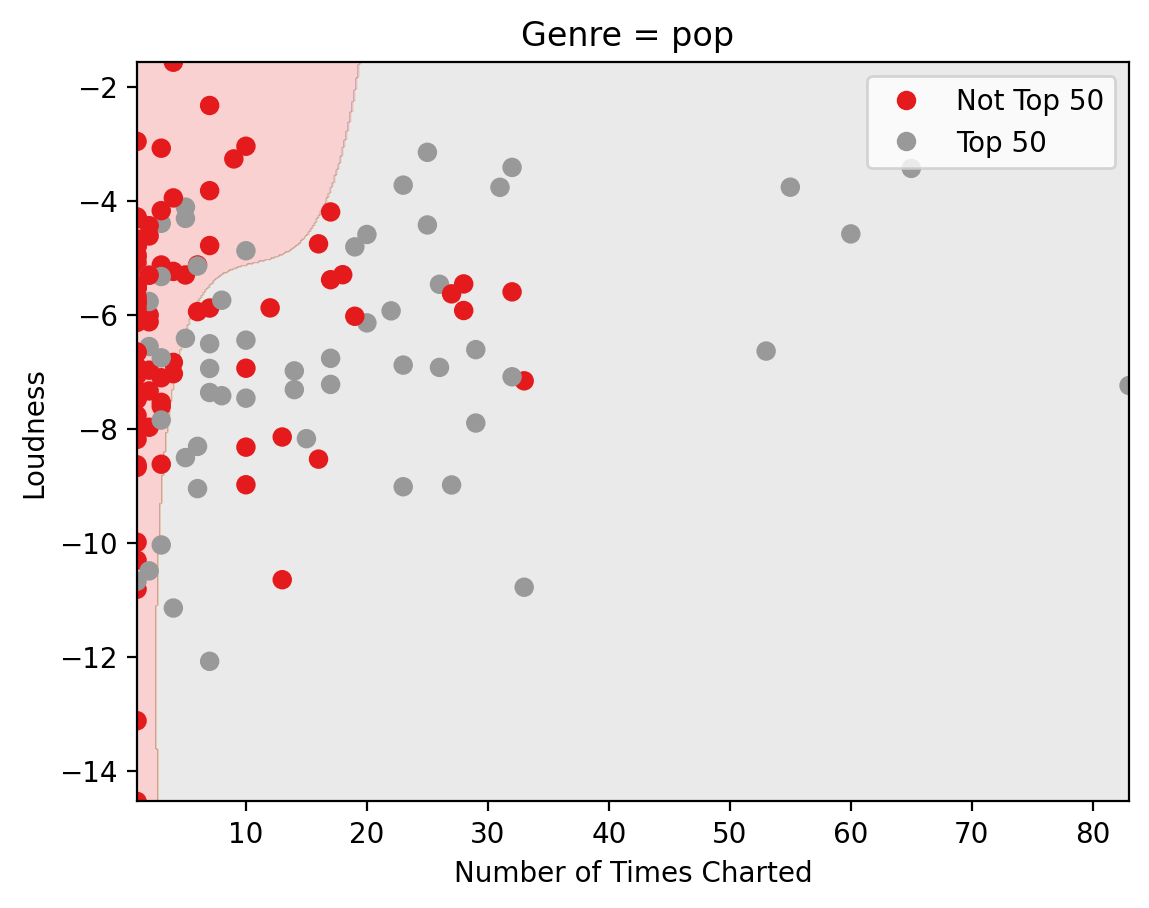

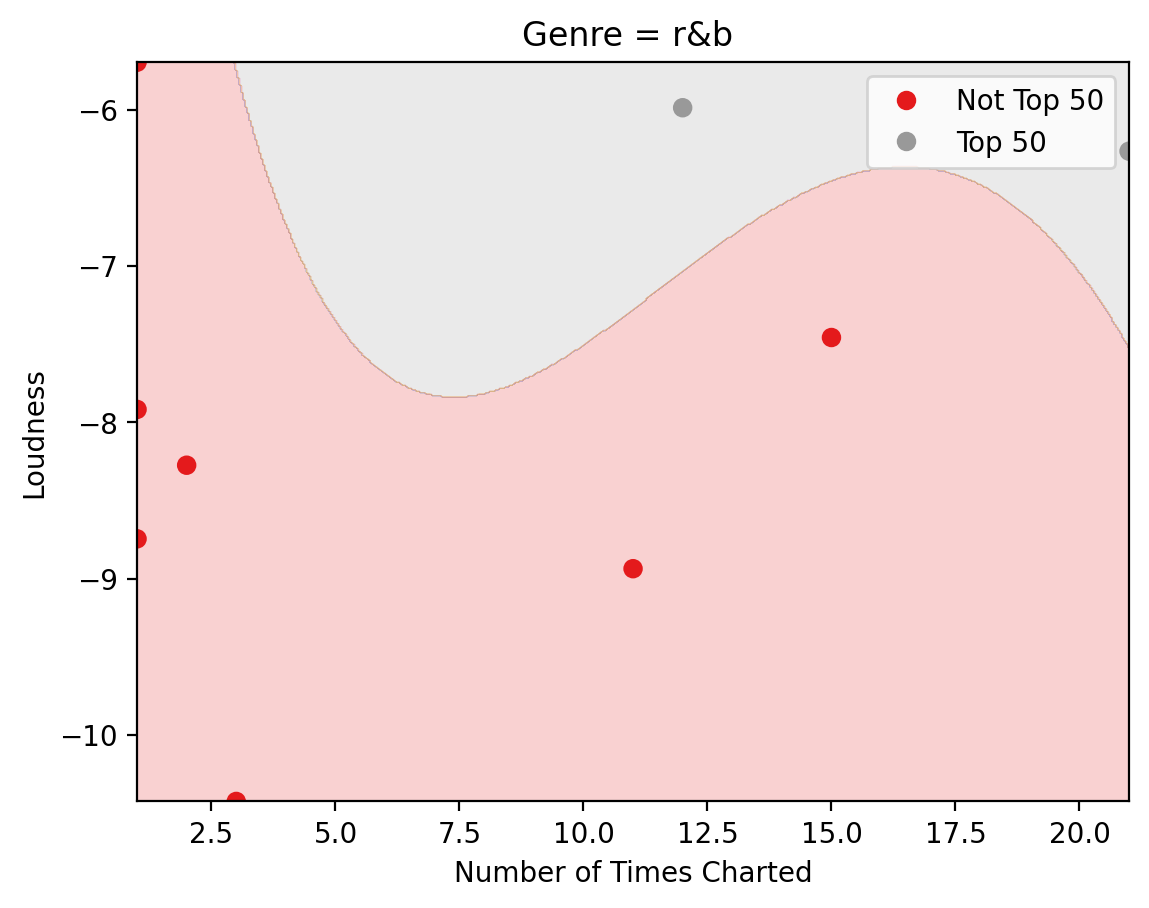

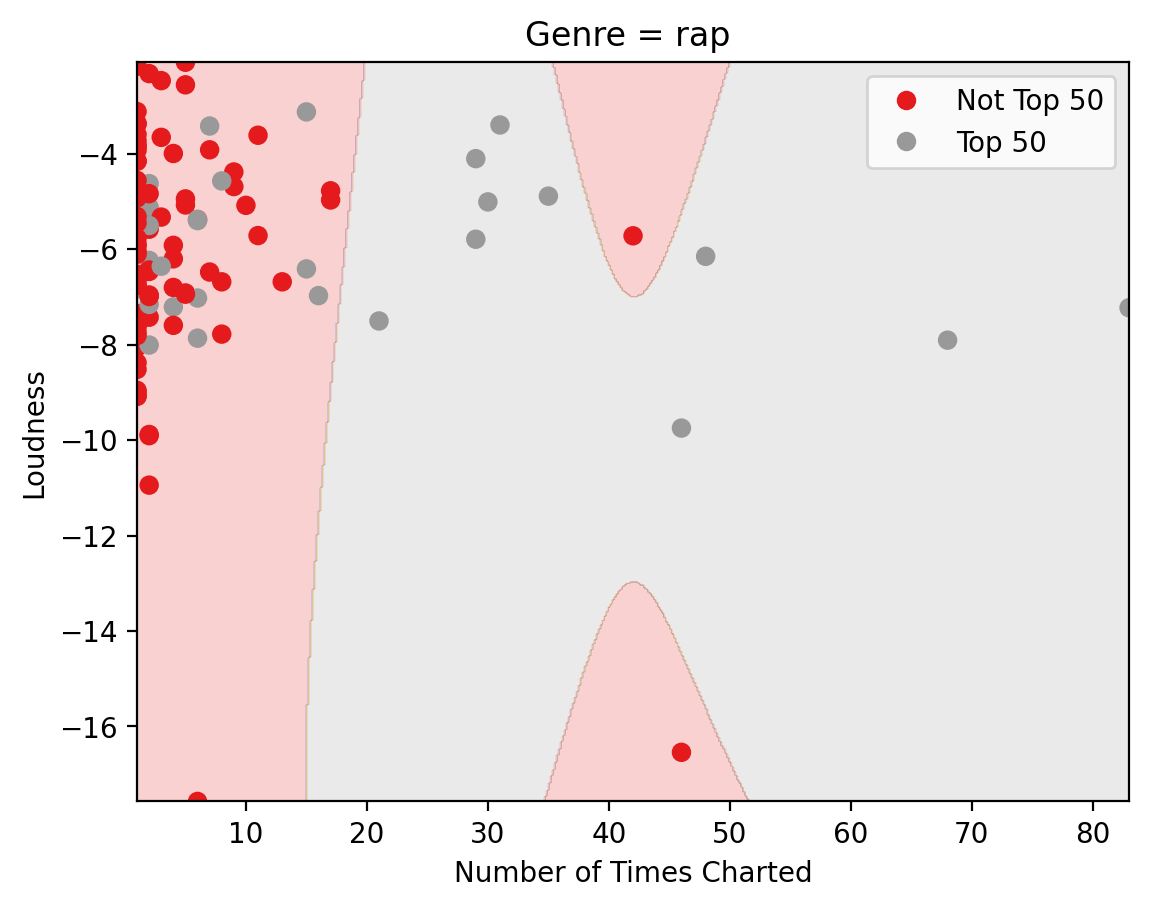

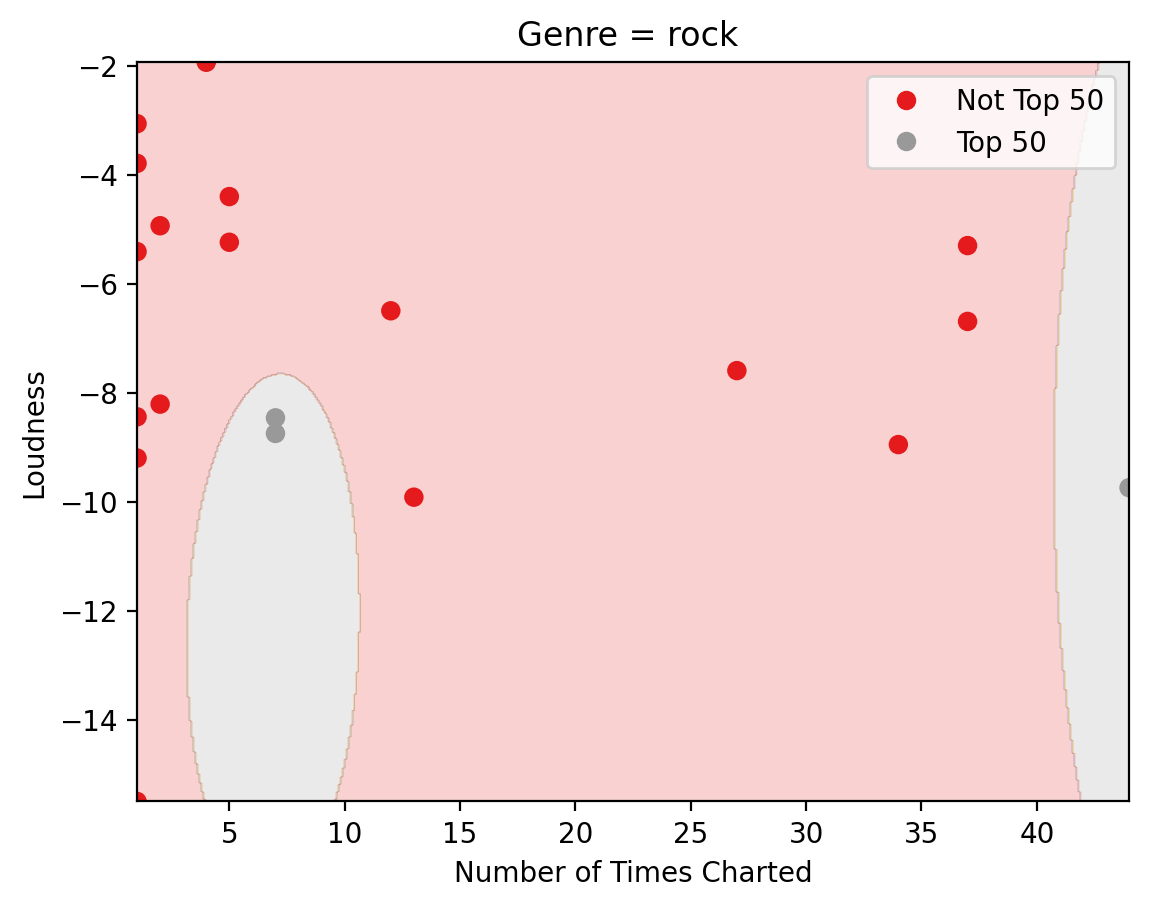

In [77]:

plot_decision_regions(svc, X_test, y_test, 'Number of Times Charted', 'Loudness', 'Genre')

**Analysis**

The SVM model achieved an accuracy score of 0.78 on the test data, which suggests that it was able to predict the class labels correctly for 78% of the samples. However, a deeper analysis of the confusion matrix reveals that the model had difficulty predicting the True class label, with a recall score of only 0.43. This indicates that the model has a tendency to misclassify positive samples as negative.

Additionally, we found the selection of Loudness to be a surprising variable to be selected as the highest performing combination, given our earleir EDA analysis that qualities of the song itself (Loudness being one of them) did not typically show a strong correlation with the success of the song. 

The decision regions are ultimately less hyper specific when compared to RF, but looking at the indiviudal plots, it appears that the only shape that relatively captured the trends of the data is the graph for Pop. Even for rap, which because is a larger category, has a decision region that does not accurately create general boundaries, exemplified by the two peaks for Not Top 50 in the middle, showing that the model did not generalize the trends in the data as well and rather focused on specific points. 

Similar to previous models, the decision regions for rock and r&b show multiple mistakes and specificity that indicates the model does not perform well for these genres which contain minimal data to create patterns off of.

# Part 6: Discussion 

In this project, our group worked with a set of data containing statistics about songs that made it in the top 200 of Spotify's streaming data to ultimately create a collection of tools and models that could be used to accurately predict if a song will make it into a list of the Top 50 songs streamed. According to a combination of the decision region plots, confusion matrix and cross validation scores, we decided that we would **most recommend using the Random Forest model to predict a song's success** as compared to our other models of linear regression, KNN, and SVM. 

Across all 3 measures (i.e. `cv_score`, `train_score` and `test_score`), the Random Forest model consistently yielded the highest score when compared to the other models. The scores are:   
- `cv_score`: **0.79**
- ‘test_score`: **0.83**
- ‘train_score`: **0.93**

It is also the only model which had an accuracy `test_score` of more than 80%. It also produced a precision score on the test data set of 0.84 for False and 0.79 for True, which is the highest precision score among all the other models. 
 From our tuning of the hyperparameters, we concluded that the best combination of variables to run the Random Forest model on is:   
- Quantitative Variable 1: `Streams` 
- Quantitative Variable 2: `Number of Times Charted`
- Qualitative Variable: `Genre`
This concurred with one of our initial hypotheses that we gathered from just exploring and visualizing the data that **the success of a song making it to the top 50 had less to do with intrinsic qualities** about the song itself, such as Valence, Duration, etc **but rather about the statistics of how the song was consumed/listened** to (such as streams, times charted) or about statistics that would show how the song could reach a larger audience and thus gain more popularity (from an artist with high followers, popularity). It also appears that songs that made it to the Top 50 had a significantly high longevity period. This can be seen throughout the project when we observe that `Number of Times Charted` was a **powerful predictor** of a song’s presence in the Top 50 chart.

Even though our Random Forest model produced the best scores, it is important to highlight that it is the only model which yielded a lower `test_score` (0.83)  than `train_score` (0.93). While this difference is not too big, it does tell us that overfitting may be slightly present. Moreover, the 0.83 `test_score` is relatively high, which suggests that the model is performing well on unseen data and is a good indication that the model is not overfitting. However, the `test_score` that it yielded was still by far the highest score. We also took into account the fact that our cross-validation score of 0.79 suggests that the model is not overfitting significantly, as it is able to generalize well to new, unseen data. The fact that the cross-validation score is relatively close to the test score is also a strong indication that the model is not extremely overfitting.

In comparison to KNN, LR, and SVM, the RF model emerges as the best choice for dataset. Firstly, Random Forest can capture nonlinear relationships between features and the target variable where models like LR could not achieve. As seen in our first Visualization, there were not strong linear correlations between any of the data points and whether the song made it in the Top 50; therefore, the LR often had to create too large of boundaries and would classify songs in the negative class with far too much frequency and sacrifice its ability to accurately identify when it belonged in the positive. 

For the KNN and SVM models, although they were able to create more flexible boundaries in comparison to LR, this does not necessarily mean that they were able to classify data with that much more accuracy. The decision regions for SVM were still too focused on capturing the behavior of outliers as seen by some of the shapes of the regions in “blobs” that did not make sense in the context of typical patterns we have seen. KNN's boundaries for R&B and Rock were nearly unusable/did not correctly classify songs within even the test set of data; the graphs for pop and rap showed a slightly clearer boundary, but ultimately were still too complicated and had poor predictive accuracy. 

The random forest model emerges as the best choice in terms of decision region performance in comparison to these. One of the key advantages is that it created usable and helpful graphs across all genres, which is something that almost all the other models struggled with, due to the small sample size of R&B and Rock. Another advantage is that the decision regions are able to capture an overall better balance between smoothness and complexity that allows it to effectively capture underlying patterns in the data. Furthermore, the clear boundaries ensure that the model is less sensitive to noise and outliers. This resilience allows it to maintain good performance even in the presence of noisy data or extreme values. 

Although there are still many inherent challenges within the RF model, it provides a very solid basis for how we could construct a more detailed machine learning model in the future, especially if we are given access to more data. Past the model itself, the data we were working with also brought on additional difficulties, one of the main ones being the genre category. We had to subjectively sift through the genres manually because due to how the data was given, there was no function or program we could call upon to qualify a song as either "Rap" or "R&B". We tried to minimize as many errors as possible in this step by only having one individual in charge of the encoding throughout the project, so at least our model was trained and tested on data that fit the same categories. Additionally, there is an inherent unequal classification of genres in this category, as pop songs are the most likely to be the most popular and in the Top 50. Nevertheless, we still found it incredibly interesting to analyze how genres could play a role in learning such statistics about a song, and is an example of how qualitative variables can make the machine learning process more difficult, and how this project could be revisited and improved upon in the future to be able to include more genres. 